In [1]:
SEED = 1221

# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load files
train = pd.read_csv('Train data.csv')
test = pd.read_csv('Test data.csv')

# Preview train dataset
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
# Check size and shape of datasets
train.shape, test.shape

((20191, 10), (9999, 9))

In [4]:
train.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

<a name="Statistics"></a>
## 3. Statistical Summaries

In [5]:
# Train statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20191.0,10095.000000,5828.783978,0.000000,5047.500000,10095.000000,15142.500000,20190.000000
Length,20191.0,1.317672,0.288066,0.187500,1.150000,1.375000,1.537500,1.950000
Diameter,20191.0,1.024637,0.237790,0.137500,0.887500,1.075000,1.200000,1.612500
Height,20191.0,0.348064,0.093185,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,20191.0,23.400403,12.717732,0.056699,13.437663,23.785231,32.318430,78.797435
Shucked Weight,20191.0,10.121481,5.644895,0.028349,5.712424,9.908150,14.068439,42.184056
Viscera Weight,20191.0,5.061241,2.801545,0.042524,2.849125,4.975337,7.002326,19.589505
Shell Weight,20191.0,6.724716,3.599905,0.042524,3.968930,6.803880,9.128539,28.491248
Age,20191.0,9.953246,3.170614,1.000000,8.000000,10.000000,11.000000,29.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [6]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [7]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

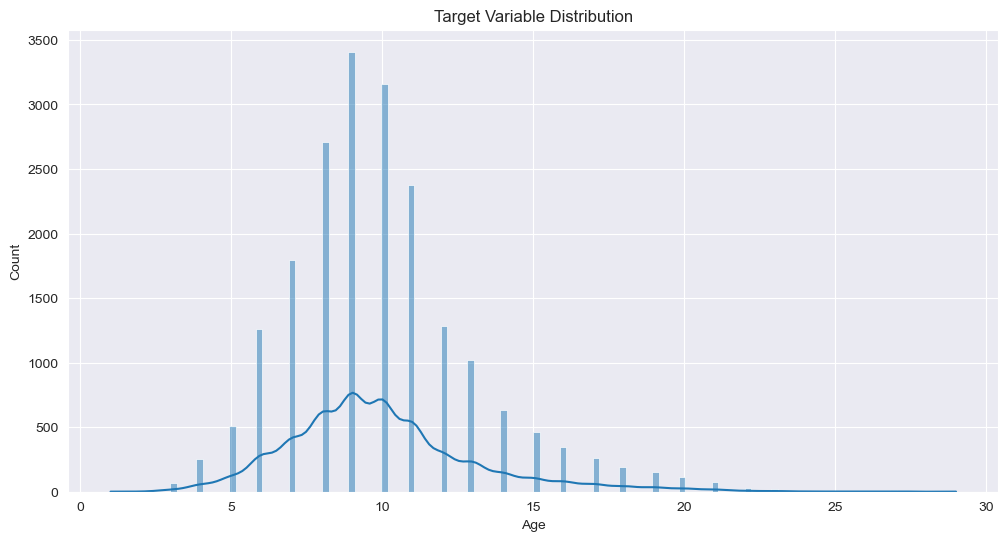

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=train, kde=True)
plt.title('Target Variable Distribution')
plt.show()

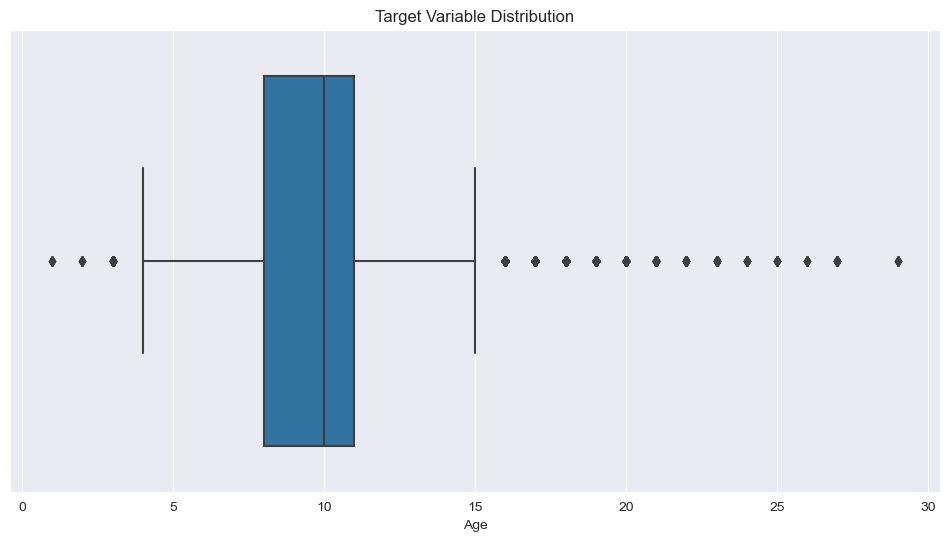

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', data=train)
plt.title('Target Variable Distribution')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11708\3209112519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


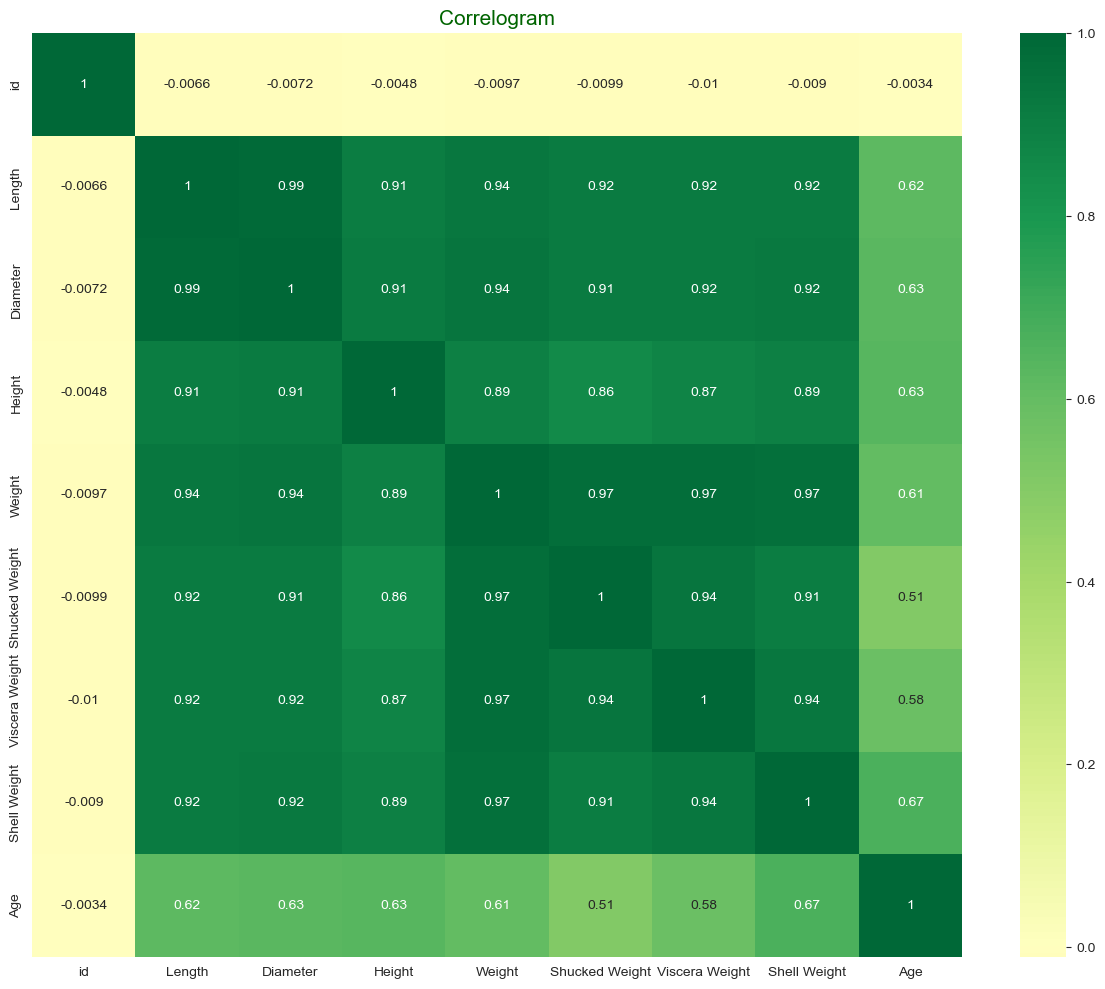

In [10]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [11]:
correlation_matrix = train.corr()
print(correlation_matrix['Age'])


id               -0.003395
Length            0.618512
Diameter          0.627650
Height            0.633972
Weight            0.607950
Shucked Weight    0.511906
Viscera Weight    0.582643
Shell Weight      0.670578
Age               1.000000
Name: Age, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_11708\3469749954.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


<a name="Preprocess"></a>
## 6. Modeling

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the 'Sex' column in the train data
encoder.fit(train[['Sex']])

# Transform the 'Sex' column in the train data
train_encoded = encoder.transform(train[['Sex']])

# Transform the 'Sex' column in the test data
test_encoded = encoder.transform(test[['Sex']])

# Drop the original 'Sex' column from the train and test data
train = train.drop('Sex', axis=1)
test = test.drop('Sex', axis=1)

# Concatenate the encoded columns to the train and test data
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Sex']))
train = pd.concat([train, train_encoded_df], axis=1)

test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Sex']))
test = pd.concat([test, test_encoded_df], axis=1)


C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
train.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.0,1.0,0.0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0.0,1.0,0.0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.0,0.0,1.0
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.0,0.0,0.0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0.0,1.0,0.0


In [15]:
test_data = test.copy()

In [16]:
#scale numerical features for logistic model
features = train.drop(columns=['id','Age']).columns
target = 'Age'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [17]:
train.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,0.719741,0.632352,0.289070,0.438201,0.461923,0.566386,0.451193,9,-0.673136,1.449011,-0.759072
1,1,-0.755650,-0.839573,-0.784094,-1.020802,-0.992025,-0.976836,-0.923041,8,-0.673136,1.449011,-0.759072
2,2,0.242408,0.369508,0.289070,0.108281,0.215832,0.176786,-0.017385,9,-0.673136,-0.690126,1.317398
3,3,1.327255,1.631157,1.630526,2.143529,1.812915,2.116955,2.297943,11,1.485583,-0.690126,-0.759072
4,4,-0.234924,-0.051042,-0.113366,-0.008751,0.328833,-0.197635,-0.214267,8,-0.673136,1.449011,-0.759072


In [19]:
test = test.drop(columns=['id'])

In [20]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [21]:
X_train.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
19616,0.242408,-0.103610,0.289070,-0.262878,-0.125682,-0.202695,-0.450525,-0.673136,-0.690126,1.317398
5591,-0.365106,-0.261317,-0.784094,-0.775591,-0.788623,-1.012254,-0.529277,-0.673136,1.449011,-0.759072
2601,0.285802,0.316939,0.154925,-0.052220,-0.168372,0.045232,0.179497,-0.673136,1.449011,-0.759072
20123,0.025439,0.001527,0.289070,-0.230555,-0.786111,-0.329189,-0.135514,1.485583,-0.690126,-0.759072
1078,-1.449952,-1.470397,-1.588967,-1.339576,-1.315961,-1.341137,-1.490060,-0.673136,1.449011,-0.759072


In [22]:
y_train.head()

,Age
19616,9
5591,8
2601,11
20123,13
1078,6


In [23]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": xgb.XGBRegressor(),
    "CatBoost": cb.CatBoostRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "AdaBoost Regression": AdaBoostRegressor()
}

# Define lists to store the evaluation metrics
metrics = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "R-squared": []
}

# Iterate over the models
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train['Age'])
    
    # Make predictions on the validation set
    preds = model.predict(X_test)
    
    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test['Age'], preds)
    mae = mean_absolute_error(y_test['Age'], preds)
    r2 = r2_score(y_test['Age'], preds)
    
    # Store the metrics in the lists
    metrics["Model"].append(model_name)
    metrics["MSE"].append(mse)
    metrics["MAE"].append(mae)
    metrics["R-squared"].append(r2)

# Convert the metrics to a pandas DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Print the metrics for each model
print(metrics_df)


Learning rate set to 0.062218
0:	learn: 3.0853696	total: 147ms	remaining: 2m 26s
1:	learn: 3.0039165	total: 151ms	remaining: 1m 15s
2:	learn: 2.9279089	total: 155ms	remaining: 51.6s
3:	learn: 2.8577981	total: 159ms	remaining: 39.7s
4:	learn: 2.7954031	total: 163ms	remaining: 32.5s
5:	learn: 2.7383158	total: 167ms	remaining: 27.7s
6:	learn: 2.6869056	total: 172ms	remaining: 24.3s
7:	learn: 2.6411092	total: 176ms	remaining: 21.8s
8:	learn: 2.5965509	total: 180ms	remaining: 19.9s
9:	learn: 2.5552827	total: 184ms	remaining: 18.2s
10:	learn: 2.5197001	total: 188ms	remaining: 16.9s
11:	learn: 2.4852988	total: 192ms	remaining: 15.8s
12:	learn: 2.4531655	total: 198ms	remaining: 15s
13:	learn: 2.4268267	total: 202ms	remaining: 14.3s
14:	learn: 2.3987963	total: 207ms	remaining: 13.6s
15:	learn: 2.3756567	total: 211ms	remaining: 13s
16:	learn: 2.3576790	total: 215ms	remaining: 12.4s
17:	learn: 2.3398778	total: 219ms	remaining: 12s
18:	learn: 2.3204558	total: 224ms	remaining: 11.5s
19:	learn: 2.30

190:	learn: 1.9769403	total: 1.18s	remaining: 5s
191:	learn: 1.9764962	total: 1.19s	remaining: 4.99s
192:	learn: 1.9756579	total: 1.19s	remaining: 4.99s
193:	learn: 1.9751754	total: 1.2s	remaining: 4.98s
194:	learn: 1.9743458	total: 1.2s	remaining: 4.97s
195:	learn: 1.9741787	total: 1.21s	remaining: 4.96s
196:	learn: 1.9734745	total: 1.21s	remaining: 4.95s
197:	learn: 1.9726617	total: 1.22s	remaining: 4.94s
198:	learn: 1.9721304	total: 1.23s	remaining: 4.93s
199:	learn: 1.9718189	total: 1.23s	remaining: 4.92s
200:	learn: 1.9706771	total: 1.24s	remaining: 4.91s
201:	learn: 1.9697214	total: 1.24s	remaining: 4.91s
202:	learn: 1.9690303	total: 1.25s	remaining: 4.9s
203:	learn: 1.9684614	total: 1.25s	remaining: 4.89s
204:	learn: 1.9677812	total: 1.26s	remaining: 4.88s
205:	learn: 1.9673016	total: 1.26s	remaining: 4.87s
206:	learn: 1.9667495	total: 1.27s	remaining: 4.86s
207:	learn: 1.9659954	total: 1.27s	remaining: 4.86s
208:	learn: 1.9655998	total: 1.28s	remaining: 4.85s
209:	learn: 1.9655

363:	learn: 1.8860380	total: 2.19s	remaining: 3.83s
364:	learn: 1.8860105	total: 2.2s	remaining: 3.82s
365:	learn: 1.8854037	total: 2.2s	remaining: 3.82s
366:	learn: 1.8853128	total: 2.21s	remaining: 3.81s
367:	learn: 1.8847606	total: 2.22s	remaining: 3.81s
368:	learn: 1.8841557	total: 2.22s	remaining: 3.8s
369:	learn: 1.8835496	total: 2.23s	remaining: 3.8s
370:	learn: 1.8831900	total: 2.23s	remaining: 3.79s
371:	learn: 1.8826965	total: 2.24s	remaining: 3.78s
372:	learn: 1.8818195	total: 2.25s	remaining: 3.78s
373:	learn: 1.8810242	total: 2.25s	remaining: 3.77s
374:	learn: 1.8805516	total: 2.26s	remaining: 3.77s
375:	learn: 1.8799091	total: 2.27s	remaining: 3.76s
376:	learn: 1.8793678	total: 2.27s	remaining: 3.75s
377:	learn: 1.8793596	total: 2.28s	remaining: 3.75s
378:	learn: 1.8790037	total: 2.28s	remaining: 3.74s
379:	learn: 1.8784545	total: 2.29s	remaining: 3.74s
380:	learn: 1.8781852	total: 2.3s	remaining: 3.73s
381:	learn: 1.8774759	total: 2.3s	remaining: 3.72s
382:	learn: 1.8773

546:	learn: 1.8123429	total: 3.39s	remaining: 2.81s
547:	learn: 1.8117515	total: 3.4s	remaining: 2.8s
548:	learn: 1.8113441	total: 3.4s	remaining: 2.8s
549:	learn: 1.8110629	total: 3.41s	remaining: 2.79s
550:	learn: 1.8104535	total: 3.42s	remaining: 2.79s
551:	learn: 1.8103235	total: 3.42s	remaining: 2.78s
552:	learn: 1.8102804	total: 3.43s	remaining: 2.77s
553:	learn: 1.8099539	total: 3.44s	remaining: 2.77s
554:	learn: 1.8094743	total: 3.45s	remaining: 2.76s
555:	learn: 1.8091365	total: 3.45s	remaining: 2.76s
556:	learn: 1.8090559	total: 3.46s	remaining: 2.75s
557:	learn: 1.8089303	total: 3.47s	remaining: 2.75s
558:	learn: 1.8084526	total: 3.47s	remaining: 2.74s
559:	learn: 1.8078806	total: 3.48s	remaining: 2.73s
560:	learn: 1.8076928	total: 3.49s	remaining: 2.73s
561:	learn: 1.8075540	total: 3.49s	remaining: 2.72s
562:	learn: 1.8070419	total: 3.5s	remaining: 2.72s
563:	learn: 1.8066983	total: 3.5s	remaining: 2.71s
564:	learn: 1.8065382	total: 3.51s	remaining: 2.7s
565:	learn: 1.80606

723:	learn: 1.7565543	total: 4.59s	remaining: 1.75s
724:	learn: 1.7563724	total: 4.6s	remaining: 1.74s
725:	learn: 1.7561906	total: 4.61s	remaining: 1.74s
726:	learn: 1.7561511	total: 4.61s	remaining: 1.73s
727:	learn: 1.7558887	total: 4.62s	remaining: 1.73s
728:	learn: 1.7555350	total: 4.63s	remaining: 1.72s
729:	learn: 1.7551786	total: 4.63s	remaining: 1.71s
730:	learn: 1.7549825	total: 4.64s	remaining: 1.71s
731:	learn: 1.7545251	total: 4.65s	remaining: 1.7s
732:	learn: 1.7541987	total: 4.66s	remaining: 1.7s
733:	learn: 1.7538063	total: 4.66s	remaining: 1.69s
734:	learn: 1.7536258	total: 4.67s	remaining: 1.68s
735:	learn: 1.7533328	total: 4.68s	remaining: 1.68s
736:	learn: 1.7528572	total: 4.68s	remaining: 1.67s
737:	learn: 1.7522545	total: 4.69s	remaining: 1.67s
738:	learn: 1.7519207	total: 4.7s	remaining: 1.66s
739:	learn: 1.7519036	total: 4.71s	remaining: 1.65s
740:	learn: 1.7518579	total: 4.71s	remaining: 1.65s
741:	learn: 1.7515900	total: 4.72s	remaining: 1.64s
742:	learn: 1.75

902:	learn: 1.7090071	total: 5.77s	remaining: 620ms
903:	learn: 1.7089018	total: 5.78s	remaining: 614ms
904:	learn: 1.7086320	total: 5.79s	remaining: 607ms
905:	learn: 1.7081173	total: 5.79s	remaining: 601ms
906:	learn: 1.7078588	total: 5.8s	remaining: 595ms
907:	learn: 1.7074684	total: 5.8s	remaining: 588ms
908:	learn: 1.7073095	total: 5.81s	remaining: 582ms
909:	learn: 1.7065425	total: 5.82s	remaining: 575ms
910:	learn: 1.7065084	total: 5.82s	remaining: 569ms
911:	learn: 1.7062657	total: 5.83s	remaining: 562ms
912:	learn: 1.7059141	total: 5.83s	remaining: 556ms
913:	learn: 1.7056224	total: 5.84s	remaining: 549ms
914:	learn: 1.7056147	total: 5.84s	remaining: 543ms
915:	learn: 1.7051734	total: 5.85s	remaining: 537ms
916:	learn: 1.7048840	total: 5.86s	remaining: 530ms
917:	learn: 1.7046435	total: 5.87s	remaining: 524ms
918:	learn: 1.7045041	total: 5.87s	remaining: 518ms
919:	learn: 1.7041790	total: 5.88s	remaining: 511ms
920:	learn: 1.7040583	total: 5.88s	remaining: 505ms
921:	learn: 1.

In [24]:
sorted_metrics_df = metrics_df.sort_values(by='MSE', ascending=True)
print(sorted_metrics_df)


                           Model       MSE       MAE  R-squared
9                       CatBoost  4.405734  1.438960   0.560207
10                      LightGBM  4.412590  1.435984   0.559523
6   Gradient Boosting Regression  4.413157  1.448738   0.559466
7      Support Vector Regression  4.538025  1.406947   0.547002
0              Linear Regression  4.552056  1.489588   0.545601
2               Ridge Regression  4.552203  1.489549   0.545586
5       Random Forest Regression  4.570838  1.484705   0.543726
8                        XGBoost  4.732926  1.490107   0.527546
1                     ElasticNet  6.076457  1.764727   0.393431
3               Lasso Regression  6.580647  1.848433   0.343101
11           AdaBoost Regression  6.882688  2.120188   0.312951
4       Decision Tree Regression  8.874216  2.019809   0.114151


In [25]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7],
    'iterations': [100, 200, 300]
}

# Initialize the CatBoostRegressor
model = CatBoostRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train['Age'])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
preds = best_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test['Age'], preds)
mae = mean_absolute_error(y_test['Age'], preds)
r2 = r2_score(y_test['Age'], preds)



0:	learn: 3.0392267	total: 1.92ms	remaining: 190ms
1:	learn: 2.9315700	total: 3.69ms	remaining: 181ms
2:	learn: 2.8423581	total: 5.43ms	remaining: 175ms
3:	learn: 2.7604894	total: 7.19ms	remaining: 172ms
4:	learn: 2.6929763	total: 9.01ms	remaining: 171ms
5:	learn: 2.6345037	total: 10.8ms	remaining: 170ms
6:	learn: 2.5866875	total: 12.8ms	remaining: 170ms
7:	learn: 2.5398692	total: 14.7ms	remaining: 169ms
8:	learn: 2.4976008	total: 16.5ms	remaining: 167ms
9:	learn: 2.4611394	total: 18.4ms	remaining: 166ms
10:	learn: 2.4312524	total: 20.3ms	remaining: 164ms
11:	learn: 2.4017346	total: 22.2ms	remaining: 163ms
12:	learn: 2.3746956	total: 24.2ms	remaining: 162ms
13:	learn: 2.3537525	total: 26.1ms	remaining: 161ms
14:	learn: 2.3332561	total: 28ms	remaining: 159ms
15:	learn: 2.3176216	total: 29.8ms	remaining: 156ms
16:	learn: 2.3044125	total: 31.7ms	remaining: 155ms
17:	learn: 2.2884705	total: 33.5ms	remaining: 153ms
18:	learn: 2.2755380	total: 35.4ms	remaining: 151ms
19:	learn: 2.2624097	tot

79:	learn: 2.0924612	total: 167ms	remaining: 41.7ms
80:	learn: 2.0901574	total: 169ms	remaining: 39.7ms
81:	learn: 2.0890488	total: 171ms	remaining: 37.6ms
82:	learn: 2.0886338	total: 174ms	remaining: 35.6ms
83:	learn: 2.0859950	total: 176ms	remaining: 33.5ms
84:	learn: 2.0857127	total: 178ms	remaining: 31.4ms
85:	learn: 2.0842588	total: 181ms	remaining: 29.4ms
86:	learn: 2.0834346	total: 183ms	remaining: 27.3ms
87:	learn: 2.0832289	total: 185ms	remaining: 25.3ms
88:	learn: 2.0830000	total: 187ms	remaining: 23.2ms
89:	learn: 2.0820942	total: 191ms	remaining: 21.2ms
90:	learn: 2.0815628	total: 194ms	remaining: 19.2ms
91:	learn: 2.0796687	total: 196ms	remaining: 17.1ms
92:	learn: 2.0793166	total: 198ms	remaining: 14.9ms
93:	learn: 2.0789434	total: 201ms	remaining: 12.8ms
94:	learn: 2.0774919	total: 203ms	remaining: 10.7ms
95:	learn: 2.0763740	total: 206ms	remaining: 8.57ms
96:	learn: 2.0747676	total: 208ms	remaining: 6.43ms
97:	learn: 2.0744456	total: 210ms	remaining: 4.29ms
98:	learn: 2

92:	learn: 2.0566201	total: 221ms	remaining: 16.6ms
93:	learn: 2.0558100	total: 227ms	remaining: 14.5ms
94:	learn: 2.0554003	total: 229ms	remaining: 12.1ms
95:	learn: 2.0550057	total: 232ms	remaining: 9.65ms
96:	learn: 2.0546823	total: 234ms	remaining: 7.22ms
97:	learn: 2.0543114	total: 236ms	remaining: 4.81ms
98:	learn: 2.0529661	total: 238ms	remaining: 2.41ms
99:	learn: 2.0515229	total: 241ms	remaining: 0us
0:	learn: 3.0679515	total: 2.13ms	remaining: 211ms
1:	learn: 2.9675922	total: 4.17ms	remaining: 204ms
2:	learn: 2.8779698	total: 6.03ms	remaining: 195ms
3:	learn: 2.7937210	total: 7.81ms	remaining: 187ms
4:	learn: 2.7244440	total: 9.48ms	remaining: 180ms
5:	learn: 2.6645087	total: 11.3ms	remaining: 177ms
6:	learn: 2.6116517	total: 13.2ms	remaining: 175ms
7:	learn: 2.5662304	total: 15.2ms	remaining: 175ms
8:	learn: 2.5256530	total: 17.2ms	remaining: 174ms
9:	learn: 2.4856393	total: 19.3ms	remaining: 174ms
10:	learn: 2.4536160	total: 21.4ms	remaining: 173ms
11:	learn: 2.4226732	tota

94:	learn: 2.4866832	total: 243ms	remaining: 12.8ms
95:	learn: 2.4830292	total: 246ms	remaining: 10.3ms
96:	learn: 2.4794684	total: 248ms	remaining: 7.68ms
97:	learn: 2.4762817	total: 251ms	remaining: 5.12ms
98:	learn: 2.4730183	total: 253ms	remaining: 2.55ms
99:	learn: 2.4695395	total: 255ms	remaining: 0us
0:	learn: 3.1601743	total: 3.73ms	remaining: 369ms
1:	learn: 3.1487180	total: 6.05ms	remaining: 296ms
2:	learn: 3.1365273	total: 8.6ms	remaining: 278ms
3:	learn: 3.1239936	total: 10.9ms	remaining: 261ms
4:	learn: 3.1122975	total: 13.1ms	remaining: 250ms
5:	learn: 3.1006269	total: 16.6ms	remaining: 261ms
6:	learn: 3.0885282	total: 18.9ms	remaining: 252ms
7:	learn: 3.0774817	total: 21.1ms	remaining: 243ms
8:	learn: 3.0659351	total: 23.2ms	remaining: 235ms
9:	learn: 3.0545189	total: 25.3ms	remaining: 228ms
10:	learn: 3.0430698	total: 27.4ms	remaining: 222ms
11:	learn: 3.0320327	total: 30ms	remaining: 220ms
12:	learn: 3.0211441	total: 33.3ms	remaining: 223ms
13:	learn: 3.0103063	total: 

0:	learn: 3.1336801	total: 2.56ms	remaining: 254ms
1:	learn: 3.1210138	total: 5.28ms	remaining: 259ms
2:	learn: 3.1084295	total: 7.63ms	remaining: 247ms
3:	learn: 3.0958439	total: 10ms	remaining: 241ms
4:	learn: 3.0832517	total: 12.6ms	remaining: 240ms
5:	learn: 3.0719218	total: 15.1ms	remaining: 237ms
6:	learn: 3.0595795	total: 17.5ms	remaining: 232ms
7:	learn: 3.0480097	total: 19.6ms	remaining: 226ms
8:	learn: 3.0362437	total: 21.7ms	remaining: 220ms
9:	learn: 3.0246184	total: 23.9ms	remaining: 215ms
10:	learn: 3.0130462	total: 25.7ms	remaining: 208ms
11:	learn: 3.0018438	total: 27.6ms	remaining: 203ms
12:	learn: 2.9906918	total: 29.4ms	remaining: 197ms
13:	learn: 2.9797916	total: 31.2ms	remaining: 192ms
14:	learn: 2.9694137	total: 33ms	remaining: 187ms
15:	learn: 2.9588605	total: 34.8ms	remaining: 183ms
16:	learn: 2.9485278	total: 36.6ms	remaining: 179ms
17:	learn: 2.9383309	total: 38.4ms	remaining: 175ms
18:	learn: 2.9281104	total: 40.1ms	remaining: 171ms
19:	learn: 2.9181739	total

8:	learn: 3.1571247	total: 21.7ms	remaining: 219ms
9:	learn: 3.1558327	total: 25.1ms	remaining: 226ms
10:	learn: 3.1545192	total: 29ms	remaining: 235ms
11:	learn: 3.1532724	total: 32.1ms	remaining: 235ms
12:	learn: 3.1519579	total: 36ms	remaining: 241ms
13:	learn: 3.1506591	total: 38.7ms	remaining: 238ms
14:	learn: 3.1493969	total: 41.2ms	remaining: 233ms
15:	learn: 3.1480965	total: 43.5ms	remaining: 229ms
16:	learn: 3.1468159	total: 46ms	remaining: 225ms
17:	learn: 3.1455678	total: 48.4ms	remaining: 221ms
18:	learn: 3.1442676	total: 50.9ms	remaining: 217ms
19:	learn: 3.1429713	total: 54.1ms	remaining: 217ms
20:	learn: 3.1416716	total: 56.8ms	remaining: 214ms
21:	learn: 3.1403839	total: 60.2ms	remaining: 214ms
22:	learn: 3.1391035	total: 62.6ms	remaining: 210ms
23:	learn: 3.1378743	total: 64.8ms	remaining: 205ms
24:	learn: 3.1365932	total: 67.2ms	remaining: 202ms
25:	learn: 3.1353005	total: 70ms	remaining: 199ms
26:	learn: 3.1340276	total: 72.6ms	remaining: 196ms
27:	learn: 3.1327436	t

14:	learn: 3.1574404	total: 28.8ms	remaining: 163ms
15:	learn: 3.1561457	total: 31.1ms	remaining: 163ms
16:	learn: 3.1548429	total: 33.3ms	remaining: 162ms
17:	learn: 3.1535740	total: 35.4ms	remaining: 161ms
18:	learn: 3.1522954	total: 37.4ms	remaining: 160ms
19:	learn: 3.1510033	total: 39.5ms	remaining: 158ms
20:	learn: 3.1497181	total: 41.6ms	remaining: 157ms
21:	learn: 3.1484542	total: 43.9ms	remaining: 156ms
22:	learn: 3.1471475	total: 46.3ms	remaining: 155ms
23:	learn: 3.1458896	total: 48.5ms	remaining: 154ms
24:	learn: 3.1446875	total: 50.9ms	remaining: 153ms
25:	learn: 3.1434387	total: 53.5ms	remaining: 152ms
26:	learn: 3.1422323	total: 55.5ms	remaining: 150ms
27:	learn: 3.1409551	total: 57.6ms	remaining: 148ms
28:	learn: 3.1396637	total: 59.7ms	remaining: 146ms
29:	learn: 3.1383811	total: 61.7ms	remaining: 144ms
30:	learn: 3.1371041	total: 63.8ms	remaining: 142ms
31:	learn: 3.1358304	total: 66ms	remaining: 140ms
32:	learn: 3.1345889	total: 68.3ms	remaining: 139ms
33:	learn: 3.1

84:	learn: 3.0427701	total: 197ms	remaining: 34.7ms
85:	learn: 3.0417029	total: 199ms	remaining: 32.5ms
86:	learn: 3.0405715	total: 202ms	remaining: 30.1ms
87:	learn: 3.0394824	total: 204ms	remaining: 27.8ms
88:	learn: 3.0383148	total: 207ms	remaining: 25.5ms
89:	learn: 3.0371471	total: 209ms	remaining: 23.2ms
90:	learn: 3.0359674	total: 212ms	remaining: 20.9ms
91:	learn: 3.0347988	total: 214ms	remaining: 18.6ms
92:	learn: 3.0336379	total: 217ms	remaining: 16.4ms
93:	learn: 3.0325057	total: 220ms	remaining: 14ms
94:	learn: 3.0313449	total: 222ms	remaining: 11.7ms
95:	learn: 3.0302066	total: 225ms	remaining: 9.36ms
96:	learn: 3.0290977	total: 227ms	remaining: 7.02ms
97:	learn: 3.0280287	total: 230ms	remaining: 4.68ms
98:	learn: 3.0268777	total: 232ms	remaining: 2.35ms
99:	learn: 3.0258023	total: 235ms	remaining: 0us
0:	learn: 3.1967140	total: 2.03ms	remaining: 201ms
1:	learn: 3.1955263	total: 4.09ms	remaining: 201ms
2:	learn: 3.1942876	total: 6.09ms	remaining: 197ms
3:	learn: 3.1929566	

108:	learn: 2.0344229	total: 246ms	remaining: 205ms
109:	learn: 2.0332933	total: 249ms	remaining: 204ms
110:	learn: 2.0325364	total: 251ms	remaining: 201ms
111:	learn: 2.0322544	total: 253ms	remaining: 199ms
112:	learn: 2.0312077	total: 256ms	remaining: 197ms
113:	learn: 2.0307108	total: 258ms	remaining: 195ms
114:	learn: 2.0301315	total: 260ms	remaining: 193ms
115:	learn: 2.0290207	total: 263ms	remaining: 190ms
116:	learn: 2.0287347	total: 265ms	remaining: 188ms
117:	learn: 2.0275542	total: 267ms	remaining: 186ms
118:	learn: 2.0266857	total: 270ms	remaining: 184ms
119:	learn: 2.0265258	total: 272ms	remaining: 182ms
120:	learn: 2.0254702	total: 275ms	remaining: 179ms
121:	learn: 2.0252443	total: 277ms	remaining: 177ms
122:	learn: 2.0242335	total: 279ms	remaining: 174ms
123:	learn: 2.0238146	total: 281ms	remaining: 172ms
124:	learn: 2.0226779	total: 283ms	remaining: 170ms
125:	learn: 2.0221940	total: 286ms	remaining: 168ms
126:	learn: 2.0212372	total: 288ms	remaining: 166ms
127:	learn: 

68:	learn: 2.1027222	total: 151ms	remaining: 287ms
69:	learn: 2.1003208	total: 154ms	remaining: 285ms
70:	learn: 2.0995210	total: 156ms	remaining: 283ms
71:	learn: 2.0982791	total: 158ms	remaining: 281ms
72:	learn: 2.0973426	total: 160ms	remaining: 279ms
73:	learn: 2.0971829	total: 163ms	remaining: 277ms
74:	learn: 2.0957209	total: 165ms	remaining: 276ms
75:	learn: 2.0950116	total: 168ms	remaining: 274ms
76:	learn: 2.0943881	total: 170ms	remaining: 272ms
77:	learn: 2.0934164	total: 173ms	remaining: 270ms
78:	learn: 2.0929633	total: 176ms	remaining: 269ms
79:	learn: 2.0924612	total: 178ms	remaining: 267ms
80:	learn: 2.0901574	total: 180ms	remaining: 264ms
81:	learn: 2.0890488	total: 182ms	remaining: 262ms
82:	learn: 2.0886338	total: 184ms	remaining: 260ms
83:	learn: 2.0859950	total: 186ms	remaining: 257ms
84:	learn: 2.0857127	total: 189ms	remaining: 255ms
85:	learn: 2.0842588	total: 191ms	remaining: 253ms
86:	learn: 2.0834346	total: 193ms	remaining: 251ms
87:	learn: 2.0832289	total: 196

32:	learn: 2.1757790	total: 70.1ms	remaining: 355ms
33:	learn: 2.1718850	total: 72.7ms	remaining: 355ms
34:	learn: 2.1679400	total: 75.3ms	remaining: 355ms
35:	learn: 2.1650116	total: 77.6ms	remaining: 354ms
36:	learn: 2.1608436	total: 80ms	remaining: 352ms
37:	learn: 2.1565854	total: 82.4ms	remaining: 351ms
38:	learn: 2.1551159	total: 84.8ms	remaining: 350ms
39:	learn: 2.1524892	total: 87.1ms	remaining: 348ms
40:	learn: 2.1482003	total: 89.6ms	remaining: 348ms
41:	learn: 2.1468540	total: 92.9ms	remaining: 350ms
42:	learn: 2.1428065	total: 95.4ms	remaining: 348ms
43:	learn: 2.1419595	total: 97.6ms	remaining: 346ms
44:	learn: 2.1387311	total: 99.8ms	remaining: 344ms
45:	learn: 2.1361325	total: 102ms	remaining: 341ms
46:	learn: 2.1350233	total: 104ms	remaining: 339ms
47:	learn: 2.1333785	total: 106ms	remaining: 337ms
48:	learn: 2.1315758	total: 109ms	remaining: 335ms
49:	learn: 2.1313391	total: 111ms	remaining: 332ms
50:	learn: 2.1290836	total: 113ms	remaining: 330ms
51:	learn: 2.1265914

196:	learn: 2.0035213	total: 461ms	remaining: 7.01ms
197:	learn: 2.0031718	total: 463ms	remaining: 4.68ms
198:	learn: 2.0022856	total: 466ms	remaining: 2.34ms
199:	learn: 2.0020962	total: 468ms	remaining: 0us
0:	learn: 3.0183689	total: 2.07ms	remaining: 411ms
1:	learn: 2.9107716	total: 4.2ms	remaining: 416ms
2:	learn: 2.8258193	total: 6.24ms	remaining: 410ms
3:	learn: 2.7427351	total: 8.38ms	remaining: 410ms
4:	learn: 2.6716316	total: 10.5ms	remaining: 411ms
5:	learn: 2.6132020	total: 12.8ms	remaining: 414ms
6:	learn: 2.5654603	total: 15ms	remaining: 414ms
7:	learn: 2.5194772	total: 17.2ms	remaining: 414ms
8:	learn: 2.4782753	total: 19.5ms	remaining: 414ms
9:	learn: 2.4400225	total: 21.6ms	remaining: 411ms
10:	learn: 2.4070352	total: 23.8ms	remaining: 409ms
11:	learn: 2.3778350	total: 26.1ms	remaining: 409ms
12:	learn: 2.3547660	total: 28.4ms	remaining: 408ms
13:	learn: 2.3310023	total: 30.5ms	remaining: 405ms
14:	learn: 2.3130308	total: 33.3ms	remaining: 411ms
15:	learn: 2.2947185	tot

10:	learn: 2.4536160	total: 24.7ms	remaining: 425ms
11:	learn: 2.4226732	total: 26.9ms	remaining: 422ms
12:	learn: 2.3989394	total: 29.5ms	remaining: 424ms
13:	learn: 2.3741525	total: 31.6ms	remaining: 420ms
14:	learn: 2.3564390	total: 33.8ms	remaining: 417ms
15:	learn: 2.3419013	total: 35.9ms	remaining: 413ms
16:	learn: 2.3288706	total: 38ms	remaining: 409ms
17:	learn: 2.3123869	total: 40.2ms	remaining: 406ms
18:	learn: 2.2987440	total: 42.3ms	remaining: 403ms
19:	learn: 2.2830926	total: 44.4ms	remaining: 399ms
20:	learn: 2.2714663	total: 46.6ms	remaining: 398ms
21:	learn: 2.2628366	total: 49.6ms	remaining: 402ms
22:	learn: 2.2546272	total: 52.1ms	remaining: 401ms
23:	learn: 2.2441012	total: 54.2ms	remaining: 398ms
24:	learn: 2.2352462	total: 56.3ms	remaining: 394ms
25:	learn: 2.2266181	total: 58.5ms	remaining: 392ms
26:	learn: 2.2206248	total: 60.7ms	remaining: 389ms
27:	learn: 2.2128163	total: 62.9ms	remaining: 387ms
28:	learn: 2.2063158	total: 65.4ms	remaining: 386ms
29:	learn: 2.2

172:	learn: 2.0185529	total: 403ms	remaining: 62.8ms
173:	learn: 2.0179078	total: 406ms	remaining: 60.6ms
174:	learn: 2.0172468	total: 408ms	remaining: 58.4ms
175:	learn: 2.0171788	total: 411ms	remaining: 56.1ms
176:	learn: 2.0165544	total: 414ms	remaining: 53.7ms
177:	learn: 2.0161407	total: 416ms	remaining: 51.4ms
178:	learn: 2.0153292	total: 419ms	remaining: 49.2ms
179:	learn: 2.0152380	total: 421ms	remaining: 46.8ms
180:	learn: 2.0151679	total: 424ms	remaining: 44.5ms
181:	learn: 2.0145760	total: 427ms	remaining: 42.2ms
182:	learn: 2.0136414	total: 430ms	remaining: 39.9ms
183:	learn: 2.0130669	total: 432ms	remaining: 37.6ms
184:	learn: 2.0126994	total: 435ms	remaining: 35.3ms
185:	learn: 2.0120584	total: 437ms	remaining: 32.9ms
186:	learn: 2.0112725	total: 440ms	remaining: 30.6ms
187:	learn: 2.0106308	total: 442ms	remaining: 28.2ms
188:	learn: 2.0097880	total: 445ms	remaining: 25.9ms
189:	learn: 2.0096030	total: 447ms	remaining: 23.5ms
190:	learn: 2.0088100	total: 450ms	remaining: 

158:	learn: 2.3285862	total: 474ms	remaining: 122ms
159:	learn: 2.3270889	total: 479ms	remaining: 120ms
160:	learn: 2.3251642	total: 481ms	remaining: 117ms
161:	learn: 2.3233752	total: 484ms	remaining: 114ms
162:	learn: 2.3217074	total: 487ms	remaining: 111ms
163:	learn: 2.3200175	total: 491ms	remaining: 108ms
164:	learn: 2.3185866	total: 495ms	remaining: 105ms
165:	learn: 2.3172803	total: 498ms	remaining: 102ms
166:	learn: 2.3155940	total: 501ms	remaining: 99ms
167:	learn: 2.3137495	total: 504ms	remaining: 96ms
168:	learn: 2.3121284	total: 508ms	remaining: 93.1ms
169:	learn: 2.3105174	total: 511ms	remaining: 90.2ms
170:	learn: 2.3088260	total: 514ms	remaining: 87.2ms
171:	learn: 2.3071084	total: 518ms	remaining: 84.3ms
172:	learn: 2.3059225	total: 522ms	remaining: 81.5ms
173:	learn: 2.3045235	total: 525ms	remaining: 78.5ms
174:	learn: 2.3032237	total: 529ms	remaining: 75.6ms
175:	learn: 2.3015239	total: 532ms	remaining: 72.5ms
176:	learn: 2.2998994	total: 535ms	remaining: 69.5ms
177:	

150:	learn: 2.3569583	total: 600ms	remaining: 195ms
151:	learn: 2.3549930	total: 604ms	remaining: 191ms
152:	learn: 2.3528821	total: 609ms	remaining: 187ms
153:	learn: 2.3512239	total: 613ms	remaining: 183ms
154:	learn: 2.3494943	total: 617ms	remaining: 179ms
155:	learn: 2.3479938	total: 621ms	remaining: 175ms
156:	learn: 2.3463755	total: 626ms	remaining: 172ms
157:	learn: 2.3449442	total: 630ms	remaining: 168ms
158:	learn: 2.3431485	total: 634ms	remaining: 164ms
159:	learn: 2.3416571	total: 638ms	remaining: 160ms
160:	learn: 2.3397584	total: 643ms	remaining: 156ms
161:	learn: 2.3380511	total: 647ms	remaining: 152ms
162:	learn: 2.3365063	total: 651ms	remaining: 148ms
163:	learn: 2.3347969	total: 656ms	remaining: 144ms
164:	learn: 2.3333102	total: 660ms	remaining: 140ms
165:	learn: 2.3316706	total: 664ms	remaining: 136ms
166:	learn: 2.3301856	total: 668ms	remaining: 132ms
167:	learn: 2.3283444	total: 673ms	remaining: 128ms
168:	learn: 2.3267496	total: 677ms	remaining: 124ms
169:	learn: 

136:	learn: 2.3765270	total: 529ms	remaining: 243ms
137:	learn: 2.3741067	total: 533ms	remaining: 240ms
138:	learn: 2.3718572	total: 537ms	remaining: 236ms
139:	learn: 2.3699054	total: 541ms	remaining: 232ms
140:	learn: 2.3681737	total: 544ms	remaining: 228ms
141:	learn: 2.3657512	total: 548ms	remaining: 224ms
142:	learn: 2.3634632	total: 551ms	remaining: 220ms
143:	learn: 2.3611788	total: 555ms	remaining: 216ms
144:	learn: 2.3591192	total: 559ms	remaining: 212ms
145:	learn: 2.3576631	total: 563ms	remaining: 208ms
146:	learn: 2.3561568	total: 566ms	remaining: 204ms
147:	learn: 2.3547555	total: 570ms	remaining: 200ms
148:	learn: 2.3532508	total: 573ms	remaining: 196ms
149:	learn: 2.3513607	total: 577ms	remaining: 192ms
150:	learn: 2.3496100	total: 581ms	remaining: 188ms
151:	learn: 2.3477051	total: 584ms	remaining: 184ms
152:	learn: 2.3460490	total: 587ms	remaining: 180ms
153:	learn: 2.3443154	total: 591ms	remaining: 177ms
154:	learn: 2.3426691	total: 595ms	remaining: 173ms
155:	learn: 

129:	learn: 2.3692667	total: 539ms	remaining: 290ms
130:	learn: 2.3671162	total: 544ms	remaining: 286ms
131:	learn: 2.3648491	total: 547ms	remaining: 282ms
132:	learn: 2.3624148	total: 551ms	remaining: 278ms
133:	learn: 2.3602837	total: 556ms	remaining: 274ms
134:	learn: 2.3581154	total: 560ms	remaining: 270ms
135:	learn: 2.3556838	total: 564ms	remaining: 265ms
136:	learn: 2.3534572	total: 567ms	remaining: 261ms
137:	learn: 2.3515589	total: 574ms	remaining: 258ms
138:	learn: 2.3492595	total: 577ms	remaining: 253ms
139:	learn: 2.3471708	total: 581ms	remaining: 249ms
140:	learn: 2.3451072	total: 585ms	remaining: 245ms
141:	learn: 2.3428426	total: 590ms	remaining: 241ms
142:	learn: 2.3406171	total: 594ms	remaining: 237ms
143:	learn: 2.3384867	total: 598ms	remaining: 233ms
144:	learn: 2.3365096	total: 605ms	remaining: 229ms
145:	learn: 2.3343697	total: 609ms	remaining: 225ms
146:	learn: 2.3324821	total: 613ms	remaining: 221ms
147:	learn: 2.3310481	total: 617ms	remaining: 217ms
148:	learn: 

99:	learn: 2.4943627	total: 416ms	remaining: 416ms
100:	learn: 2.4906216	total: 421ms	remaining: 413ms
101:	learn: 2.4869675	total: 425ms	remaining: 408ms
102:	learn: 2.4834931	total: 428ms	remaining: 403ms
103:	learn: 2.4804340	total: 434ms	remaining: 401ms
104:	learn: 2.4772297	total: 439ms	remaining: 397ms
105:	learn: 2.4736705	total: 443ms	remaining: 393ms
106:	learn: 2.4705418	total: 448ms	remaining: 390ms
107:	learn: 2.4677129	total: 453ms	remaining: 386ms
108:	learn: 2.4644183	total: 457ms	remaining: 381ms
109:	learn: 2.4611438	total: 461ms	remaining: 377ms
110:	learn: 2.4581855	total: 468ms	remaining: 375ms
111:	learn: 2.4551337	total: 471ms	remaining: 370ms
112:	learn: 2.4518894	total: 475ms	remaining: 366ms
113:	learn: 2.4487436	total: 482ms	remaining: 363ms
114:	learn: 2.4460287	total: 486ms	remaining: 359ms
115:	learn: 2.4429276	total: 490ms	remaining: 355ms
116:	learn: 2.4400866	total: 494ms	remaining: 351ms
117:	learn: 2.4375782	total: 499ms	remaining: 347ms
118:	learn: 2

75:	learn: 3.0744226	total: 311ms	remaining: 508ms
76:	learn: 3.0732300	total: 316ms	remaining: 505ms
77:	learn: 3.0720362	total: 320ms	remaining: 501ms
78:	learn: 3.0708786	total: 325ms	remaining: 497ms
79:	learn: 3.0697651	total: 329ms	remaining: 493ms
80:	learn: 3.0685879	total: 333ms	remaining: 490ms
81:	learn: 3.0674177	total: 338ms	remaining: 486ms
82:	learn: 3.0662787	total: 343ms	remaining: 483ms
83:	learn: 3.0651182	total: 347ms	remaining: 479ms
84:	learn: 3.0639463	total: 352ms	remaining: 477ms
85:	learn: 3.0628469	total: 358ms	remaining: 474ms
86:	learn: 3.0616643	total: 362ms	remaining: 471ms
87:	learn: 3.0605740	total: 367ms	remaining: 467ms
88:	learn: 3.0594149	total: 373ms	remaining: 465ms
89:	learn: 3.0582462	total: 380ms	remaining: 464ms
90:	learn: 3.0570691	total: 386ms	remaining: 462ms
91:	learn: 3.0558982	total: 393ms	remaining: 461ms
92:	learn: 3.0547472	total: 398ms	remaining: 458ms
93:	learn: 3.0535896	total: 403ms	remaining: 455ms
94:	learn: 3.0524204	total: 409

76:	learn: 3.0794193	total: 321ms	remaining: 512ms
77:	learn: 3.0782322	total: 325ms	remaining: 508ms
78:	learn: 3.0771089	total: 329ms	remaining: 504ms
79:	learn: 3.0760186	total: 333ms	remaining: 500ms
80:	learn: 3.0748480	total: 338ms	remaining: 496ms
81:	learn: 3.0736955	total: 342ms	remaining: 492ms
82:	learn: 3.0725774	total: 347ms	remaining: 489ms
83:	learn: 3.0714065	total: 352ms	remaining: 486ms
84:	learn: 3.0702524	total: 356ms	remaining: 482ms
85:	learn: 3.0691676	total: 362ms	remaining: 480ms
86:	learn: 3.0680276	total: 368ms	remaining: 478ms
87:	learn: 3.0669706	total: 373ms	remaining: 474ms
88:	learn: 3.0657991	total: 379ms	remaining: 473ms
89:	learn: 3.0646359	total: 383ms	remaining: 468ms
90:	learn: 3.0634801	total: 388ms	remaining: 464ms
91:	learn: 3.0623296	total: 392ms	remaining: 460ms
92:	learn: 3.0611784	total: 397ms	remaining: 457ms
93:	learn: 3.0600538	total: 401ms	remaining: 452ms
94:	learn: 3.0588961	total: 404ms	remaining: 447ms
95:	learn: 3.0577975	total: 408

41:	learn: 3.1233304	total: 198ms	remaining: 747ms
42:	learn: 3.1220839	total: 203ms	remaining: 742ms
43:	learn: 3.1208188	total: 208ms	remaining: 736ms
44:	learn: 3.1196027	total: 212ms	remaining: 729ms
45:	learn: 3.1183552	total: 217ms	remaining: 726ms
46:	learn: 3.1171468	total: 221ms	remaining: 720ms
47:	learn: 3.1159089	total: 226ms	remaining: 714ms
48:	learn: 3.1147101	total: 231ms	remaining: 712ms
49:	learn: 3.1134689	total: 235ms	remaining: 705ms
50:	learn: 3.1122328	total: 239ms	remaining: 698ms
51:	learn: 3.1110527	total: 243ms	remaining: 692ms
52:	learn: 3.1097995	total: 248ms	remaining: 687ms
53:	learn: 3.1085620	total: 252ms	remaining: 681ms
54:	learn: 3.1073177	total: 256ms	remaining: 676ms
55:	learn: 3.1061979	total: 260ms	remaining: 669ms
56:	learn: 3.1049888	total: 264ms	remaining: 664ms
57:	learn: 3.1038152	total: 269ms	remaining: 659ms
58:	learn: 3.1026040	total: 274ms	remaining: 654ms
59:	learn: 3.1013802	total: 278ms	remaining: 649ms
60:	learn: 3.1002359	total: 284

0:	learn: 3.1455686	total: 3.6ms	remaining: 717ms
1:	learn: 3.1442826	total: 7.83ms	remaining: 775ms
2:	learn: 3.1429893	total: 11.2ms	remaining: 739ms
3:	learn: 3.1416872	total: 14.9ms	remaining: 732ms
4:	learn: 3.1403584	total: 18.2ms	remaining: 709ms
5:	learn: 3.1391493	total: 22.1ms	remaining: 716ms
6:	learn: 3.1378239	total: 25.5ms	remaining: 703ms
7:	learn: 3.1365464	total: 28.8ms	remaining: 692ms
8:	learn: 3.1352404	total: 33ms	remaining: 700ms
9:	learn: 3.1339310	total: 36.6ms	remaining: 696ms
10:	learn: 3.1326100	total: 39.9ms	remaining: 685ms
11:	learn: 3.1313210	total: 43.2ms	remaining: 677ms
12:	learn: 3.1300330	total: 47ms	remaining: 677ms
13:	learn: 3.1287370	total: 50.8ms	remaining: 675ms
14:	learn: 3.1274896	total: 54.4ms	remaining: 671ms
15:	learn: 3.1261954	total: 58.2ms	remaining: 669ms
16:	learn: 3.1249174	total: 61.6ms	remaining: 663ms
17:	learn: 3.1236583	total: 65.2ms	remaining: 659ms
18:	learn: 3.1224222	total: 68.4ms	remaining: 652ms
19:	learn: 3.1211324	total:

168:	learn: 2.9519924	total: 598ms	remaining: 110ms
169:	learn: 2.9509543	total: 602ms	remaining: 106ms
170:	learn: 2.9499333	total: 606ms	remaining: 103ms
171:	learn: 2.9489030	total: 609ms	remaining: 99.2ms
172:	learn: 2.9479334	total: 615ms	remaining: 96ms
173:	learn: 2.9469033	total: 619ms	remaining: 92.4ms
174:	learn: 2.9458645	total: 622ms	remaining: 88.9ms
175:	learn: 2.9448428	total: 627ms	remaining: 85.5ms
176:	learn: 2.9438646	total: 632ms	remaining: 82.1ms
177:	learn: 2.9428437	total: 636ms	remaining: 78.6ms
178:	learn: 2.9418159	total: 640ms	remaining: 75ms
179:	learn: 2.9407947	total: 645ms	remaining: 71.7ms
180:	learn: 2.9398013	total: 649ms	remaining: 68.1ms
181:	learn: 2.9387816	total: 652ms	remaining: 64.5ms
182:	learn: 2.9377719	total: 656ms	remaining: 60.9ms
183:	learn: 2.9367715	total: 661ms	remaining: 57.4ms
184:	learn: 2.9357640	total: 665ms	remaining: 53.9ms
185:	learn: 2.9347486	total: 668ms	remaining: 50.3ms
186:	learn: 2.9337326	total: 672ms	remaining: 46.7ms


159:	learn: 3.0098476	total: 606ms	remaining: 151ms
160:	learn: 3.0087859	total: 609ms	remaining: 148ms
161:	learn: 3.0077220	total: 614ms	remaining: 144ms
162:	learn: 3.0067145	total: 619ms	remaining: 140ms
163:	learn: 3.0056517	total: 623ms	remaining: 137ms
164:	learn: 3.0046211	total: 629ms	remaining: 133ms
165:	learn: 3.0035886	total: 633ms	remaining: 130ms
166:	learn: 3.0025274	total: 637ms	remaining: 126ms
167:	learn: 3.0015685	total: 641ms	remaining: 122ms
168:	learn: 3.0005496	total: 645ms	remaining: 118ms
169:	learn: 2.9995237	total: 649ms	remaining: 115ms
170:	learn: 2.9984748	total: 653ms	remaining: 111ms
171:	learn: 2.9974251	total: 657ms	remaining: 107ms
172:	learn: 2.9964311	total: 661ms	remaining: 103ms
173:	learn: 2.9953889	total: 665ms	remaining: 99.4ms
174:	learn: 2.9943471	total: 668ms	remaining: 95.5ms
175:	learn: 2.9933091	total: 672ms	remaining: 91.7ms
176:	learn: 2.9923094	total: 678ms	remaining: 88.1ms
177:	learn: 2.9913395	total: 682ms	remaining: 84.2ms
178:	le

161:	learn: 1.9996503	total: 761ms	remaining: 649ms
162:	learn: 1.9989126	total: 766ms	remaining: 644ms
163:	learn: 1.9986609	total: 770ms	remaining: 638ms
164:	learn: 1.9981723	total: 775ms	remaining: 634ms
165:	learn: 1.9976712	total: 780ms	remaining: 629ms
166:	learn: 1.9969875	total: 784ms	remaining: 625ms
167:	learn: 1.9965452	total: 791ms	remaining: 621ms
168:	learn: 1.9964347	total: 795ms	remaining: 616ms
169:	learn: 1.9957801	total: 799ms	remaining: 611ms
170:	learn: 1.9950789	total: 807ms	remaining: 609ms
171:	learn: 1.9945803	total: 813ms	remaining: 605ms
172:	learn: 1.9941503	total: 818ms	remaining: 601ms
173:	learn: 1.9935644	total: 823ms	remaining: 596ms
174:	learn: 1.9933000	total: 827ms	remaining: 591ms
175:	learn: 1.9931561	total: 831ms	remaining: 586ms
176:	learn: 1.9927435	total: 836ms	remaining: 581ms
177:	learn: 1.9924588	total: 840ms	remaining: 576ms
178:	learn: 1.9919068	total: 844ms	remaining: 571ms
179:	learn: 1.9912541	total: 848ms	remaining: 565ms
180:	learn: 

37:	learn: 2.1628185	total: 139ms	remaining: 957ms
38:	learn: 2.1612146	total: 143ms	remaining: 960ms
39:	learn: 2.1566882	total: 147ms	remaining: 953ms
40:	learn: 2.1522861	total: 150ms	remaining: 946ms
41:	learn: 2.1503593	total: 153ms	remaining: 939ms
42:	learn: 2.1468946	total: 157ms	remaining: 936ms
43:	learn: 2.1445357	total: 161ms	remaining: 934ms
44:	learn: 2.1418973	total: 164ms	remaining: 927ms
45:	learn: 2.1390897	total: 167ms	remaining: 924ms
46:	learn: 2.1375452	total: 171ms	remaining: 920ms
47:	learn: 2.1367489	total: 174ms	remaining: 915ms
48:	learn: 2.1355937	total: 178ms	remaining: 910ms
49:	learn: 2.1342738	total: 181ms	remaining: 906ms
50:	learn: 2.1322248	total: 185ms	remaining: 905ms
51:	learn: 2.1295083	total: 189ms	remaining: 901ms
52:	learn: 2.1293207	total: 192ms	remaining: 895ms
53:	learn: 2.1284928	total: 195ms	remaining: 890ms
54:	learn: 2.1275903	total: 199ms	remaining: 885ms
55:	learn: 2.1265263	total: 202ms	remaining: 881ms
56:	learn: 2.1255415	total: 206

218:	learn: 1.9927000	total: 736ms	remaining: 272ms
219:	learn: 1.9921543	total: 739ms	remaining: 269ms
220:	learn: 1.9921374	total: 742ms	remaining: 265ms
221:	learn: 1.9918389	total: 745ms	remaining: 262ms
222:	learn: 1.9918132	total: 748ms	remaining: 258ms
223:	learn: 1.9915603	total: 752ms	remaining: 255ms
224:	learn: 1.9911166	total: 755ms	remaining: 252ms
225:	learn: 1.9904832	total: 759ms	remaining: 248ms
226:	learn: 1.9901524	total: 762ms	remaining: 245ms
227:	learn: 1.9896915	total: 767ms	remaining: 242ms
228:	learn: 1.9895864	total: 770ms	remaining: 239ms
229:	learn: 1.9895664	total: 773ms	remaining: 235ms
230:	learn: 1.9892799	total: 776ms	remaining: 232ms
231:	learn: 1.9889485	total: 781ms	remaining: 229ms
232:	learn: 1.9883090	total: 784ms	remaining: 225ms
233:	learn: 1.9878400	total: 787ms	remaining: 222ms
234:	learn: 1.9878170	total: 790ms	remaining: 219ms
235:	learn: 1.9874848	total: 793ms	remaining: 215ms
236:	learn: 1.9870950	total: 797ms	remaining: 212ms
237:	learn: 

90:	learn: 2.0792276	total: 274ms	remaining: 629ms
91:	learn: 2.0784833	total: 277ms	remaining: 627ms
92:	learn: 2.0762749	total: 280ms	remaining: 624ms
93:	learn: 2.0755684	total: 283ms	remaining: 621ms
94:	learn: 2.0739588	total: 287ms	remaining: 619ms
95:	learn: 2.0731722	total: 290ms	remaining: 616ms
96:	learn: 2.0711311	total: 293ms	remaining: 613ms
97:	learn: 2.0696289	total: 296ms	remaining: 611ms
98:	learn: 2.0682868	total: 299ms	remaining: 607ms
99:	learn: 2.0665810	total: 303ms	remaining: 605ms
100:	learn: 2.0660170	total: 306ms	remaining: 602ms
101:	learn: 2.0653313	total: 309ms	remaining: 599ms
102:	learn: 2.0633804	total: 312ms	remaining: 597ms
103:	learn: 2.0625762	total: 315ms	remaining: 594ms
104:	learn: 2.0613380	total: 318ms	remaining: 591ms
105:	learn: 2.0608162	total: 321ms	remaining: 587ms
106:	learn: 2.0591390	total: 324ms	remaining: 584ms
107:	learn: 2.0581430	total: 327ms	remaining: 581ms
108:	learn: 2.0571158	total: 330ms	remaining: 578ms
109:	learn: 2.0553567	

265:	learn: 1.9759600	total: 856ms	remaining: 109ms
266:	learn: 1.9755311	total: 860ms	remaining: 106ms
267:	learn: 1.9753131	total: 864ms	remaining: 103ms
268:	learn: 1.9749929	total: 867ms	remaining: 99.9ms
269:	learn: 1.9748608	total: 871ms	remaining: 96.8ms
270:	learn: 1.9745970	total: 875ms	remaining: 93.6ms
271:	learn: 1.9740864	total: 878ms	remaining: 90.4ms
272:	learn: 1.9736689	total: 881ms	remaining: 87.2ms
273:	learn: 1.9733410	total: 885ms	remaining: 84ms
274:	learn: 1.9729266	total: 889ms	remaining: 80.9ms
275:	learn: 1.9727211	total: 893ms	remaining: 77.6ms
276:	learn: 1.9724478	total: 896ms	remaining: 74.4ms
277:	learn: 1.9721453	total: 900ms	remaining: 71.2ms
278:	learn: 1.9718394	total: 904ms	remaining: 68.1ms
279:	learn: 1.9714694	total: 908ms	remaining: 64.9ms
280:	learn: 1.9712645	total: 911ms	remaining: 61.6ms
281:	learn: 1.9710137	total: 915ms	remaining: 58.4ms
282:	learn: 1.9705762	total: 920ms	remaining: 55.3ms
283:	learn: 1.9701850	total: 924ms	remaining: 52ms


167:	learn: 2.0024523	total: 797ms	remaining: 626ms
168:	learn: 2.0020097	total: 801ms	remaining: 621ms
169:	learn: 2.0017065	total: 805ms	remaining: 616ms
170:	learn: 2.0014393	total: 809ms	remaining: 610ms
171:	learn: 2.0010159	total: 812ms	remaining: 604ms
172:	learn: 2.0009361	total: 816ms	remaining: 599ms
173:	learn: 2.0004474	total: 819ms	remaining: 593ms
174:	learn: 1.9996894	total: 823ms	remaining: 588ms
175:	learn: 1.9987880	total: 827ms	remaining: 582ms
176:	learn: 1.9986339	total: 830ms	remaining: 577ms
177:	learn: 1.9978908	total: 834ms	remaining: 572ms
178:	learn: 1.9971851	total: 838ms	remaining: 566ms
179:	learn: 1.9969528	total: 841ms	remaining: 561ms
180:	learn: 1.9967959	total: 845ms	remaining: 555ms
181:	learn: 1.9962989	total: 849ms	remaining: 550ms
182:	learn: 1.9956563	total: 852ms	remaining: 545ms
183:	learn: 1.9955560	total: 856ms	remaining: 539ms
184:	learn: 1.9952142	total: 859ms	remaining: 534ms
185:	learn: 1.9943111	total: 863ms	remaining: 529ms
186:	learn: 

87:	learn: 2.0883896	total: 270ms	remaining: 651ms
88:	learn: 2.0881946	total: 273ms	remaining: 648ms
89:	learn: 2.0853340	total: 276ms	remaining: 645ms
90:	learn: 2.0836284	total: 279ms	remaining: 641ms
91:	learn: 2.0816983	total: 282ms	remaining: 637ms
92:	learn: 2.0798261	total: 285ms	remaining: 634ms
93:	learn: 2.0793283	total: 287ms	remaining: 630ms
94:	learn: 2.0787916	total: 290ms	remaining: 626ms
95:	learn: 2.0775215	total: 293ms	remaining: 622ms
96:	learn: 2.0769355	total: 295ms	remaining: 618ms
97:	learn: 2.0767523	total: 298ms	remaining: 615ms
98:	learn: 2.0754081	total: 301ms	remaining: 611ms
99:	learn: 2.0732500	total: 304ms	remaining: 608ms
100:	learn: 2.0729930	total: 307ms	remaining: 604ms
101:	learn: 2.0724785	total: 309ms	remaining: 601ms
102:	learn: 2.0712046	total: 312ms	remaining: 597ms
103:	learn: 2.0703032	total: 315ms	remaining: 594ms
104:	learn: 2.0687652	total: 318ms	remaining: 590ms
105:	learn: 2.0680263	total: 320ms	remaining: 586ms
106:	learn: 2.0667798	tot

293:	learn: 1.9729042	total: 842ms	remaining: 17.2ms
294:	learn: 1.9723303	total: 845ms	remaining: 14.3ms
295:	learn: 1.9723208	total: 848ms	remaining: 11.5ms
296:	learn: 1.9718955	total: 851ms	remaining: 8.6ms
297:	learn: 1.9715596	total: 854ms	remaining: 5.73ms
298:	learn: 1.9712986	total: 857ms	remaining: 2.87ms
299:	learn: 1.9708623	total: 859ms	remaining: 0us
0:	learn: 3.1556435	total: 2.83ms	remaining: 847ms
1:	learn: 3.1429522	total: 6.07ms	remaining: 904ms
2:	learn: 3.1300155	total: 8.97ms	remaining: 888ms
3:	learn: 3.1174308	total: 12ms	remaining: 886ms
4:	learn: 3.1049078	total: 15.2ms	remaining: 896ms
5:	learn: 3.0926049	total: 18.4ms	remaining: 902ms
6:	learn: 3.0804155	total: 21.4ms	remaining: 897ms
7:	learn: 3.0688381	total: 24.3ms	remaining: 886ms
8:	learn: 3.0573880	total: 27.2ms	remaining: 879ms
9:	learn: 3.0460427	total: 30.1ms	remaining: 874ms
10:	learn: 3.0345271	total: 33.3ms	remaining: 875ms
11:	learn: 3.0237237	total: 36.2ms	remaining: 870ms
12:	learn: 3.0127472	

182:	learn: 2.2907492	total: 521ms	remaining: 333ms
183:	learn: 2.2891390	total: 524ms	remaining: 331ms
184:	learn: 2.2878048	total: 527ms	remaining: 328ms
185:	learn: 2.2862760	total: 530ms	remaining: 325ms
186:	learn: 2.2847723	total: 533ms	remaining: 322ms
187:	learn: 2.2839051	total: 536ms	remaining: 319ms
188:	learn: 2.2824909	total: 538ms	remaining: 316ms
189:	learn: 2.2813542	total: 541ms	remaining: 313ms
190:	learn: 2.2799614	total: 544ms	remaining: 310ms
191:	learn: 2.2785357	total: 547ms	remaining: 308ms
192:	learn: 2.2771178	total: 550ms	remaining: 305ms
193:	learn: 2.2758028	total: 553ms	remaining: 302ms
194:	learn: 2.2747793	total: 556ms	remaining: 300ms
195:	learn: 2.2736787	total: 559ms	remaining: 297ms
196:	learn: 2.2724074	total: 562ms	remaining: 294ms
197:	learn: 2.2710063	total: 564ms	remaining: 291ms
198:	learn: 2.2702128	total: 567ms	remaining: 288ms
199:	learn: 2.2690154	total: 569ms	remaining: 285ms
200:	learn: 2.2677906	total: 572ms	remaining: 282ms
201:	learn: 

61:	learn: 2.6430717	total: 194ms	remaining: 743ms
62:	learn: 2.6376537	total: 198ms	remaining: 743ms
63:	learn: 2.6323628	total: 202ms	remaining: 745ms
64:	learn: 2.6271382	total: 208ms	remaining: 751ms
65:	learn: 2.6217860	total: 212ms	remaining: 752ms
66:	learn: 2.6169453	total: 217ms	remaining: 754ms
67:	learn: 2.6119470	total: 222ms	remaining: 758ms
68:	learn: 2.6073798	total: 227ms	remaining: 758ms
69:	learn: 2.6024457	total: 234ms	remaining: 768ms
70:	learn: 2.5976950	total: 240ms	remaining: 775ms
71:	learn: 2.5933742	total: 247ms	remaining: 781ms
72:	learn: 2.5887029	total: 251ms	remaining: 782ms
73:	learn: 2.5844621	total: 261ms	remaining: 797ms
74:	learn: 2.5800534	total: 266ms	remaining: 799ms
75:	learn: 2.5755486	total: 272ms	remaining: 803ms
76:	learn: 2.5713569	total: 278ms	remaining: 805ms
77:	learn: 2.5669603	total: 283ms	remaining: 804ms
78:	learn: 2.5624439	total: 296ms	remaining: 828ms
79:	learn: 2.5583357	total: 301ms	remaining: 828ms
80:	learn: 2.5539720	total: 306

277:	learn: 2.2145498	total: 980ms	remaining: 77.5ms
278:	learn: 2.2138924	total: 983ms	remaining: 74ms
279:	learn: 2.2131078	total: 987ms	remaining: 70.5ms
280:	learn: 2.2125389	total: 990ms	remaining: 66.9ms
281:	learn: 2.2117359	total: 993ms	remaining: 63.4ms
282:	learn: 2.2110238	total: 997ms	remaining: 59.9ms
283:	learn: 2.2104474	total: 1000ms	remaining: 56.3ms
284:	learn: 2.2097463	total: 1s	remaining: 52.8ms
285:	learn: 2.2089221	total: 1.01s	remaining: 49.3ms
286:	learn: 2.2081992	total: 1.01s	remaining: 45.8ms
287:	learn: 2.2075701	total: 1.01s	remaining: 42.2ms
288:	learn: 2.2069219	total: 1.02s	remaining: 38.7ms
289:	learn: 2.2061594	total: 1.02s	remaining: 35.2ms
290:	learn: 2.2054212	total: 1.02s	remaining: 31.7ms
291:	learn: 2.2050016	total: 1.03s	remaining: 28.1ms
292:	learn: 2.2043736	total: 1.03s	remaining: 24.6ms
293:	learn: 2.2040879	total: 1.03s	remaining: 21.1ms
294:	learn: 2.2033562	total: 1.04s	remaining: 17.6ms
295:	learn: 2.2027537	total: 1.04s	remaining: 14.1

170:	learn: 2.3164355	total: 648ms	remaining: 489ms
171:	learn: 2.3151962	total: 652ms	remaining: 486ms
172:	learn: 2.3140598	total: 656ms	remaining: 482ms
173:	learn: 2.3122583	total: 660ms	remaining: 478ms
174:	learn: 2.3109767	total: 665ms	remaining: 475ms
175:	learn: 2.3095761	total: 668ms	remaining: 471ms
176:	learn: 2.3079973	total: 672ms	remaining: 467ms
177:	learn: 2.3065976	total: 677ms	remaining: 464ms
178:	learn: 2.3050016	total: 681ms	remaining: 460ms
179:	learn: 2.3034037	total: 685ms	remaining: 456ms
180:	learn: 2.3019402	total: 688ms	remaining: 452ms
181:	learn: 2.3005312	total: 692ms	remaining: 449ms
182:	learn: 2.2991570	total: 696ms	remaining: 445ms
183:	learn: 2.2975361	total: 700ms	remaining: 441ms
184:	learn: 2.2965496	total: 704ms	remaining: 438ms
185:	learn: 2.2953913	total: 708ms	remaining: 434ms
186:	learn: 2.2938855	total: 712ms	remaining: 430ms
187:	learn: 2.2930065	total: 715ms	remaining: 426ms
188:	learn: 2.2915664	total: 719ms	remaining: 422ms
189:	learn: 

44:	learn: 2.7126842	total: 198ms	remaining: 1.12s
45:	learn: 2.7061332	total: 202ms	remaining: 1.12s
46:	learn: 2.6995258	total: 209ms	remaining: 1.12s
47:	learn: 2.6930887	total: 213ms	remaining: 1.12s
48:	learn: 2.6866964	total: 216ms	remaining: 1.11s
49:	learn: 2.6801410	total: 223ms	remaining: 1.11s
50:	learn: 2.6736843	total: 227ms	remaining: 1.11s
51:	learn: 2.6680128	total: 230ms	remaining: 1.1s
52:	learn: 2.6615846	total: 234ms	remaining: 1.09s
53:	learn: 2.6554201	total: 239ms	remaining: 1.09s
54:	learn: 2.6494066	total: 243ms	remaining: 1.08s
55:	learn: 2.6433111	total: 247ms	remaining: 1.07s
56:	learn: 2.6376959	total: 251ms	remaining: 1.07s
57:	learn: 2.6321690	total: 257ms	remaining: 1.07s
58:	learn: 2.6263765	total: 260ms	remaining: 1.06s
59:	learn: 2.6207419	total: 264ms	remaining: 1.05s
60:	learn: 2.6155331	total: 271ms	remaining: 1.06s
61:	learn: 2.6101501	total: 275ms	remaining: 1.05s
62:	learn: 2.6047045	total: 279ms	remaining: 1.05s
63:	learn: 2.5993567	total: 285m

214:	learn: 2.2408568	total: 972ms	remaining: 384ms
215:	learn: 2.2399867	total: 978ms	remaining: 380ms
216:	learn: 2.2389013	total: 982ms	remaining: 376ms
217:	learn: 2.2377881	total: 986ms	remaining: 371ms
218:	learn: 2.2370745	total: 992ms	remaining: 367ms
219:	learn: 2.2359415	total: 996ms	remaining: 362ms
220:	learn: 2.2348261	total: 1s	remaining: 357ms
221:	learn: 2.2340789	total: 1s	remaining: 353ms
222:	learn: 2.2330074	total: 1.01s	remaining: 349ms
223:	learn: 2.2319774	total: 1.01s	remaining: 344ms
224:	learn: 2.2309679	total: 1.02s	remaining: 339ms
225:	learn: 2.2299987	total: 1.02s	remaining: 335ms
226:	learn: 2.2290157	total: 1.03s	remaining: 331ms
227:	learn: 2.2281815	total: 1.03s	remaining: 326ms
228:	learn: 2.2271256	total: 1.04s	remaining: 322ms
229:	learn: 2.2261224	total: 1.04s	remaining: 317ms
230:	learn: 2.2249876	total: 1.05s	remaining: 313ms
231:	learn: 2.2238439	total: 1.05s	remaining: 308ms
232:	learn: 2.2230776	total: 1.06s	remaining: 304ms
233:	learn: 2.2220

94:	learn: 2.5110618	total: 421ms	remaining: 908ms
95:	learn: 2.5077066	total: 427ms	remaining: 906ms
96:	learn: 2.5040858	total: 431ms	remaining: 903ms
97:	learn: 2.5008930	total: 436ms	remaining: 899ms
98:	learn: 2.4978498	total: 440ms	remaining: 894ms
99:	learn: 2.4943627	total: 444ms	remaining: 888ms
100:	learn: 2.4906216	total: 451ms	remaining: 888ms
101:	learn: 2.4869675	total: 455ms	remaining: 883ms
102:	learn: 2.4834931	total: 459ms	remaining: 878ms
103:	learn: 2.4804340	total: 465ms	remaining: 876ms
104:	learn: 2.4772297	total: 469ms	remaining: 871ms
105:	learn: 2.4736705	total: 473ms	remaining: 865ms
106:	learn: 2.4705418	total: 478ms	remaining: 862ms
107:	learn: 2.4677129	total: 484ms	remaining: 860ms
108:	learn: 2.4644183	total: 488ms	remaining: 856ms
109:	learn: 2.4611438	total: 493ms	remaining: 851ms
110:	learn: 2.4581855	total: 498ms	remaining: 848ms
111:	learn: 2.4551337	total: 503ms	remaining: 844ms
112:	learn: 2.4518894	total: 507ms	remaining: 839ms
113:	learn: 2.4487

268:	learn: 2.2245065	total: 1.22s	remaining: 141ms
269:	learn: 2.2240572	total: 1.23s	remaining: 136ms
270:	learn: 2.2235026	total: 1.23s	remaining: 132ms
271:	learn: 2.2226838	total: 1.24s	remaining: 127ms
272:	learn: 2.2218585	total: 1.24s	remaining: 123ms
273:	learn: 2.2211527	total: 1.24s	remaining: 118ms
274:	learn: 2.2203849	total: 1.25s	remaining: 114ms
275:	learn: 2.2196102	total: 1.25s	remaining: 109ms
276:	learn: 2.2189180	total: 1.26s	remaining: 104ms
277:	learn: 2.2181299	total: 1.26s	remaining: 99.8ms
278:	learn: 2.2174374	total: 1.26s	remaining: 95.3ms
279:	learn: 2.2166972	total: 1.27s	remaining: 90.8ms
280:	learn: 2.2161077	total: 1.27s	remaining: 86.2ms
281:	learn: 2.2153259	total: 1.28s	remaining: 81.6ms
282:	learn: 2.2146260	total: 1.28s	remaining: 77.2ms
283:	learn: 2.2141232	total: 1.29s	remaining: 72.6ms
284:	learn: 2.2134984	total: 1.29s	remaining: 68ms
285:	learn: 2.2127408	total: 1.3s	remaining: 63.6ms
286:	learn: 2.2123584	total: 1.3s	remaining: 59ms
287:	lea

165:	learn: 2.9756800	total: 813ms	remaining: 656ms
166:	learn: 2.9746314	total: 818ms	remaining: 652ms
167:	learn: 2.9735993	total: 822ms	remaining: 646ms
168:	learn: 2.9725902	total: 827ms	remaining: 641ms
169:	learn: 2.9715576	total: 832ms	remaining: 636ms
170:	learn: 2.9705139	total: 836ms	remaining: 630ms
171:	learn: 2.9694746	total: 839ms	remaining: 625ms
172:	learn: 2.9684832	total: 846ms	remaining: 621ms
173:	learn: 2.9674584	total: 850ms	remaining: 616ms
174:	learn: 2.9664246	total: 854ms	remaining: 610ms
175:	learn: 2.9653771	total: 861ms	remaining: 607ms
176:	learn: 2.9644053	total: 865ms	remaining: 601ms
177:	learn: 2.9633762	total: 868ms	remaining: 595ms
178:	learn: 2.9623296	total: 872ms	remaining: 590ms
179:	learn: 2.9612848	total: 879ms	remaining: 586ms
180:	learn: 2.9602682	total: 882ms	remaining: 580ms
181:	learn: 2.9592417	total: 886ms	remaining: 574ms
182:	learn: 2.9582231	total: 892ms	remaining: 571ms
183:	learn: 2.9572154	total: 896ms	remaining: 565ms
184:	learn: 

26:	learn: 3.1392212	total: 120ms	remaining: 1.21s
27:	learn: 3.1379635	total: 125ms	remaining: 1.22s
28:	learn: 3.1366875	total: 129ms	remaining: 1.21s
29:	learn: 3.1354389	total: 133ms	remaining: 1.2s
30:	learn: 3.1342207	total: 140ms	remaining: 1.21s
31:	learn: 3.1329725	total: 143ms	remaining: 1.2s
32:	learn: 3.1317430	total: 147ms	remaining: 1.19s
33:	learn: 3.1305405	total: 151ms	remaining: 1.18s
34:	learn: 3.1293239	total: 157ms	remaining: 1.19s
35:	learn: 3.1280973	total: 160ms	remaining: 1.18s
36:	learn: 3.1268657	total: 164ms	remaining: 1.17s
37:	learn: 3.1256525	total: 171ms	remaining: 1.18s
38:	learn: 3.1244336	total: 174ms	remaining: 1.17s
39:	learn: 3.1232604	total: 178ms	remaining: 1.16s
40:	learn: 3.1220128	total: 183ms	remaining: 1.16s
41:	learn: 3.1207642	total: 188ms	remaining: 1.15s
42:	learn: 3.1195355	total: 191ms	remaining: 1.14s
43:	learn: 3.1182857	total: 195ms	remaining: 1.14s
44:	learn: 3.1171027	total: 200ms	remaining: 1.13s
45:	learn: 3.1158528	total: 204ms

195:	learn: 2.9530653	total: 910ms	remaining: 483ms
196:	learn: 2.9520604	total: 914ms	remaining: 478ms
197:	learn: 2.9510582	total: 919ms	remaining: 473ms
198:	learn: 2.9501296	total: 926ms	remaining: 470ms
199:	learn: 2.9491365	total: 930ms	remaining: 465ms
200:	learn: 2.9481510	total: 934ms	remaining: 460ms
201:	learn: 2.9472117	total: 941ms	remaining: 457ms
202:	learn: 2.9462240	total: 945ms	remaining: 452ms
203:	learn: 2.9452552	total: 949ms	remaining: 446ms
204:	learn: 2.9442840	total: 954ms	remaining: 442ms
205:	learn: 2.9433211	total: 958ms	remaining: 437ms
206:	learn: 2.9423807	total: 961ms	remaining: 432ms
207:	learn: 2.9414607	total: 965ms	remaining: 427ms
208:	learn: 2.9405041	total: 970ms	remaining: 422ms
209:	learn: 2.9395316	total: 974ms	remaining: 417ms
210:	learn: 2.9385758	total: 977ms	remaining: 412ms
211:	learn: 2.9376120	total: 981ms	remaining: 407ms
212:	learn: 2.9366328	total: 986ms	remaining: 403ms
213:	learn: 2.9356913	total: 989ms	remaining: 398ms
214:	learn: 

92:	learn: 3.0627372	total: 473ms	remaining: 1.05s
93:	learn: 3.0615710	total: 478ms	remaining: 1.05s
94:	learn: 3.0603941	total: 481ms	remaining: 1.04s
95:	learn: 3.0592231	total: 485ms	remaining: 1.03s
96:	learn: 3.0581252	total: 489ms	remaining: 1.02s
97:	learn: 3.0570596	total: 493ms	remaining: 1.02s
98:	learn: 3.0559479	total: 497ms	remaining: 1.01s
99:	learn: 3.0548286	total: 500ms	remaining: 1s
100:	learn: 3.0537228	total: 505ms	remaining: 995ms
101:	learn: 3.0525886	total: 509ms	remaining: 988ms
102:	learn: 3.0514267	total: 513ms	remaining: 981ms
103:	learn: 3.0502557	total: 517ms	remaining: 974ms
104:	learn: 3.0491536	total: 521ms	remaining: 968ms
105:	learn: 3.0480020	total: 525ms	remaining: 960ms
106:	learn: 3.0468704	total: 528ms	remaining: 953ms
107:	learn: 3.0458073	total: 532ms	remaining: 946ms
108:	learn: 3.0446747	total: 537ms	remaining: 942ms
109:	learn: 3.0435169	total: 541ms	remaining: 935ms
110:	learn: 3.0423669	total: 545ms	remaining: 928ms
111:	learn: 3.0413188	t

271:	learn: 2.8819518	total: 1.27s	remaining: 131ms
272:	learn: 2.8810424	total: 1.28s	remaining: 126ms
273:	learn: 2.8801394	total: 1.28s	remaining: 122ms
274:	learn: 2.8792383	total: 1.29s	remaining: 117ms
275:	learn: 2.8783513	total: 1.29s	remaining: 113ms
276:	learn: 2.8774606	total: 1.3s	remaining: 108ms
277:	learn: 2.8765632	total: 1.31s	remaining: 103ms
278:	learn: 2.8756676	total: 1.31s	remaining: 98.7ms
279:	learn: 2.8747655	total: 1.31s	remaining: 94ms
280:	learn: 2.8739158	total: 1.32s	remaining: 89.4ms
281:	learn: 2.8730373	total: 1.33s	remaining: 84.7ms
282:	learn: 2.8721403	total: 1.33s	remaining: 80ms
283:	learn: 2.8712708	total: 1.34s	remaining: 75.4ms
284:	learn: 2.8703912	total: 1.34s	remaining: 70.7ms
285:	learn: 2.8695130	total: 1.35s	remaining: 66ms
286:	learn: 2.8686098	total: 1.35s	remaining: 61.3ms
287:	learn: 2.8677467	total: 1.36s	remaining: 56.6ms
288:	learn: 2.8668495	total: 1.36s	remaining: 51.9ms
289:	learn: 2.8659802	total: 1.37s	remaining: 47.2ms
290:	le

160:	learn: 2.9601761	total: 789ms	remaining: 681ms
161:	learn: 2.9591301	total: 794ms	remaining: 676ms
162:	learn: 2.9581392	total: 798ms	remaining: 670ms
163:	learn: 2.9571018	total: 803ms	remaining: 666ms
164:	learn: 2.9561050	total: 807ms	remaining: 660ms
165:	learn: 2.9550589	total: 810ms	remaining: 654ms
166:	learn: 2.9540255	total: 814ms	remaining: 648ms
167:	learn: 2.9529866	total: 821ms	remaining: 645ms
168:	learn: 2.9519924	total: 824ms	remaining: 639ms
169:	learn: 2.9509543	total: 828ms	remaining: 633ms
170:	learn: 2.9499333	total: 833ms	remaining: 628ms
171:	learn: 2.9489030	total: 838ms	remaining: 623ms
172:	learn: 2.9479334	total: 842ms	remaining: 618ms
173:	learn: 2.9469033	total: 845ms	remaining: 612ms
174:	learn: 2.9458645	total: 852ms	remaining: 609ms
175:	learn: 2.9448428	total: 856ms	remaining: 603ms
176:	learn: 2.9438646	total: 860ms	remaining: 597ms
177:	learn: 2.9428437	total: 865ms	remaining: 593ms
178:	learn: 2.9418159	total: 869ms	remaining: 588ms
179:	learn: 

22:	learn: 3.1682705	total: 107ms	remaining: 1.29s
23:	learn: 3.1669847	total: 112ms	remaining: 1.28s
24:	learn: 3.1657321	total: 116ms	remaining: 1.27s
25:	learn: 3.1644633	total: 122ms	remaining: 1.28s
26:	learn: 3.1631789	total: 126ms	remaining: 1.27s
27:	learn: 3.1618892	total: 130ms	remaining: 1.26s
28:	learn: 3.1605989	total: 135ms	remaining: 1.26s
29:	learn: 3.1593054	total: 140ms	remaining: 1.26s
30:	learn: 3.1580710	total: 143ms	remaining: 1.25s
31:	learn: 3.1567912	total: 148ms	remaining: 1.24s
32:	learn: 3.1555232	total: 154ms	remaining: 1.24s
33:	learn: 3.1542896	total: 158ms	remaining: 1.23s
34:	learn: 3.1530037	total: 161ms	remaining: 1.22s
35:	learn: 3.1517714	total: 166ms	remaining: 1.22s
36:	learn: 3.1505990	total: 171ms	remaining: 1.22s
37:	learn: 3.1493931	total: 174ms	remaining: 1.2s
38:	learn: 3.1481551	total: 178ms	remaining: 1.19s
39:	learn: 3.1469368	total: 183ms	remaining: 1.19s
40:	learn: 3.1456710	total: 187ms	remaining: 1.18s
41:	learn: 3.1444023	total: 190m

204:	learn: 2.9643141	total: 900ms	remaining: 417ms
205:	learn: 2.9633419	total: 904ms	remaining: 413ms
206:	learn: 2.9623634	total: 908ms	remaining: 408ms
207:	learn: 2.9613771	total: 911ms	remaining: 403ms
208:	learn: 2.9603712	total: 915ms	remaining: 398ms
209:	learn: 2.9593914	total: 920ms	remaining: 394ms
210:	learn: 2.9583975	total: 923ms	remaining: 389ms
211:	learn: 2.9573933	total: 926ms	remaining: 385ms
212:	learn: 2.9564015	total: 931ms	remaining: 380ms
213:	learn: 2.9554347	total: 936ms	remaining: 376ms
214:	learn: 2.9545233	total: 939ms	remaining: 371ms
215:	learn: 2.9535381	total: 943ms	remaining: 367ms
216:	learn: 2.9525658	total: 949ms	remaining: 363ms
217:	learn: 2.9516027	total: 953ms	remaining: 359ms
218:	learn: 2.9506865	total: 958ms	remaining: 354ms
219:	learn: 2.9497099	total: 964ms	remaining: 351ms
220:	learn: 2.9487595	total: 969ms	remaining: 346ms
221:	learn: 2.9478642	total: 973ms	remaining: 342ms
222:	learn: 2.9469038	total: 978ms	remaining: 338ms
223:	learn: 

0:	learn: 3.0410950	total: 10.6ms	remaining: 1.05s
1:	learn: 2.9256505	total: 18.3ms	remaining: 897ms
2:	learn: 2.8269238	total: 23.2ms	remaining: 749ms
3:	learn: 2.7435498	total: 27.5ms	remaining: 659ms
4:	learn: 2.6633631	total: 33.4ms	remaining: 635ms
5:	learn: 2.5989806	total: 38.1ms	remaining: 597ms
6:	learn: 2.5464497	total: 42.3ms	remaining: 562ms
7:	learn: 2.5009444	total: 46.8ms	remaining: 539ms
8:	learn: 2.4564515	total: 51.4ms	remaining: 520ms
9:	learn: 2.4165985	total: 55.6ms	remaining: 501ms
10:	learn: 2.3829683	total: 60.4ms	remaining: 489ms
11:	learn: 2.3528363	total: 65.4ms	remaining: 479ms
12:	learn: 2.3285630	total: 69.8ms	remaining: 467ms
13:	learn: 2.3040105	total: 74.4ms	remaining: 457ms
14:	learn: 2.2841752	total: 78.8ms	remaining: 447ms
15:	learn: 2.2625230	total: 84.2ms	remaining: 442ms
16:	learn: 2.2460889	total: 88.6ms	remaining: 433ms
17:	learn: 2.2321054	total: 92.8ms	remaining: 423ms
18:	learn: 2.2185929	total: 98.2ms	remaining: 419ms
19:	learn: 2.2068337	t

63:	learn: 2.0579073	total: 260ms	remaining: 146ms
64:	learn: 2.0562052	total: 264ms	remaining: 142ms
65:	learn: 2.0551496	total: 268ms	remaining: 138ms
66:	learn: 2.0534322	total: 272ms	remaining: 134ms
67:	learn: 2.0528447	total: 276ms	remaining: 130ms
68:	learn: 2.0516073	total: 280ms	remaining: 126ms
69:	learn: 2.0501796	total: 284ms	remaining: 122ms
70:	learn: 2.0489094	total: 288ms	remaining: 117ms
71:	learn: 2.0480187	total: 292ms	remaining: 113ms
72:	learn: 2.0467359	total: 296ms	remaining: 109ms
73:	learn: 2.0449128	total: 299ms	remaining: 105ms
74:	learn: 2.0437320	total: 303ms	remaining: 101ms
75:	learn: 2.0421651	total: 307ms	remaining: 97.1ms
76:	learn: 2.0409251	total: 311ms	remaining: 93ms
77:	learn: 2.0404645	total: 315ms	remaining: 88.9ms
78:	learn: 2.0382264	total: 320ms	remaining: 85ms
79:	learn: 2.0369200	total: 324ms	remaining: 81ms
80:	learn: 2.0361984	total: 328ms	remaining: 76.9ms
81:	learn: 2.0352684	total: 332ms	remaining: 72.8ms
82:	learn: 2.0346947	total: 33

51:	learn: 2.0765826	total: 196ms	remaining: 181ms
52:	learn: 2.0754156	total: 201ms	remaining: 178ms
53:	learn: 2.0733165	total: 204ms	remaining: 174ms
54:	learn: 2.0712781	total: 208ms	remaining: 170ms
55:	learn: 2.0688724	total: 212ms	remaining: 167ms
56:	learn: 2.0670835	total: 216ms	remaining: 163ms
57:	learn: 2.0648737	total: 220ms	remaining: 159ms
58:	learn: 2.0641013	total: 223ms	remaining: 155ms
59:	learn: 2.0627950	total: 227ms	remaining: 152ms
60:	learn: 2.0604566	total: 231ms	remaining: 148ms
61:	learn: 2.0589037	total: 235ms	remaining: 144ms
62:	learn: 2.0576254	total: 239ms	remaining: 140ms
63:	learn: 2.0554651	total: 242ms	remaining: 136ms
64:	learn: 2.0534395	total: 246ms	remaining: 133ms
65:	learn: 2.0521239	total: 250ms	remaining: 129ms
66:	learn: 2.0510002	total: 254ms	remaining: 125ms
67:	learn: 2.0504324	total: 257ms	remaining: 121ms
68:	learn: 2.0498477	total: 261ms	remaining: 117ms
69:	learn: 2.0485139	total: 264ms	remaining: 113ms
70:	learn: 2.0472055	total: 268

37:	learn: 2.7614039	total: 143ms	remaining: 233ms
38:	learn: 2.7533028	total: 147ms	remaining: 230ms
39:	learn: 2.7447323	total: 152ms	remaining: 228ms
40:	learn: 2.7371793	total: 156ms	remaining: 224ms
41:	learn: 2.7294384	total: 159ms	remaining: 220ms
42:	learn: 2.7212561	total: 163ms	remaining: 217ms
43:	learn: 2.7138111	total: 170ms	remaining: 216ms
44:	learn: 2.7058849	total: 174ms	remaining: 212ms
45:	learn: 2.6988442	total: 177ms	remaining: 208ms
46:	learn: 2.6916706	total: 182ms	remaining: 205ms
47:	learn: 2.6843346	total: 188ms	remaining: 204ms
48:	learn: 2.6779822	total: 192ms	remaining: 200ms
49:	learn: 2.6713762	total: 196ms	remaining: 196ms
50:	learn: 2.6649085	total: 202ms	remaining: 194ms
51:	learn: 2.6579265	total: 206ms	remaining: 190ms
52:	learn: 2.6510986	total: 210ms	remaining: 186ms
53:	learn: 2.6446437	total: 216ms	remaining: 184ms
54:	learn: 2.6378002	total: 220ms	remaining: 180ms
55:	learn: 2.6312247	total: 224ms	remaining: 176ms
56:	learn: 2.6251676	total: 229

0:	learn: 3.1331287	total: 7.96ms	remaining: 788ms
1:	learn: 3.1193465	total: 12.7ms	remaining: 622ms
2:	learn: 3.1065519	total: 17.5ms	remaining: 565ms
3:	learn: 3.0940567	total: 24.8ms	remaining: 595ms
4:	learn: 3.0806158	total: 29.5ms	remaining: 560ms
5:	learn: 3.0681285	total: 33.7ms	remaining: 529ms
6:	learn: 3.0554654	total: 42.1ms	remaining: 559ms
7:	learn: 3.0430428	total: 46.9ms	remaining: 540ms
8:	learn: 3.0306766	total: 53.1ms	remaining: 537ms
9:	learn: 3.0185825	total: 59.3ms	remaining: 534ms
10:	learn: 3.0067763	total: 64.3ms	remaining: 520ms
11:	learn: 2.9949084	total: 72ms	remaining: 528ms
12:	learn: 2.9830865	total: 76.8ms	remaining: 514ms
13:	learn: 2.9711206	total: 81.4ms	remaining: 500ms
14:	learn: 2.9601200	total: 88.5ms	remaining: 502ms
15:	learn: 2.9484230	total: 93.1ms	remaining: 489ms
16:	learn: 2.9372676	total: 98.1ms	remaining: 479ms
17:	learn: 2.9263679	total: 105ms	remaining: 479ms
18:	learn: 2.9156107	total: 110ms	remaining: 468ms
19:	learn: 2.9052324	total

68:	learn: 2.5652191	total: 406ms	remaining: 182ms
69:	learn: 2.5597738	total: 412ms	remaining: 176ms
70:	learn: 2.5547322	total: 418ms	remaining: 171ms
71:	learn: 2.5500096	total: 424ms	remaining: 165ms
72:	learn: 2.5449127	total: 429ms	remaining: 159ms
73:	learn: 2.5397542	total: 437ms	remaining: 154ms
74:	learn: 2.5350225	total: 443ms	remaining: 148ms
75:	learn: 2.5299444	total: 449ms	remaining: 142ms
76:	learn: 2.5245520	total: 455ms	remaining: 136ms
77:	learn: 2.5195845	total: 460ms	remaining: 130ms
78:	learn: 2.5149653	total: 468ms	remaining: 124ms
79:	learn: 2.5097985	total: 473ms	remaining: 118ms
80:	learn: 2.5045549	total: 479ms	remaining: 112ms
81:	learn: 2.4999007	total: 503ms	remaining: 110ms
82:	learn: 2.4953692	total: 508ms	remaining: 104ms
83:	learn: 2.4913381	total: 515ms	remaining: 98.1ms
84:	learn: 2.4862310	total: 521ms	remaining: 91.9ms
85:	learn: 2.4821404	total: 526ms	remaining: 85.6ms
86:	learn: 2.4781694	total: 534ms	remaining: 79.8ms
87:	learn: 2.4737279	total:

42:	learn: 3.1155370	total: 203ms	remaining: 268ms
43:	learn: 3.1142009	total: 208ms	remaining: 265ms
44:	learn: 3.1128686	total: 214ms	remaining: 262ms
45:	learn: 3.1115588	total: 219ms	remaining: 258ms
46:	learn: 3.1102451	total: 224ms	remaining: 253ms
47:	learn: 3.1089347	total: 229ms	remaining: 248ms
48:	learn: 3.1076701	total: 234ms	remaining: 244ms
49:	learn: 3.1064019	total: 239ms	remaining: 239ms
50:	learn: 3.1051077	total: 245ms	remaining: 235ms
51:	learn: 3.1038089	total: 250ms	remaining: 231ms
52:	learn: 3.1024986	total: 255ms	remaining: 226ms
53:	learn: 3.1011856	total: 260ms	remaining: 221ms
54:	learn: 3.0998789	total: 265ms	remaining: 217ms
55:	learn: 3.0986309	total: 269ms	remaining: 212ms
56:	learn: 3.0974006	total: 275ms	remaining: 208ms
57:	learn: 3.0961868	total: 280ms	remaining: 203ms
58:	learn: 3.0948676	total: 285ms	remaining: 198ms
59:	learn: 3.0935883	total: 291ms	remaining: 194ms
60:	learn: 3.0923152	total: 296ms	remaining: 189ms
61:	learn: 3.0910104	total: 300

6:	learn: 3.1372574	total: 45.1ms	remaining: 599ms
7:	learn: 3.1358983	total: 51.7ms	remaining: 595ms
8:	learn: 3.1345321	total: 59.3ms	remaining: 600ms
9:	learn: 3.1331392	total: 64.2ms	remaining: 578ms
10:	learn: 3.1317622	total: 70.1ms	remaining: 567ms
11:	learn: 3.1303946	total: 76.1ms	remaining: 558ms
12:	learn: 3.1289874	total: 82ms	remaining: 548ms
13:	learn: 3.1275820	total: 88.2ms	remaining: 542ms
14:	learn: 3.1262601	total: 93.4ms	remaining: 529ms
15:	learn: 3.1249085	total: 99.2ms	remaining: 521ms
16:	learn: 3.1235823	total: 105ms	remaining: 514ms
17:	learn: 3.1222044	total: 111ms	remaining: 505ms
18:	learn: 3.1208726	total: 119ms	remaining: 508ms
19:	learn: 3.1195645	total: 125ms	remaining: 498ms
20:	learn: 3.1181472	total: 131ms	remaining: 492ms
21:	learn: 3.1168041	total: 137ms	remaining: 487ms
22:	learn: 3.1154849	total: 143ms	remaining: 479ms
23:	learn: 3.1141614	total: 149ms	remaining: 473ms
24:	learn: 3.1127917	total: 155ms	remaining: 464ms
25:	learn: 3.1114656	total:

70:	learn: 3.1022856	total: 402ms	remaining: 164ms
71:	learn: 3.1010468	total: 408ms	remaining: 159ms
72:	learn: 3.0997756	total: 413ms	remaining: 153ms
73:	learn: 3.0985089	total: 418ms	remaining: 147ms
74:	learn: 3.0972283	total: 423ms	remaining: 141ms
75:	learn: 3.0959476	total: 428ms	remaining: 135ms
76:	learn: 3.0946581	total: 434ms	remaining: 130ms
77:	learn: 3.0933634	total: 438ms	remaining: 124ms
78:	learn: 3.0920805	total: 443ms	remaining: 118ms
79:	learn: 3.0908240	total: 449ms	remaining: 112ms
80:	learn: 3.0895067	total: 455ms	remaining: 107ms
81:	learn: 3.0882766	total: 460ms	remaining: 101ms
82:	learn: 3.0870586	total: 465ms	remaining: 95.3ms
83:	learn: 3.0858128	total: 470ms	remaining: 89.6ms
84:	learn: 3.0845492	total: 475ms	remaining: 83.9ms
85:	learn: 3.0833073	total: 480ms	remaining: 78.2ms
86:	learn: 3.0820719	total: 486ms	remaining: 72.6ms
87:	learn: 3.0808553	total: 491ms	remaining: 66.9ms
88:	learn: 3.0795659	total: 496ms	remaining: 61.3ms
89:	learn: 3.0782841	tot

139:	learn: 1.9554339	total: 804ms	remaining: 345ms
140:	learn: 1.9543608	total: 810ms	remaining: 339ms
141:	learn: 1.9536163	total: 815ms	remaining: 333ms
142:	learn: 1.9528715	total: 820ms	remaining: 327ms
143:	learn: 1.9515640	total: 825ms	remaining: 321ms
144:	learn: 1.9510100	total: 829ms	remaining: 314ms
145:	learn: 1.9502163	total: 834ms	remaining: 308ms
146:	learn: 1.9500242	total: 838ms	remaining: 302ms
147:	learn: 1.9491245	total: 843ms	remaining: 296ms
148:	learn: 1.9477056	total: 848ms	remaining: 290ms
149:	learn: 1.9471683	total: 853ms	remaining: 284ms
150:	learn: 1.9456805	total: 858ms	remaining: 278ms
151:	learn: 1.9455105	total: 862ms	remaining: 272ms
152:	learn: 1.9448134	total: 867ms	remaining: 266ms
153:	learn: 1.9441558	total: 872ms	remaining: 260ms
154:	learn: 1.9428363	total: 877ms	remaining: 255ms
155:	learn: 1.9420410	total: 882ms	remaining: 249ms
156:	learn: 1.9407682	total: 887ms	remaining: 243ms
157:	learn: 1.9393730	total: 891ms	remaining: 237ms
158:	learn: 

124:	learn: 1.9906335	total: 654ms	remaining: 392ms
125:	learn: 1.9894736	total: 659ms	remaining: 387ms
126:	learn: 1.9891895	total: 664ms	remaining: 381ms
127:	learn: 1.9888610	total: 672ms	remaining: 378ms
128:	learn: 1.9876558	total: 676ms	remaining: 372ms
129:	learn: 1.9868263	total: 681ms	remaining: 367ms
130:	learn: 1.9861028	total: 687ms	remaining: 362ms
131:	learn: 1.9854702	total: 692ms	remaining: 357ms
132:	learn: 1.9845404	total: 698ms	remaining: 352ms
133:	learn: 1.9833312	total: 704ms	remaining: 347ms
134:	learn: 1.9821922	total: 708ms	remaining: 341ms
135:	learn: 1.9806936	total: 715ms	remaining: 337ms
136:	learn: 1.9788269	total: 720ms	remaining: 331ms
137:	learn: 1.9780773	total: 725ms	remaining: 326ms
138:	learn: 1.9772242	total: 732ms	remaining: 321ms
139:	learn: 1.9769609	total: 736ms	remaining: 316ms
140:	learn: 1.9766829	total: 741ms	remaining: 310ms
141:	learn: 1.9752978	total: 748ms	remaining: 306ms
142:	learn: 1.9740700	total: 753ms	remaining: 300ms
143:	learn: 

88:	learn: 2.0287526	total: 545ms	remaining: 680ms
89:	learn: 2.0269405	total: 551ms	remaining: 673ms
90:	learn: 2.0253541	total: 558ms	remaining: 668ms
91:	learn: 2.0245710	total: 563ms	remaining: 660ms
92:	learn: 2.0233108	total: 568ms	remaining: 653ms
93:	learn: 2.0220589	total: 576ms	remaining: 650ms
94:	learn: 2.0201299	total: 581ms	remaining: 642ms
95:	learn: 2.0193770	total: 587ms	remaining: 636ms
96:	learn: 2.0180319	total: 592ms	remaining: 629ms
97:	learn: 2.0169133	total: 597ms	remaining: 622ms
98:	learn: 2.0158724	total: 603ms	remaining: 615ms
99:	learn: 2.0146360	total: 608ms	remaining: 608ms
100:	learn: 2.0137013	total: 614ms	remaining: 602ms
101:	learn: 2.0128111	total: 620ms	remaining: 595ms
102:	learn: 2.0120935	total: 626ms	remaining: 589ms
103:	learn: 2.0105696	total: 630ms	remaining: 582ms
104:	learn: 2.0098330	total: 636ms	remaining: 575ms
105:	learn: 2.0091614	total: 642ms	remaining: 569ms
106:	learn: 2.0077460	total: 647ms	remaining: 562ms
107:	learn: 2.0062623	to

54:	learn: 2.0551769	total: 292ms	remaining: 769ms
55:	learn: 2.0528865	total: 298ms	remaining: 765ms
56:	learn: 2.0513661	total: 307ms	remaining: 771ms
57:	learn: 2.0508089	total: 312ms	remaining: 765ms
58:	learn: 2.0494158	total: 318ms	remaining: 760ms
59:	learn: 2.0493235	total: 324ms	remaining: 757ms
60:	learn: 2.0476876	total: 330ms	remaining: 751ms
61:	learn: 2.0470305	total: 336ms	remaining: 748ms
62:	learn: 2.0453744	total: 342ms	remaining: 744ms
63:	learn: 2.0443303	total: 347ms	remaining: 738ms
64:	learn: 2.0442428	total: 354ms	remaining: 736ms
65:	learn: 2.0428347	total: 359ms	remaining: 728ms
66:	learn: 2.0411232	total: 364ms	remaining: 722ms
67:	learn: 2.0404795	total: 372ms	remaining: 721ms
68:	learn: 2.0398123	total: 376ms	remaining: 714ms
69:	learn: 2.0382812	total: 381ms	remaining: 708ms
70:	learn: 2.0380889	total: 389ms	remaining: 707ms
71:	learn: 2.0366750	total: 394ms	remaining: 700ms
72:	learn: 2.0361730	total: 400ms	remaining: 696ms
73:	learn: 2.0347360	total: 406

41:	learn: 2.0964894	total: 204ms	remaining: 766ms
42:	learn: 2.0933487	total: 209ms	remaining: 762ms
43:	learn: 2.0913739	total: 213ms	remaining: 755ms
44:	learn: 2.0900995	total: 219ms	remaining: 755ms
45:	learn: 2.0885518	total: 224ms	remaining: 749ms
46:	learn: 2.0863540	total: 228ms	remaining: 743ms
47:	learn: 2.0854708	total: 235ms	remaining: 743ms
48:	learn: 2.0831007	total: 240ms	remaining: 739ms
49:	learn: 2.0803431	total: 245ms	remaining: 735ms
50:	learn: 2.0790891	total: 252ms	remaining: 736ms
51:	learn: 2.0765826	total: 257ms	remaining: 730ms
52:	learn: 2.0754156	total: 262ms	remaining: 725ms
53:	learn: 2.0733165	total: 268ms	remaining: 725ms
54:	learn: 2.0712781	total: 273ms	remaining: 719ms
55:	learn: 2.0688724	total: 278ms	remaining: 714ms
56:	learn: 2.0670835	total: 285ms	remaining: 716ms
57:	learn: 2.0648737	total: 291ms	remaining: 713ms
58:	learn: 2.0641013	total: 298ms	remaining: 712ms
59:	learn: 2.0627950	total: 304ms	remaining: 708ms
60:	learn: 2.0604566	total: 308

23:	learn: 2.8819322	total: 123ms	remaining: 904ms
24:	learn: 2.8718509	total: 129ms	remaining: 901ms
25:	learn: 2.8622513	total: 136ms	remaining: 910ms
26:	learn: 2.8522918	total: 141ms	remaining: 904ms
27:	learn: 2.8424886	total: 146ms	remaining: 894ms
28:	learn: 2.8328855	total: 153ms	remaining: 899ms
29:	learn: 2.8239059	total: 157ms	remaining: 891ms
30:	learn: 2.8144204	total: 162ms	remaining: 882ms
31:	learn: 2.8052263	total: 169ms	remaining: 885ms
32:	learn: 2.7960226	total: 173ms	remaining: 875ms
33:	learn: 2.7868257	total: 178ms	remaining: 867ms
34:	learn: 2.7784412	total: 185ms	remaining: 870ms
35:	learn: 2.7696693	total: 189ms	remaining: 861ms
36:	learn: 2.7607097	total: 194ms	remaining: 853ms
37:	learn: 2.7521691	total: 202ms	remaining: 860ms
38:	learn: 2.7439555	total: 206ms	remaining: 851ms
39:	learn: 2.7355270	total: 211ms	remaining: 845ms
40:	learn: 2.7278565	total: 217ms	remaining: 842ms
41:	learn: 2.7205510	total: 222ms	remaining: 834ms
42:	learn: 2.7129023	total: 227

185:	learn: 2.2146796	total: 906ms	remaining: 68.2ms
186:	learn: 2.2135125	total: 911ms	remaining: 63.3ms
187:	learn: 2.2121294	total: 915ms	remaining: 58.4ms
188:	learn: 2.2109987	total: 920ms	remaining: 53.5ms
189:	learn: 2.2098241	total: 924ms	remaining: 48.6ms
190:	learn: 2.2086117	total: 928ms	remaining: 43.7ms
191:	learn: 2.2071121	total: 933ms	remaining: 38.9ms
192:	learn: 2.2059268	total: 937ms	remaining: 34ms
193:	learn: 2.2048139	total: 942ms	remaining: 29.1ms
194:	learn: 2.2037183	total: 946ms	remaining: 24.3ms
195:	learn: 2.2026012	total: 950ms	remaining: 19.4ms
196:	learn: 2.2014585	total: 954ms	remaining: 14.5ms
197:	learn: 2.2000957	total: 958ms	remaining: 9.68ms
198:	learn: 2.1988878	total: 963ms	remaining: 4.84ms
199:	learn: 2.1978682	total: 967ms	remaining: 0us
0:	learn: 3.1596642	total: 4.36ms	remaining: 867ms
1:	learn: 3.1460786	total: 8.38ms	remaining: 830ms
2:	learn: 3.1327497	total: 12.2ms	remaining: 799ms
3:	learn: 3.1201104	total: 16.1ms	remaining: 789ms
4:	lea

154:	learn: 2.2795524	total: 685ms	remaining: 199ms
155:	learn: 2.2776548	total: 690ms	remaining: 195ms
156:	learn: 2.2758129	total: 694ms	remaining: 190ms
157:	learn: 2.2742316	total: 700ms	remaining: 186ms
158:	learn: 2.2721887	total: 704ms	remaining: 182ms
159:	learn: 2.2704594	total: 708ms	remaining: 177ms
160:	learn: 2.2683312	total: 713ms	remaining: 173ms
161:	learn: 2.2666983	total: 717ms	remaining: 168ms
162:	learn: 2.2646444	total: 722ms	remaining: 164ms
163:	learn: 2.2630482	total: 726ms	remaining: 159ms
164:	learn: 2.2611392	total: 731ms	remaining: 155ms
165:	learn: 2.2595582	total: 735ms	remaining: 151ms
166:	learn: 2.2578407	total: 739ms	remaining: 146ms
167:	learn: 2.2564201	total: 743ms	remaining: 142ms
168:	learn: 2.2544812	total: 747ms	remaining: 137ms
169:	learn: 2.2529176	total: 751ms	remaining: 133ms
170:	learn: 2.2513373	total: 755ms	remaining: 128ms
171:	learn: 2.2498549	total: 759ms	remaining: 124ms
172:	learn: 2.2484190	total: 763ms	remaining: 119ms
173:	learn: 

143:	learn: 2.2916682	total: 595ms	remaining: 231ms
144:	learn: 2.2894051	total: 599ms	remaining: 227ms
145:	learn: 2.2872522	total: 603ms	remaining: 223ms
146:	learn: 2.2852231	total: 609ms	remaining: 220ms
147:	learn: 2.2831449	total: 613ms	remaining: 215ms
148:	learn: 2.2814807	total: 617ms	remaining: 211ms
149:	learn: 2.2798627	total: 625ms	remaining: 208ms
150:	learn: 2.2780533	total: 630ms	remaining: 204ms
151:	learn: 2.2762436	total: 634ms	remaining: 200ms
152:	learn: 2.2744416	total: 641ms	remaining: 197ms
153:	learn: 2.2729772	total: 645ms	remaining: 193ms
154:	learn: 2.2711863	total: 649ms	remaining: 188ms
155:	learn: 2.2693367	total: 656ms	remaining: 185ms
156:	learn: 2.2675335	total: 661ms	remaining: 181ms
157:	learn: 2.2658481	total: 665ms	remaining: 177ms
158:	learn: 2.2640025	total: 671ms	remaining: 173ms
159:	learn: 2.2622316	total: 675ms	remaining: 169ms
160:	learn: 2.2605410	total: 679ms	remaining: 165ms
161:	learn: 2.2589819	total: 684ms	remaining: 161ms
162:	learn: 

103:	learn: 2.3831029	total: 464ms	remaining: 429ms
104:	learn: 2.3797229	total: 469ms	remaining: 424ms
105:	learn: 2.3761129	total: 473ms	remaining: 419ms
106:	learn: 2.3730698	total: 480ms	remaining: 417ms
107:	learn: 2.3698392	total: 485ms	remaining: 413ms
108:	learn: 2.3665251	total: 489ms	remaining: 408ms
109:	learn: 2.3636594	total: 495ms	remaining: 405ms
110:	learn: 2.3604938	total: 500ms	remaining: 401ms
111:	learn: 2.3573470	total: 504ms	remaining: 396ms
112:	learn: 2.3544205	total: 511ms	remaining: 394ms
113:	learn: 2.3513303	total: 516ms	remaining: 389ms
114:	learn: 2.3486011	total: 520ms	remaining: 385ms
115:	learn: 2.3456217	total: 526ms	remaining: 381ms
116:	learn: 2.3431025	total: 530ms	remaining: 376ms
117:	learn: 2.3406023	total: 534ms	remaining: 371ms
118:	learn: 2.3372529	total: 540ms	remaining: 367ms
119:	learn: 2.3346166	total: 545ms	remaining: 364ms
120:	learn: 2.3319175	total: 550ms	remaining: 359ms
121:	learn: 2.3294942	total: 555ms	remaining: 355ms
122:	learn: 

86:	learn: 2.4781694	total: 472ms	remaining: 613ms
87:	learn: 2.4737279	total: 477ms	remaining: 607ms
88:	learn: 2.4692643	total: 482ms	remaining: 602ms
89:	learn: 2.4648803	total: 488ms	remaining: 597ms
90:	learn: 2.4613770	total: 492ms	remaining: 590ms
91:	learn: 2.4576386	total: 497ms	remaining: 583ms
92:	learn: 2.4535385	total: 503ms	remaining: 578ms
93:	learn: 2.4493981	total: 507ms	remaining: 572ms
94:	learn: 2.4454320	total: 511ms	remaining: 565ms
95:	learn: 2.4415624	total: 519ms	remaining: 562ms
96:	learn: 2.4385881	total: 523ms	remaining: 556ms
97:	learn: 2.4345361	total: 528ms	remaining: 549ms
98:	learn: 2.4304685	total: 534ms	remaining: 544ms
99:	learn: 2.4264772	total: 538ms	remaining: 538ms
100:	learn: 2.4232716	total: 543ms	remaining: 532ms
101:	learn: 2.4199918	total: 547ms	remaining: 526ms
102:	learn: 2.4165345	total: 552ms	remaining: 520ms
103:	learn: 2.4128484	total: 556ms	remaining: 513ms
104:	learn: 2.4089698	total: 561ms	remaining: 508ms
105:	learn: 2.4053752	tota

65:	learn: 3.0807545	total: 414ms	remaining: 841ms
66:	learn: 3.0794558	total: 420ms	remaining: 834ms
67:	learn: 3.0782069	total: 426ms	remaining: 826ms
68:	learn: 3.0769410	total: 433ms	remaining: 822ms
69:	learn: 3.0756139	total: 438ms	remaining: 814ms
70:	learn: 3.0743978	total: 447ms	remaining: 812ms
71:	learn: 3.0731853	total: 453ms	remaining: 806ms
72:	learn: 3.0718912	total: 460ms	remaining: 801ms
73:	learn: 3.0706911	total: 467ms	remaining: 794ms
74:	learn: 3.0694744	total: 473ms	remaining: 788ms
75:	learn: 3.0682020	total: 481ms	remaining: 785ms
76:	learn: 3.0670002	total: 487ms	remaining: 777ms
77:	learn: 3.0657547	total: 495ms	remaining: 774ms
78:	learn: 3.0644765	total: 500ms	remaining: 766ms
79:	learn: 3.0632393	total: 507ms	remaining: 760ms
80:	learn: 3.0619433	total: 513ms	remaining: 754ms
81:	learn: 3.0607345	total: 518ms	remaining: 746ms
82:	learn: 3.0595125	total: 526ms	remaining: 742ms
83:	learn: 3.0582684	total: 532ms	remaining: 734ms
84:	learn: 3.0570313	total: 537

42:	learn: 3.1155370	total: 288ms	remaining: 1.05s
43:	learn: 3.1142009	total: 294ms	remaining: 1.04s
44:	learn: 3.1128686	total: 301ms	remaining: 1.04s
45:	learn: 3.1115588	total: 306ms	remaining: 1.02s
46:	learn: 3.1102451	total: 312ms	remaining: 1.01s
47:	learn: 3.1089347	total: 319ms	remaining: 1.01s
48:	learn: 3.1076701	total: 325ms	remaining: 1s
49:	learn: 3.1064019	total: 332ms	remaining: 997ms
50:	learn: 3.1051077	total: 338ms	remaining: 987ms
51:	learn: 3.1038089	total: 343ms	remaining: 977ms
52:	learn: 3.1024986	total: 349ms	remaining: 969ms
53:	learn: 3.1011856	total: 355ms	remaining: 960ms
54:	learn: 3.0998789	total: 361ms	remaining: 952ms
55:	learn: 3.0986309	total: 366ms	remaining: 942ms
56:	learn: 3.0974006	total: 372ms	remaining: 933ms
57:	learn: 3.0961868	total: 378ms	remaining: 926ms
58:	learn: 3.0948676	total: 384ms	remaining: 918ms
59:	learn: 3.0935883	total: 390ms	remaining: 911ms
60:	learn: 3.0923152	total: 396ms	remaining: 903ms
61:	learn: 3.0910104	total: 402ms	

3:	learn: 3.1713688	total: 20.3ms	remaining: 995ms
4:	learn: 3.1699527	total: 26.2ms	remaining: 1.02s
5:	learn: 3.1686267	total: 31.1ms	remaining: 1.01s
6:	learn: 3.1672561	total: 36.4ms	remaining: 1s
7:	learn: 3.1658822	total: 41.7ms	remaining: 1s
8:	learn: 3.1644920	total: 46.5ms	remaining: 987ms
9:	learn: 3.1631065	total: 51.5ms	remaining: 978ms
10:	learn: 3.1617999	total: 57.3ms	remaining: 985ms
11:	learn: 3.1604149	total: 62.1ms	remaining: 973ms
12:	learn: 3.1590147	total: 67.3ms	remaining: 968ms
13:	learn: 3.1575984	total: 72.9ms	remaining: 969ms
14:	learn: 3.1562332	total: 78.2ms	remaining: 964ms
15:	learn: 3.1548548	total: 83.2ms	remaining: 957ms
16:	learn: 3.1534701	total: 90.1ms	remaining: 970ms
17:	learn: 3.1521402	total: 95.2ms	remaining: 963ms
18:	learn: 3.1507327	total: 99.8ms	remaining: 951ms
19:	learn: 3.1493790	total: 107ms	remaining: 965ms
20:	learn: 3.1479544	total: 112ms	remaining: 958ms
21:	learn: 3.1466058	total: 120ms	remaining: 970ms
22:	learn: 3.1452494	total: 

192:	learn: 2.9387025	total: 1.02s	remaining: 36.9ms
193:	learn: 2.9376277	total: 1.02s	remaining: 31.6ms
194:	learn: 2.9365567	total: 1.03s	remaining: 26.3ms
195:	learn: 2.9354772	total: 1.03s	remaining: 21.1ms
196:	learn: 2.9343592	total: 1.04s	remaining: 15.8ms
197:	learn: 2.9332906	total: 1.04s	remaining: 10.5ms
198:	learn: 2.9321964	total: 1.05s	remaining: 5.26ms
199:	learn: 2.9310863	total: 1.05s	remaining: 0us
0:	learn: 3.1455134	total: 4.82ms	remaining: 959ms
1:	learn: 3.1441152	total: 9.63ms	remaining: 953ms
2:	learn: 3.1427992	total: 14.5ms	remaining: 954ms
3:	learn: 3.1413715	total: 19ms	remaining: 932ms
4:	learn: 3.1399572	total: 23.9ms	remaining: 934ms
5:	learn: 3.1386292	total: 29.3ms	remaining: 947ms
6:	learn: 3.1372574	total: 34.8ms	remaining: 959ms
7:	learn: 3.1358983	total: 40.1ms	remaining: 962ms
8:	learn: 3.1345321	total: 45.3ms	remaining: 961ms
9:	learn: 3.1331392	total: 50.4ms	remaining: 957ms
10:	learn: 3.1317622	total: 55.7ms	remaining: 957ms
11:	learn: 3.130394

189:	learn: 2.9141641	total: 891ms	remaining: 46.9ms
190:	learn: 2.9130907	total: 896ms	remaining: 42.2ms
191:	learn: 2.9120380	total: 901ms	remaining: 37.5ms
192:	learn: 2.9109931	total: 905ms	remaining: 32.8ms
193:	learn: 2.9099301	total: 910ms	remaining: 28.1ms
194:	learn: 2.9088595	total: 914ms	remaining: 23.4ms
195:	learn: 2.9078023	total: 919ms	remaining: 18.8ms
196:	learn: 2.9067353	total: 923ms	remaining: 14.1ms
197:	learn: 2.9056547	total: 928ms	remaining: 9.37ms
198:	learn: 2.9045869	total: 932ms	remaining: 4.68ms
199:	learn: 2.9035311	total: 937ms	remaining: 0us
0:	learn: 3.1966638	total: 4.65ms	remaining: 926ms
1:	learn: 3.1952438	total: 9.07ms	remaining: 898ms
2:	learn: 3.1938549	total: 14.2ms	remaining: 932ms
3:	learn: 3.1925321	total: 18.9ms	remaining: 926ms
4:	learn: 3.1911095	total: 23.3ms	remaining: 909ms
5:	learn: 3.1897270	total: 27.7ms	remaining: 897ms
6:	learn: 3.1883194	total: 32.1ms	remaining: 885ms
7:	learn: 3.1869336	total: 36.6ms	remaining: 878ms
8:	learn: 3.

178:	learn: 2.9735844	total: 899ms	remaining: 105ms
179:	learn: 2.9724596	total: 904ms	remaining: 100ms
180:	learn: 2.9714150	total: 909ms	remaining: 95.4ms
181:	learn: 2.9702727	total: 913ms	remaining: 90.3ms
182:	learn: 2.9691912	total: 918ms	remaining: 85.3ms
183:	learn: 2.9680510	total: 923ms	remaining: 80.2ms
184:	learn: 2.9669755	total: 928ms	remaining: 75.3ms
185:	learn: 2.9658136	total: 933ms	remaining: 70.2ms
186:	learn: 2.9647340	total: 938ms	remaining: 65.2ms
187:	learn: 2.9636103	total: 942ms	remaining: 60.2ms
188:	learn: 2.9624982	total: 947ms	remaining: 55.1ms
189:	learn: 2.9614300	total: 952ms	remaining: 50.1ms
190:	learn: 2.9603261	total: 956ms	remaining: 45.1ms
191:	learn: 2.9592149	total: 961ms	remaining: 40.1ms
192:	learn: 2.9581554	total: 966ms	remaining: 35ms
193:	learn: 2.9570622	total: 971ms	remaining: 30ms
194:	learn: 2.9559823	total: 976ms	remaining: 25ms
195:	learn: 2.9548955	total: 981ms	remaining: 20ms
196:	learn: 2.9538156	total: 986ms	remaining: 15ms
197:	

146:	learn: 1.9500242	total: 653ms	remaining: 680ms
147:	learn: 1.9491245	total: 658ms	remaining: 676ms
148:	learn: 1.9477056	total: 662ms	remaining: 671ms
149:	learn: 1.9471683	total: 667ms	remaining: 667ms
150:	learn: 1.9456805	total: 671ms	remaining: 662ms
151:	learn: 1.9455105	total: 675ms	remaining: 657ms
152:	learn: 1.9448134	total: 679ms	remaining: 652ms
153:	learn: 1.9441558	total: 683ms	remaining: 648ms
154:	learn: 1.9428363	total: 687ms	remaining: 643ms
155:	learn: 1.9420410	total: 691ms	remaining: 638ms
156:	learn: 1.9407682	total: 696ms	remaining: 634ms
157:	learn: 1.9393730	total: 700ms	remaining: 630ms
158:	learn: 1.9388849	total: 705ms	remaining: 625ms
159:	learn: 1.9379884	total: 709ms	remaining: 620ms
160:	learn: 1.9374369	total: 714ms	remaining: 616ms
161:	learn: 1.9371167	total: 718ms	remaining: 611ms
162:	learn: 1.9359744	total: 722ms	remaining: 607ms
163:	learn: 1.9353082	total: 727ms	remaining: 603ms
164:	learn: 1.9343522	total: 732ms	remaining: 599ms
165:	learn: 

6:	learn: 2.5464497	total: 37.8ms	remaining: 1.58s
7:	learn: 2.5009444	total: 43ms	remaining: 1.57s
8:	learn: 2.4564515	total: 48.2ms	remaining: 1.56s
9:	learn: 2.4165985	total: 52.8ms	remaining: 1.53s
10:	learn: 2.3829683	total: 58.6ms	remaining: 1.54s
11:	learn: 2.3528363	total: 63.7ms	remaining: 1.53s
12:	learn: 2.3285630	total: 68.6ms	remaining: 1.51s
13:	learn: 2.3040105	total: 73.2ms	remaining: 1.5s
14:	learn: 2.2841752	total: 78.7ms	remaining: 1.49s
15:	learn: 2.2625230	total: 84.4ms	remaining: 1.5s
16:	learn: 2.2460889	total: 89.1ms	remaining: 1.48s
17:	learn: 2.2321054	total: 93.8ms	remaining: 1.47s
18:	learn: 2.2185929	total: 100ms	remaining: 1.49s
19:	learn: 2.2068337	total: 105ms	remaining: 1.47s
20:	learn: 2.1939865	total: 110ms	remaining: 1.46s
21:	learn: 2.1855201	total: 116ms	remaining: 1.46s
22:	learn: 2.1771808	total: 121ms	remaining: 1.45s
23:	learn: 2.1696547	total: 126ms	remaining: 1.44s
24:	learn: 2.1619412	total: 131ms	remaining: 1.44s
25:	learn: 2.1573001	total:

170:	learn: 1.9502680	total: 837ms	remaining: 631ms
171:	learn: 1.9491393	total: 842ms	remaining: 627ms
172:	learn: 1.9491205	total: 847ms	remaining: 621ms
173:	learn: 1.9483556	total: 851ms	remaining: 616ms
174:	learn: 1.9482790	total: 856ms	remaining: 611ms
175:	learn: 1.9474809	total: 860ms	remaining: 606ms
176:	learn: 1.9470995	total: 865ms	remaining: 601ms
177:	learn: 1.9470829	total: 869ms	remaining: 596ms
178:	learn: 1.9460151	total: 874ms	remaining: 591ms
179:	learn: 1.9450820	total: 880ms	remaining: 587ms
180:	learn: 1.9440175	total: 887ms	remaining: 583ms
181:	learn: 1.9429080	total: 893ms	remaining: 579ms
182:	learn: 1.9428738	total: 899ms	remaining: 575ms
183:	learn: 1.9417610	total: 905ms	remaining: 571ms
184:	learn: 1.9408177	total: 911ms	remaining: 566ms
185:	learn: 1.9398514	total: 916ms	remaining: 561ms
186:	learn: 1.9398355	total: 921ms	remaining: 557ms
187:	learn: 1.9385468	total: 926ms	remaining: 552ms
188:	learn: 1.9375143	total: 931ms	remaining: 547ms
189:	learn: 

48:	learn: 2.0793052	total: 297ms	remaining: 1.52s
49:	learn: 2.0789205	total: 303ms	remaining: 1.51s
50:	learn: 2.0766616	total: 308ms	remaining: 1.5s
51:	learn: 2.0745071	total: 313ms	remaining: 1.49s
52:	learn: 2.0743988	total: 316ms	remaining: 1.47s
53:	learn: 2.0717342	total: 321ms	remaining: 1.46s
54:	learn: 2.0698174	total: 325ms	remaining: 1.45s
55:	learn: 2.0693599	total: 329ms	remaining: 1.43s
56:	learn: 2.0688843	total: 334ms	remaining: 1.42s
57:	learn: 2.0669711	total: 339ms	remaining: 1.41s
58:	learn: 2.0650284	total: 343ms	remaining: 1.4s
59:	learn: 2.0629670	total: 348ms	remaining: 1.39s
60:	learn: 2.0617875	total: 353ms	remaining: 1.38s
61:	learn: 2.0607886	total: 357ms	remaining: 1.37s
62:	learn: 2.0586845	total: 362ms	remaining: 1.36s
63:	learn: 2.0579073	total: 367ms	remaining: 1.35s
64:	learn: 2.0562052	total: 372ms	remaining: 1.34s
65:	learn: 2.0551496	total: 376ms	remaining: 1.33s
66:	learn: 2.0534322	total: 381ms	remaining: 1.32s
67:	learn: 2.0528447	total: 386ms

242:	learn: 1.9012445	total: 1.27s	remaining: 298ms
243:	learn: 1.9012119	total: 1.27s	remaining: 292ms
244:	learn: 1.9005594	total: 1.28s	remaining: 287ms
245:	learn: 1.8996283	total: 1.28s	remaining: 282ms
246:	learn: 1.8991253	total: 1.29s	remaining: 276ms
247:	learn: 1.8982042	total: 1.29s	remaining: 271ms
248:	learn: 1.8972871	total: 1.3s	remaining: 266ms
249:	learn: 1.8965688	total: 1.3s	remaining: 260ms
250:	learn: 1.8959489	total: 1.3s	remaining: 255ms
251:	learn: 1.8953193	total: 1.31s	remaining: 250ms
252:	learn: 1.8948343	total: 1.31s	remaining: 244ms
253:	learn: 1.8944491	total: 1.32s	remaining: 239ms
254:	learn: 1.8939431	total: 1.32s	remaining: 234ms
255:	learn: 1.8933597	total: 1.33s	remaining: 229ms
256:	learn: 1.8927084	total: 1.33s	remaining: 223ms
257:	learn: 1.8922418	total: 1.34s	remaining: 218ms
258:	learn: 1.8915463	total: 1.34s	remaining: 213ms
259:	learn: 1.8907841	total: 1.35s	remaining: 208ms
260:	learn: 1.8899890	total: 1.35s	remaining: 202ms
261:	learn: 1.8

108:	learn: 2.0009434	total: 628ms	remaining: 1.1s
109:	learn: 1.9999725	total: 642ms	remaining: 1.11s
110:	learn: 1.9994413	total: 651ms	remaining: 1.11s
111:	learn: 1.9989813	total: 657ms	remaining: 1.1s
112:	learn: 1.9979096	total: 663ms	remaining: 1.1s
113:	learn: 1.9975060	total: 669ms	remaining: 1.09s
114:	learn: 1.9957527	total: 674ms	remaining: 1.08s
115:	learn: 1.9951882	total: 679ms	remaining: 1.08s
116:	learn: 1.9943223	total: 686ms	remaining: 1.07s
117:	learn: 1.9936631	total: 691ms	remaining: 1.06s
118:	learn: 1.9923953	total: 697ms	remaining: 1.06s
119:	learn: 1.9915213	total: 702ms	remaining: 1.05s
120:	learn: 1.9907185	total: 708ms	remaining: 1.05s
121:	learn: 1.9895734	total: 713ms	remaining: 1.04s
122:	learn: 1.9887226	total: 718ms	remaining: 1.03s
123:	learn: 1.9873526	total: 724ms	remaining: 1.03s
124:	learn: 1.9861788	total: 729ms	remaining: 1.02s
125:	learn: 1.9843310	total: 735ms	remaining: 1.01s
126:	learn: 1.9835818	total: 740ms	remaining: 1.01s
127:	learn: 1.9

0:	learn: 3.0629570	total: 4.8ms	remaining: 1.44s
1:	learn: 2.9446802	total: 9.56ms	remaining: 1.43s
2:	learn: 2.8434985	total: 14.2ms	remaining: 1.41s
3:	learn: 2.7486895	total: 18.5ms	remaining: 1.36s
4:	learn: 2.6698711	total: 22.7ms	remaining: 1.34s
5:	learn: 2.6052198	total: 27.6ms	remaining: 1.35s
6:	learn: 2.5513480	total: 31.8ms	remaining: 1.33s
7:	learn: 2.5034385	total: 36ms	remaining: 1.31s
8:	learn: 2.4525143	total: 40.4ms	remaining: 1.31s
9:	learn: 2.4121502	total: 45.1ms	remaining: 1.31s
10:	learn: 2.3784914	total: 50ms	remaining: 1.31s
11:	learn: 2.3478969	total: 54.6ms	remaining: 1.31s
12:	learn: 2.3219565	total: 59.7ms	remaining: 1.32s
13:	learn: 2.3026060	total: 64.1ms	remaining: 1.31s
14:	learn: 2.2820052	total: 68.7ms	remaining: 1.31s
15:	learn: 2.2634079	total: 74.1ms	remaining: 1.31s
16:	learn: 2.2475467	total: 79.5ms	remaining: 1.32s
17:	learn: 2.2326780	total: 84ms	remaining: 1.32s
18:	learn: 2.2199231	total: 89.4ms	remaining: 1.32s
19:	learn: 2.2100732	total: 9

186:	learn: 1.9420797	total: 772ms	remaining: 466ms
187:	learn: 1.9410598	total: 776ms	remaining: 462ms
188:	learn: 1.9403143	total: 780ms	remaining: 458ms
189:	learn: 1.9393395	total: 784ms	remaining: 454ms
190:	learn: 1.9384467	total: 788ms	remaining: 450ms
191:	learn: 1.9379614	total: 792ms	remaining: 445ms
192:	learn: 1.9371088	total: 795ms	remaining: 441ms
193:	learn: 1.9363561	total: 799ms	remaining: 437ms
194:	learn: 1.9359993	total: 803ms	remaining: 432ms
195:	learn: 1.9357598	total: 807ms	remaining: 428ms
196:	learn: 1.9351916	total: 811ms	remaining: 424ms
197:	learn: 1.9345124	total: 815ms	remaining: 420ms
198:	learn: 1.9337600	total: 819ms	remaining: 416ms
199:	learn: 1.9327675	total: 823ms	remaining: 412ms
200:	learn: 1.9323266	total: 827ms	remaining: 407ms
201:	learn: 1.9313869	total: 830ms	remaining: 403ms
202:	learn: 1.9305441	total: 834ms	remaining: 399ms
203:	learn: 1.9302005	total: 838ms	remaining: 394ms
204:	learn: 1.9294977	total: 842ms	remaining: 390ms
205:	learn: 

72:	learn: 2.5236873	total: 290ms	remaining: 902ms
73:	learn: 2.5184932	total: 294ms	remaining: 898ms
74:	learn: 2.5134865	total: 298ms	remaining: 894ms
75:	learn: 2.5083990	total: 302ms	remaining: 891ms
76:	learn: 2.5041360	total: 306ms	remaining: 886ms
77:	learn: 2.4990873	total: 310ms	remaining: 882ms
78:	learn: 2.4945488	total: 314ms	remaining: 878ms
79:	learn: 2.4903697	total: 318ms	remaining: 875ms
80:	learn: 2.4851330	total: 322ms	remaining: 871ms
81:	learn: 2.4805562	total: 326ms	remaining: 867ms
82:	learn: 2.4763962	total: 330ms	remaining: 862ms
83:	learn: 2.4720509	total: 334ms	remaining: 859ms
84:	learn: 2.4672863	total: 338ms	remaining: 854ms
85:	learn: 2.4625217	total: 342ms	remaining: 850ms
86:	learn: 2.4586025	total: 346ms	remaining: 846ms
87:	learn: 2.4541340	total: 349ms	remaining: 842ms
88:	learn: 2.4498775	total: 353ms	remaining: 838ms
89:	learn: 2.4458911	total: 357ms	remaining: 833ms
90:	learn: 2.4421324	total: 361ms	remaining: 829ms
91:	learn: 2.4382003	total: 365

271:	learn: 2.1380539	total: 1.06s	remaining: 109ms
272:	learn: 2.1372581	total: 1.07s	remaining: 106ms
273:	learn: 2.1366603	total: 1.07s	remaining: 102ms
274:	learn: 2.1360910	total: 1.07s	remaining: 97.7ms
275:	learn: 2.1355753	total: 1.08s	remaining: 93.8ms
276:	learn: 2.1348483	total: 1.08s	remaining: 89.9ms
277:	learn: 2.1343604	total: 1.09s	remaining: 86ms
278:	learn: 2.1337065	total: 1.09s	remaining: 82.1ms
279:	learn: 2.1330714	total: 1.09s	remaining: 78.1ms
280:	learn: 2.1324600	total: 1.1s	remaining: 74.2ms
281:	learn: 2.1320095	total: 1.1s	remaining: 70.3ms
282:	learn: 2.1316261	total: 1.1s	remaining: 66.4ms
283:	learn: 2.1309128	total: 1.11s	remaining: 62.5ms
284:	learn: 2.1303807	total: 1.11s	remaining: 58.6ms
285:	learn: 2.1298284	total: 1.12s	remaining: 54.7ms
286:	learn: 2.1292067	total: 1.12s	remaining: 50.8ms
287:	learn: 2.1284648	total: 1.12s	remaining: 46.9ms
288:	learn: 2.1278519	total: 1.13s	remaining: 43ms
289:	learn: 2.1273737	total: 1.13s	remaining: 39ms
290:	

148:	learn: 2.2910091	total: 1.07s	remaining: 1.08s
149:	learn: 2.2889431	total: 1.08s	remaining: 1.08s
150:	learn: 2.2871358	total: 1.08s	remaining: 1.07s
151:	learn: 2.2853877	total: 1.09s	remaining: 1.06s
152:	learn: 2.2832681	total: 1.09s	remaining: 1.05s
153:	learn: 2.2813212	total: 1.1s	remaining: 1.05s
154:	learn: 2.2795524	total: 1.11s	remaining: 1.04s
155:	learn: 2.2776548	total: 1.12s	remaining: 1.03s
156:	learn: 2.2758129	total: 1.12s	remaining: 1.02s
157:	learn: 2.2742316	total: 1.13s	remaining: 1.01s
158:	learn: 2.2721887	total: 1.14s	remaining: 1.01s
159:	learn: 2.2704594	total: 1.14s	remaining: 999ms
160:	learn: 2.2683312	total: 1.15s	remaining: 991ms
161:	learn: 2.2666983	total: 1.15s	remaining: 983ms
162:	learn: 2.2646444	total: 1.16s	remaining: 974ms
163:	learn: 2.2630482	total: 1.16s	remaining: 966ms
164:	learn: 2.2611392	total: 1.17s	remaining: 957ms
165:	learn: 2.2595582	total: 1.18s	remaining: 949ms
166:	learn: 2.2578407	total: 1.18s	remaining: 940ms
167:	learn: 2

27:	learn: 2.8495303	total: 140ms	remaining: 1.36s
28:	learn: 2.8398722	total: 145ms	remaining: 1.36s
29:	learn: 2.8310622	total: 150ms	remaining: 1.35s
30:	learn: 2.8215653	total: 155ms	remaining: 1.34s
31:	learn: 2.8123535	total: 160ms	remaining: 1.34s
32:	learn: 2.8030742	total: 164ms	remaining: 1.33s
33:	learn: 2.7938297	total: 169ms	remaining: 1.32s
34:	learn: 2.7856185	total: 174ms	remaining: 1.31s
35:	learn: 2.7771902	total: 178ms	remaining: 1.31s
36:	learn: 2.7684589	total: 183ms	remaining: 1.3s
37:	learn: 2.7598594	total: 187ms	remaining: 1.29s
38:	learn: 2.7515746	total: 191ms	remaining: 1.28s
39:	learn: 2.7431134	total: 196ms	remaining: 1.27s
40:	learn: 2.7349384	total: 201ms	remaining: 1.27s
41:	learn: 2.7276027	total: 206ms	remaining: 1.27s
42:	learn: 2.7193461	total: 212ms	remaining: 1.27s
43:	learn: 2.7114956	total: 217ms	remaining: 1.26s
44:	learn: 2.7033637	total: 222ms	remaining: 1.26s
45:	learn: 2.6960450	total: 227ms	remaining: 1.25s
46:	learn: 2.6886928	total: 232m

207:	learn: 2.1981585	total: 960ms	remaining: 425ms
208:	learn: 2.1971323	total: 965ms	remaining: 420ms
209:	learn: 2.1962168	total: 969ms	remaining: 415ms
210:	learn: 2.1952053	total: 974ms	remaining: 411ms
211:	learn: 2.1942846	total: 979ms	remaining: 406ms
212:	learn: 2.1932430	total: 984ms	remaining: 402ms
213:	learn: 2.1924561	total: 989ms	remaining: 397ms
214:	learn: 2.1912088	total: 994ms	remaining: 393ms
215:	learn: 2.1900154	total: 1000ms	remaining: 389ms
216:	learn: 2.1890102	total: 1s	remaining: 384ms
217:	learn: 2.1880569	total: 1.01s	remaining: 380ms
218:	learn: 2.1872836	total: 1.01s	remaining: 375ms
219:	learn: 2.1863603	total: 1.02s	remaining: 371ms
220:	learn: 2.1852532	total: 1.02s	remaining: 366ms
221:	learn: 2.1844090	total: 1.03s	remaining: 362ms
222:	learn: 2.1833277	total: 1.03s	remaining: 357ms
223:	learn: 2.1825728	total: 1.04s	remaining: 352ms
224:	learn: 2.1815071	total: 1.04s	remaining: 348ms
225:	learn: 2.1806939	total: 1.05s	remaining: 343ms
226:	learn: 2.

97:	learn: 2.4037451	total: 491ms	remaining: 1.01s
98:	learn: 2.4001037	total: 496ms	remaining: 1.01s
99:	learn: 2.3962823	total: 501ms	remaining: 1s
100:	learn: 2.3932728	total: 505ms	remaining: 995ms
101:	learn: 2.3899191	total: 510ms	remaining: 989ms
102:	learn: 2.3867778	total: 514ms	remaining: 983ms
103:	learn: 2.3831029	total: 519ms	remaining: 978ms
104:	learn: 2.3797229	total: 523ms	remaining: 972ms
105:	learn: 2.3761129	total: 528ms	remaining: 966ms
106:	learn: 2.3730698	total: 532ms	remaining: 960ms
107:	learn: 2.3698392	total: 537ms	remaining: 954ms
108:	learn: 2.3665251	total: 541ms	remaining: 948ms
109:	learn: 2.3636594	total: 545ms	remaining: 942ms
110:	learn: 2.3604938	total: 550ms	remaining: 937ms
111:	learn: 2.3573470	total: 555ms	remaining: 932ms
112:	learn: 2.3544205	total: 560ms	remaining: 927ms
113:	learn: 2.3513303	total: 565ms	remaining: 921ms
114:	learn: 2.3486011	total: 569ms	remaining: 916ms
115:	learn: 2.3456217	total: 574ms	remaining: 911ms
116:	learn: 2.3431

264:	learn: 2.1372773	total: 1.28s	remaining: 170ms
265:	learn: 2.1370413	total: 1.29s	remaining: 165ms
266:	learn: 2.1364636	total: 1.29s	remaining: 160ms
267:	learn: 2.1359111	total: 1.3s	remaining: 155ms
268:	learn: 2.1353312	total: 1.3s	remaining: 150ms
269:	learn: 2.1349192	total: 1.31s	remaining: 145ms
270:	learn: 2.1342835	total: 1.31s	remaining: 140ms
271:	learn: 2.1337101	total: 1.32s	remaining: 136ms
272:	learn: 2.1331350	total: 1.32s	remaining: 131ms
273:	learn: 2.1325330	total: 1.32s	remaining: 126ms
274:	learn: 2.1319665	total: 1.33s	remaining: 121ms
275:	learn: 2.1314345	total: 1.33s	remaining: 116ms
276:	learn: 2.1307336	total: 1.34s	remaining: 111ms
277:	learn: 2.1302659	total: 1.34s	remaining: 106ms
278:	learn: 2.1296398	total: 1.35s	remaining: 102ms
279:	learn: 2.1289772	total: 1.35s	remaining: 96.7ms
280:	learn: 2.1282961	total: 1.36s	remaining: 91.8ms
281:	learn: 2.1278874	total: 1.36s	remaining: 87ms
282:	learn: 2.1274789	total: 1.37s	remaining: 82.1ms
283:	learn: 

125:	learn: 2.3446788	total: 592ms	remaining: 818ms
126:	learn: 2.3421326	total: 597ms	remaining: 814ms
127:	learn: 2.3395849	total: 601ms	remaining: 808ms
128:	learn: 2.3371047	total: 606ms	remaining: 803ms
129:	learn: 2.3345871	total: 610ms	remaining: 798ms
130:	learn: 2.3321207	total: 614ms	remaining: 793ms
131:	learn: 2.3299323	total: 619ms	remaining: 788ms
132:	learn: 2.3274139	total: 623ms	remaining: 783ms
133:	learn: 2.3250351	total: 627ms	remaining: 777ms
134:	learn: 2.3225540	total: 631ms	remaining: 772ms
135:	learn: 2.3200191	total: 636ms	remaining: 767ms
136:	learn: 2.3176676	total: 640ms	remaining: 762ms
137:	learn: 2.3152900	total: 644ms	remaining: 756ms
138:	learn: 2.3128326	total: 649ms	remaining: 751ms
139:	learn: 2.3105830	total: 653ms	remaining: 746ms
140:	learn: 2.3085850	total: 657ms	remaining: 741ms
141:	learn: 2.3062566	total: 661ms	remaining: 736ms
142:	learn: 2.3043304	total: 666ms	remaining: 731ms
143:	learn: 2.3022177	total: 670ms	remaining: 726ms
144:	learn: 

0:	learn: 3.1676143	total: 4.76ms	remaining: 1.42s
1:	learn: 3.1662178	total: 9.75ms	remaining: 1.45s
2:	learn: 3.1648088	total: 14.1ms	remaining: 1.4s
3:	learn: 3.1633456	total: 18.8ms	remaining: 1.39s
4:	learn: 3.1618923	total: 23.6ms	remaining: 1.39s
5:	learn: 3.1605644	total: 28.2ms	remaining: 1.38s
6:	learn: 3.1591889	total: 32.9ms	remaining: 1.38s
7:	learn: 3.1578457	total: 37.4ms	remaining: 1.37s
8:	learn: 3.1564796	total: 41.8ms	remaining: 1.35s
9:	learn: 3.1551095	total: 46.1ms	remaining: 1.34s
10:	learn: 3.1537197	total: 51.6ms	remaining: 1.35s
11:	learn: 3.1523386	total: 56.1ms	remaining: 1.35s
12:	learn: 3.1509736	total: 60.5ms	remaining: 1.33s
13:	learn: 3.1495964	total: 64.7ms	remaining: 1.32s
14:	learn: 3.1482282	total: 69ms	remaining: 1.31s
15:	learn: 3.1468234	total: 73.2ms	remaining: 1.3s
16:	learn: 3.1454859	total: 77.5ms	remaining: 1.29s
17:	learn: 3.1441052	total: 82ms	remaining: 1.28s
18:	learn: 3.1427664	total: 87ms	remaining: 1.29s
19:	learn: 3.1414523	total: 91

174:	learn: 2.9514009	total: 791ms	remaining: 565ms
175:	learn: 2.9502643	total: 796ms	remaining: 561ms
176:	learn: 2.9491810	total: 801ms	remaining: 557ms
177:	learn: 2.9480907	total: 806ms	remaining: 552ms
178:	learn: 2.9470188	total: 811ms	remaining: 548ms
179:	learn: 2.9459076	total: 815ms	remaining: 543ms
180:	learn: 2.9448603	total: 820ms	remaining: 539ms
181:	learn: 2.9438023	total: 824ms	remaining: 534ms
182:	learn: 2.9427185	total: 828ms	remaining: 530ms
183:	learn: 2.9415848	total: 833ms	remaining: 525ms
184:	learn: 2.9404600	total: 837ms	remaining: 520ms
185:	learn: 2.9393804	total: 841ms	remaining: 516ms
186:	learn: 2.9383493	total: 846ms	remaining: 511ms
187:	learn: 2.9372758	total: 850ms	remaining: 507ms
188:	learn: 2.9361592	total: 855ms	remaining: 502ms
189:	learn: 2.9351050	total: 859ms	remaining: 498ms
190:	learn: 2.9340138	total: 864ms	remaining: 493ms
191:	learn: 2.9329607	total: 869ms	remaining: 489ms
192:	learn: 2.9318234	total: 873ms	remaining: 484ms
193:	learn: 

41:	learn: 3.1168263	total: 204ms	remaining: 1.25s
42:	learn: 3.1155370	total: 210ms	remaining: 1.25s
43:	learn: 3.1142009	total: 215ms	remaining: 1.25s
44:	learn: 3.1128686	total: 220ms	remaining: 1.25s
45:	learn: 3.1115588	total: 225ms	remaining: 1.24s
46:	learn: 3.1102451	total: 230ms	remaining: 1.24s
47:	learn: 3.1089347	total: 235ms	remaining: 1.24s
48:	learn: 3.1076701	total: 240ms	remaining: 1.23s
49:	learn: 3.1064019	total: 245ms	remaining: 1.22s
50:	learn: 3.1051077	total: 250ms	remaining: 1.22s
51:	learn: 3.1038089	total: 254ms	remaining: 1.21s
52:	learn: 3.1024986	total: 259ms	remaining: 1.21s
53:	learn: 3.1011856	total: 264ms	remaining: 1.2s
54:	learn: 3.0998789	total: 269ms	remaining: 1.2s
55:	learn: 3.0986309	total: 274ms	remaining: 1.19s
56:	learn: 3.0974006	total: 279ms	remaining: 1.19s
57:	learn: 3.0961868	total: 283ms	remaining: 1.18s
58:	learn: 3.0948676	total: 287ms	remaining: 1.17s
59:	learn: 3.0935883	total: 292ms	remaining: 1.17s
60:	learn: 3.0923152	total: 297ms

218:	learn: 2.9117064	total: 991ms	remaining: 367ms
219:	learn: 2.9107291	total: 996ms	remaining: 362ms
220:	learn: 2.9096461	total: 1000ms	remaining: 357ms
221:	learn: 2.9085836	total: 1s	remaining: 353ms
222:	learn: 2.9075545	total: 1.01s	remaining: 348ms
223:	learn: 2.9065627	total: 1.01s	remaining: 343ms
224:	learn: 2.9055622	total: 1.01s	remaining: 339ms
225:	learn: 2.9046162	total: 1.02s	remaining: 334ms
226:	learn: 2.9036401	total: 1.02s	remaining: 329ms
227:	learn: 2.9026726	total: 1.03s	remaining: 325ms
228:	learn: 2.9016580	total: 1.03s	remaining: 320ms
229:	learn: 2.9006339	total: 1.04s	remaining: 316ms
230:	learn: 2.8996135	total: 1.04s	remaining: 311ms
231:	learn: 2.8986357	total: 1.04s	remaining: 306ms
232:	learn: 2.8976358	total: 1.05s	remaining: 302ms
233:	learn: 2.8966003	total: 1.05s	remaining: 297ms
234:	learn: 2.8955438	total: 1.06s	remaining: 292ms
235:	learn: 2.8945375	total: 1.06s	remaining: 288ms
236:	learn: 2.8935446	total: 1.06s	remaining: 283ms
237:	learn: 2.

101:	learn: 3.0434760	total: 407ms	remaining: 791ms
102:	learn: 3.0422955	total: 412ms	remaining: 787ms
103:	learn: 3.0410671	total: 416ms	remaining: 783ms
104:	learn: 3.0398093	total: 419ms	remaining: 779ms
105:	learn: 3.0386047	total: 423ms	remaining: 775ms
106:	learn: 3.0374098	total: 427ms	remaining: 770ms
107:	learn: 3.0361666	total: 431ms	remaining: 766ms
108:	learn: 3.0349093	total: 434ms	remaining: 761ms
109:	learn: 3.0336831	total: 438ms	remaining: 757ms
110:	learn: 3.0324336	total: 442ms	remaining: 753ms
111:	learn: 3.0312561	total: 446ms	remaining: 749ms
112:	learn: 3.0300748	total: 450ms	remaining: 745ms
113:	learn: 3.0288538	total: 454ms	remaining: 741ms
114:	learn: 3.0276652	total: 458ms	remaining: 737ms
115:	learn: 3.0264868	total: 462ms	remaining: 733ms
116:	learn: 3.0253180	total: 466ms	remaining: 729ms
117:	learn: 3.0241479	total: 470ms	remaining: 724ms
118:	learn: 3.0229122	total: 473ms	remaining: 720ms
119:	learn: 3.0217255	total: 477ms	remaining: 716ms
120:	learn: 

0:	learn: 3.1455134	total: 4.74ms	remaining: 1.42s
1:	learn: 3.1441152	total: 9.1ms	remaining: 1.35s
2:	learn: 3.1427992	total: 13.7ms	remaining: 1.35s
3:	learn: 3.1413715	total: 18.2ms	remaining: 1.35s
4:	learn: 3.1399572	total: 22.7ms	remaining: 1.34s
5:	learn: 3.1386292	total: 26.5ms	remaining: 1.3s
6:	learn: 3.1372574	total: 30.4ms	remaining: 1.27s
7:	learn: 3.1358983	total: 34.6ms	remaining: 1.26s
8:	learn: 3.1345321	total: 38.7ms	remaining: 1.25s
9:	learn: 3.1331392	total: 43ms	remaining: 1.25s
10:	learn: 3.1317622	total: 47.5ms	remaining: 1.25s
11:	learn: 3.1303946	total: 51.4ms	remaining: 1.23s
12:	learn: 3.1289874	total: 55.2ms	remaining: 1.22s
13:	learn: 3.1275820	total: 58.9ms	remaining: 1.2s
14:	learn: 3.1262601	total: 62.7ms	remaining: 1.19s
15:	learn: 3.1249085	total: 66.7ms	remaining: 1.18s
16:	learn: 3.1235823	total: 70.6ms	remaining: 1.17s
17:	learn: 3.1222044	total: 74.6ms	remaining: 1.17s
18:	learn: 3.1208726	total: 78.6ms	remaining: 1.16s
19:	learn: 3.1195645	total:

198:	learn: 2.9045869	total: 788ms	remaining: 400ms
199:	learn: 2.9035311	total: 793ms	remaining: 396ms
200:	learn: 2.9024537	total: 796ms	remaining: 392ms
201:	learn: 2.9013861	total: 800ms	remaining: 388ms
202:	learn: 2.9003767	total: 804ms	remaining: 384ms
203:	learn: 2.8993135	total: 808ms	remaining: 380ms
204:	learn: 2.8982798	total: 811ms	remaining: 376ms
205:	learn: 2.8972134	total: 815ms	remaining: 372ms
206:	learn: 2.8961499	total: 819ms	remaining: 368ms
207:	learn: 2.8950433	total: 823ms	remaining: 364ms
208:	learn: 2.8940109	total: 827ms	remaining: 360ms
209:	learn: 2.8930054	total: 831ms	remaining: 356ms
210:	learn: 2.8919433	total: 835ms	remaining: 352ms
211:	learn: 2.8909333	total: 838ms	remaining: 348ms
212:	learn: 2.8898422	total: 842ms	remaining: 344ms
213:	learn: 2.8887932	total: 846ms	remaining: 340ms
214:	learn: 2.8877511	total: 850ms	remaining: 336ms
215:	learn: 2.8866830	total: 854ms	remaining: 332ms
216:	learn: 2.8856500	total: 857ms	remaining: 328ms
217:	learn: 

101:	learn: 3.0634898	total: 400ms	remaining: 777ms
102:	learn: 3.0623151	total: 405ms	remaining: 775ms
103:	learn: 3.0610976	total: 410ms	remaining: 772ms
104:	learn: 3.0598058	total: 414ms	remaining: 769ms
105:	learn: 3.0586004	total: 418ms	remaining: 766ms
106:	learn: 3.0573701	total: 423ms	remaining: 762ms
107:	learn: 3.0560964	total: 427ms	remaining: 759ms
108:	learn: 3.0548289	total: 431ms	remaining: 755ms
109:	learn: 3.0536022	total: 435ms	remaining: 752ms
110:	learn: 3.0523388	total: 439ms	remaining: 748ms
111:	learn: 3.0511629	total: 443ms	remaining: 744ms
112:	learn: 3.0499756	total: 447ms	remaining: 740ms
113:	learn: 3.0487527	total: 451ms	remaining: 736ms
114:	learn: 3.0475408	total: 455ms	remaining: 731ms
115:	learn: 3.0464209	total: 459ms	remaining: 728ms
116:	learn: 3.0451762	total: 463ms	remaining: 724ms
117:	learn: 3.0439206	total: 467ms	remaining: 720ms
118:	learn: 3.0427133	total: 470ms	remaining: 715ms
119:	learn: 3.0415389	total: 474ms	remaining: 711ms
120:	learn: 

0:	learn: 3.0307149	total: 6.28ms	remaining: 622ms
1:	learn: 2.9035242	total: 12.5ms	remaining: 614ms
2:	learn: 2.7973663	total: 18.5ms	remaining: 598ms
3:	learn: 2.7025497	total: 24.4ms	remaining: 586ms
4:	learn: 2.6181745	total: 30.5ms	remaining: 579ms
5:	learn: 2.5479143	total: 36.5ms	remaining: 572ms
6:	learn: 2.4851443	total: 42.4ms	remaining: 564ms
7:	learn: 2.4364012	total: 48.3ms	remaining: 555ms
8:	learn: 2.3896737	total: 54.4ms	remaining: 550ms
9:	learn: 2.3534774	total: 60.4ms	remaining: 543ms
10:	learn: 2.3196552	total: 66.3ms	remaining: 536ms
11:	learn: 2.2894138	total: 72.2ms	remaining: 530ms
12:	learn: 2.2671696	total: 78.2ms	remaining: 523ms
13:	learn: 2.2505821	total: 84.2ms	remaining: 517ms
14:	learn: 2.2295882	total: 90.7ms	remaining: 514ms
15:	learn: 2.2129822	total: 97.2ms	remaining: 510ms
16:	learn: 2.1963591	total: 104ms	remaining: 507ms
17:	learn: 2.1835339	total: 110ms	remaining: 501ms
18:	learn: 2.1720431	total: 116ms	remaining: 496ms
19:	learn: 2.1589743	tota

94:	learn: 1.9779087	total: 562ms	remaining: 29.6ms
95:	learn: 1.9773615	total: 570ms	remaining: 23.8ms
96:	learn: 1.9759918	total: 579ms	remaining: 17.9ms
97:	learn: 1.9742604	total: 587ms	remaining: 12ms
98:	learn: 1.9733386	total: 595ms	remaining: 6ms
99:	learn: 1.9725699	total: 602ms	remaining: 0us
0:	learn: 3.0317100	total: 6.24ms	remaining: 618ms
1:	learn: 2.9071035	total: 12.3ms	remaining: 604ms
2:	learn: 2.7971808	total: 18.1ms	remaining: 586ms
3:	learn: 2.7032450	total: 24ms	remaining: 577ms
4:	learn: 2.6172048	total: 30ms	remaining: 570ms
5:	learn: 2.5435627	total: 36ms	remaining: 564ms
6:	learn: 2.4843512	total: 41.8ms	remaining: 555ms
7:	learn: 2.4380806	total: 47.8ms	remaining: 549ms
8:	learn: 2.3929362	total: 53.8ms	remaining: 544ms
9:	learn: 2.3548001	total: 59.7ms	remaining: 537ms
10:	learn: 2.3224912	total: 65.5ms	remaining: 530ms
11:	learn: 2.2967464	total: 71.3ms	remaining: 523ms
12:	learn: 2.2731124	total: 77.2ms	remaining: 517ms
13:	learn: 2.2563517	total: 83ms	rem

78:	learn: 1.9906208	total: 464ms	remaining: 123ms
79:	learn: 1.9899798	total: 471ms	remaining: 118ms
80:	learn: 1.9881327	total: 477ms	remaining: 112ms
81:	learn: 1.9863970	total: 483ms	remaining: 106ms
82:	learn: 1.9849956	total: 489ms	remaining: 100ms
83:	learn: 1.9833291	total: 495ms	remaining: 94.2ms
84:	learn: 1.9826639	total: 500ms	remaining: 88.3ms
85:	learn: 1.9814379	total: 506ms	remaining: 82.3ms
86:	learn: 1.9800248	total: 514ms	remaining: 76.9ms
87:	learn: 1.9771274	total: 520ms	remaining: 70.9ms
88:	learn: 1.9759704	total: 526ms	remaining: 65ms
89:	learn: 1.9737265	total: 532ms	remaining: 59.1ms
90:	learn: 1.9721751	total: 537ms	remaining: 53.2ms
91:	learn: 1.9712500	total: 543ms	remaining: 47.3ms
92:	learn: 1.9695511	total: 549ms	remaining: 41.3ms
93:	learn: 1.9682338	total: 555ms	remaining: 35.4ms
94:	learn: 1.9669573	total: 561ms	remaining: 29.5ms
95:	learn: 1.9653844	total: 567ms	remaining: 23.6ms
96:	learn: 1.9638744	total: 573ms	remaining: 17.7ms
97:	learn: 1.962662

62:	learn: 2.5486858	total: 410ms	remaining: 241ms
63:	learn: 2.5426652	total: 417ms	remaining: 234ms
64:	learn: 2.5362194	total: 423ms	remaining: 228ms
65:	learn: 2.5298378	total: 430ms	remaining: 221ms
66:	learn: 2.5238705	total: 436ms	remaining: 215ms
67:	learn: 2.5182447	total: 443ms	remaining: 208ms
68:	learn: 2.5128548	total: 449ms	remaining: 202ms
69:	learn: 2.5069831	total: 456ms	remaining: 195ms
70:	learn: 2.5015304	total: 463ms	remaining: 189ms
71:	learn: 2.4962035	total: 470ms	remaining: 183ms
72:	learn: 2.4907604	total: 477ms	remaining: 177ms
73:	learn: 2.4854093	total: 485ms	remaining: 170ms
74:	learn: 2.4803612	total: 491ms	remaining: 164ms
75:	learn: 2.4745827	total: 498ms	remaining: 157ms
76:	learn: 2.4689526	total: 505ms	remaining: 151ms
77:	learn: 2.4639252	total: 512ms	remaining: 144ms
78:	learn: 2.4588170	total: 519ms	remaining: 138ms
79:	learn: 2.4537502	total: 525ms	remaining: 131ms
80:	learn: 2.4491798	total: 532ms	remaining: 125ms
81:	learn: 2.4439267	total: 539

30:	learn: 2.7998673	total: 207ms	remaining: 461ms
31:	learn: 2.7896895	total: 214ms	remaining: 455ms
32:	learn: 2.7800611	total: 221ms	remaining: 448ms
33:	learn: 2.7710453	total: 227ms	remaining: 441ms
34:	learn: 2.7618288	total: 234ms	remaining: 434ms
35:	learn: 2.7525123	total: 241ms	remaining: 428ms
36:	learn: 2.7429887	total: 247ms	remaining: 421ms
37:	learn: 2.7347708	total: 254ms	remaining: 414ms
38:	learn: 2.7258918	total: 260ms	remaining: 407ms
39:	learn: 2.7178396	total: 267ms	remaining: 400ms
40:	learn: 2.7095651	total: 274ms	remaining: 394ms
41:	learn: 2.7006769	total: 280ms	remaining: 387ms
42:	learn: 2.6922610	total: 287ms	remaining: 380ms
43:	learn: 2.6843127	total: 294ms	remaining: 374ms
44:	learn: 2.6765084	total: 300ms	remaining: 367ms
45:	learn: 2.6687640	total: 308ms	remaining: 361ms
46:	learn: 2.6608087	total: 315ms	remaining: 355ms
47:	learn: 2.6528851	total: 323ms	remaining: 349ms
48:	learn: 2.6453679	total: 329ms	remaining: 343ms
49:	learn: 2.6380630	total: 337

0:	learn: 3.1830867	total: 7.56ms	remaining: 748ms
1:	learn: 3.1678960	total: 14.9ms	remaining: 731ms
2:	learn: 3.1534179	total: 21.9ms	remaining: 709ms
3:	learn: 3.1394138	total: 28.8ms	remaining: 692ms
4:	learn: 3.1248355	total: 35.2ms	remaining: 670ms
5:	learn: 3.1111594	total: 41.8ms	remaining: 655ms
6:	learn: 3.0970716	total: 48.3ms	remaining: 642ms
7:	learn: 3.0840357	total: 55.3ms	remaining: 636ms
8:	learn: 3.0703773	total: 62.8ms	remaining: 635ms
9:	learn: 3.0569485	total: 70.5ms	remaining: 634ms
10:	learn: 3.0442924	total: 77.6ms	remaining: 628ms
11:	learn: 3.0311857	total: 84.3ms	remaining: 618ms
12:	learn: 3.0185557	total: 91ms	remaining: 609ms
13:	learn: 3.0068106	total: 97.6ms	remaining: 600ms
14:	learn: 2.9947298	total: 105ms	remaining: 593ms
15:	learn: 2.9819138	total: 112ms	remaining: 588ms
16:	learn: 2.9695059	total: 119ms	remaining: 583ms
17:	learn: 2.9578574	total: 127ms	remaining: 577ms
18:	learn: 2.9464590	total: 134ms	remaining: 570ms
19:	learn: 2.9354428	total: 1

66:	learn: 3.0747508	total: 467ms	remaining: 230ms
67:	learn: 3.0734286	total: 475ms	remaining: 223ms
68:	learn: 3.0721262	total: 481ms	remaining: 216ms
69:	learn: 3.0708125	total: 488ms	remaining: 209ms
70:	learn: 3.0694489	total: 495ms	remaining: 202ms
71:	learn: 3.0680908	total: 502ms	remaining: 195ms
72:	learn: 3.0667430	total: 509ms	remaining: 188ms
73:	learn: 3.0655125	total: 515ms	remaining: 181ms
74:	learn: 3.0641663	total: 523ms	remaining: 174ms
75:	learn: 3.0627911	total: 529ms	remaining: 167ms
76:	learn: 3.0614886	total: 536ms	remaining: 160ms
77:	learn: 3.0601905	total: 543ms	remaining: 153ms
78:	learn: 3.0587941	total: 550ms	remaining: 146ms
79:	learn: 3.0575299	total: 557ms	remaining: 139ms
80:	learn: 3.0561401	total: 563ms	remaining: 132ms
81:	learn: 3.0547481	total: 570ms	remaining: 125ms
82:	learn: 3.0534476	total: 577ms	remaining: 118ms
83:	learn: 3.0521237	total: 583ms	remaining: 111ms
84:	learn: 3.0507977	total: 590ms	remaining: 104ms
85:	learn: 3.0495407	total: 597

30:	learn: 3.1318698	total: 209ms	remaining: 465ms
31:	learn: 3.1304650	total: 216ms	remaining: 459ms
32:	learn: 3.1290122	total: 223ms	remaining: 453ms
33:	learn: 3.1275369	total: 230ms	remaining: 446ms
34:	learn: 3.1260754	total: 237ms	remaining: 439ms
35:	learn: 3.1246418	total: 243ms	remaining: 432ms
36:	learn: 3.1232866	total: 250ms	remaining: 425ms
37:	learn: 3.1218611	total: 256ms	remaining: 418ms
38:	learn: 3.1204844	total: 263ms	remaining: 411ms
39:	learn: 3.1191065	total: 269ms	remaining: 404ms
40:	learn: 3.1178033	total: 276ms	remaining: 397ms
41:	learn: 3.1164649	total: 283ms	remaining: 391ms
42:	learn: 3.1150859	total: 290ms	remaining: 384ms
43:	learn: 3.1137569	total: 296ms	remaining: 377ms
44:	learn: 3.1123672	total: 303ms	remaining: 371ms
45:	learn: 3.1109038	total: 310ms	remaining: 364ms
46:	learn: 3.1095218	total: 316ms	remaining: 357ms
47:	learn: 3.1081315	total: 323ms	remaining: 350ms
48:	learn: 3.1067552	total: 329ms	remaining: 343ms
49:	learn: 3.1053665	total: 336

0:	learn: 3.1965548	total: 7.69ms	remaining: 761ms
1:	learn: 3.1950113	total: 14.7ms	remaining: 722ms
2:	learn: 3.1934628	total: 21.6ms	remaining: 700ms
3:	learn: 3.1919787	total: 28.6ms	remaining: 687ms
4:	learn: 3.1905387	total: 35.5ms	remaining: 674ms
5:	learn: 3.1890777	total: 43.1ms	remaining: 675ms
6:	learn: 3.1875483	total: 50.2ms	remaining: 667ms
7:	learn: 3.1861546	total: 56.7ms	remaining: 651ms
8:	learn: 3.1846604	total: 63.3ms	remaining: 640ms
9:	learn: 3.1831476	total: 70ms	remaining: 630ms
10:	learn: 3.1816390	total: 76.6ms	remaining: 620ms
11:	learn: 3.1802048	total: 83.1ms	remaining: 610ms
12:	learn: 3.1787704	total: 90ms	remaining: 602ms
13:	learn: 3.1773467	total: 96.7ms	remaining: 594ms
14:	learn: 3.1758569	total: 104ms	remaining: 587ms
15:	learn: 3.1743431	total: 110ms	remaining: 579ms
16:	learn: 3.1728176	total: 117ms	remaining: 573ms
17:	learn: 3.1713674	total: 124ms	remaining: 565ms
18:	learn: 3.1699573	total: 131ms	remaining: 559ms
19:	learn: 3.1684906	total: 138

73:	learn: 1.9855518	total: 475ms	remaining: 809ms
74:	learn: 1.9839220	total: 482ms	remaining: 804ms
75:	learn: 1.9817284	total: 488ms	remaining: 797ms
76:	learn: 1.9809041	total: 495ms	remaining: 790ms
77:	learn: 1.9786434	total: 501ms	remaining: 784ms
78:	learn: 1.9773959	total: 508ms	remaining: 778ms
79:	learn: 1.9758042	total: 514ms	remaining: 772ms
80:	learn: 1.9751399	total: 521ms	remaining: 765ms
81:	learn: 1.9736510	total: 527ms	remaining: 759ms
82:	learn: 1.9723387	total: 534ms	remaining: 752ms
83:	learn: 1.9701758	total: 540ms	remaining: 746ms
84:	learn: 1.9690275	total: 547ms	remaining: 740ms
85:	learn: 1.9667214	total: 553ms	remaining: 733ms
86:	learn: 1.9653732	total: 560ms	remaining: 727ms
87:	learn: 1.9635977	total: 566ms	remaining: 721ms
88:	learn: 1.9626391	total: 572ms	remaining: 714ms
89:	learn: 1.9605799	total: 579ms	remaining: 707ms
90:	learn: 1.9591711	total: 585ms	remaining: 701ms
91:	learn: 1.9581465	total: 591ms	remaining: 694ms
92:	learn: 1.9569236	total: 597

33:	learn: 2.0815172	total: 214ms	remaining: 1.04s
34:	learn: 2.0776985	total: 222ms	remaining: 1.04s
35:	learn: 2.0745372	total: 228ms	remaining: 1.04s
36:	learn: 2.0726005	total: 235ms	remaining: 1.04s
37:	learn: 2.0700417	total: 243ms	remaining: 1.03s
38:	learn: 2.0670749	total: 251ms	remaining: 1.03s
39:	learn: 2.0650903	total: 258ms	remaining: 1.03s
40:	learn: 2.0629958	total: 265ms	remaining: 1.03s
41:	learn: 2.0609254	total: 271ms	remaining: 1.02s
42:	learn: 2.0585317	total: 277ms	remaining: 1.01s
43:	learn: 2.0556493	total: 283ms	remaining: 1s
44:	learn: 2.0525387	total: 289ms	remaining: 995ms
45:	learn: 2.0509546	total: 295ms	remaining: 986ms
46:	learn: 2.0485427	total: 300ms	remaining: 978ms
47:	learn: 2.0468210	total: 306ms	remaining: 970ms
48:	learn: 2.0448158	total: 312ms	remaining: 961ms
49:	learn: 2.0429045	total: 318ms	remaining: 953ms
50:	learn: 2.0407949	total: 324ms	remaining: 946ms
51:	learn: 2.0383173	total: 329ms	remaining: 938ms
52:	learn: 2.0370224	total: 335ms	

9:	learn: 2.3548001	total: 63.2ms	remaining: 1.2s
10:	learn: 2.3224912	total: 69.6ms	remaining: 1.2s
11:	learn: 2.2967464	total: 75.3ms	remaining: 1.18s
12:	learn: 2.2731124	total: 81.3ms	remaining: 1.17s
13:	learn: 2.2563517	total: 87ms	remaining: 1.16s
14:	learn: 2.2374637	total: 92.8ms	remaining: 1.14s
15:	learn: 2.2189378	total: 98.6ms	remaining: 1.13s
16:	learn: 2.2002363	total: 104ms	remaining: 1.12s
17:	learn: 2.1860860	total: 111ms	remaining: 1.12s
18:	learn: 2.1764608	total: 116ms	remaining: 1.11s
19:	learn: 2.1653943	total: 122ms	remaining: 1.1s
20:	learn: 2.1548299	total: 129ms	remaining: 1.1s
21:	learn: 2.1461084	total: 135ms	remaining: 1.09s
22:	learn: 2.1401599	total: 140ms	remaining: 1.08s
23:	learn: 2.1317680	total: 146ms	remaining: 1.07s
24:	learn: 2.1250967	total: 152ms	remaining: 1.06s
25:	learn: 2.1187593	total: 158ms	remaining: 1.06s
26:	learn: 2.1128799	total: 164ms	remaining: 1.05s
27:	learn: 2.1073796	total: 170ms	remaining: 1.05s
28:	learn: 2.1028378	total: 176

0:	learn: 3.0073559	total: 6.5ms	remaining: 1.29s
1:	learn: 2.8807026	total: 13ms	remaining: 1.28s
2:	learn: 2.7718281	total: 19ms	remaining: 1.25s
3:	learn: 2.6783188	total: 24.7ms	remaining: 1.21s
4:	learn: 2.5992190	total: 30.4ms	remaining: 1.19s
5:	learn: 2.5291058	total: 36.2ms	remaining: 1.17s
6:	learn: 2.4695873	total: 42ms	remaining: 1.16s
7:	learn: 2.4224576	total: 47.8ms	remaining: 1.15s
8:	learn: 2.3759839	total: 54ms	remaining: 1.15s
9:	learn: 2.3401263	total: 60ms	remaining: 1.14s
10:	learn: 2.3087069	total: 65.8ms	remaining: 1.13s
11:	learn: 2.2792622	total: 71.8ms	remaining: 1.12s
12:	learn: 2.2600950	total: 78ms	remaining: 1.12s
13:	learn: 2.2386625	total: 84.6ms	remaining: 1.12s
14:	learn: 2.2188423	total: 91ms	remaining: 1.12s
15:	learn: 2.1986760	total: 96.9ms	remaining: 1.11s
16:	learn: 2.1812905	total: 103ms	remaining: 1.1s
17:	learn: 2.1672510	total: 109ms	remaining: 1.1s
18:	learn: 2.1564234	total: 115ms	remaining: 1.09s
19:	learn: 2.1454850	total: 121ms	remainin

165:	learn: 1.8730331	total: 1.01s	remaining: 207ms
166:	learn: 1.8726301	total: 1.01s	remaining: 201ms
167:	learn: 1.8713897	total: 1.02s	remaining: 195ms
168:	learn: 1.8702433	total: 1.03s	remaining: 189ms
169:	learn: 1.8699027	total: 1.04s	remaining: 183ms
170:	learn: 1.8691999	total: 1.04s	remaining: 177ms
171:	learn: 1.8682392	total: 1.05s	remaining: 171ms
172:	learn: 1.8668356	total: 1.06s	remaining: 165ms
173:	learn: 1.8662015	total: 1.07s	remaining: 159ms
174:	learn: 1.8652890	total: 1.07s	remaining: 153ms
175:	learn: 1.8640148	total: 1.08s	remaining: 147ms
176:	learn: 1.8624570	total: 1.09s	remaining: 141ms
177:	learn: 1.8603028	total: 1.09s	remaining: 135ms
178:	learn: 1.8599432	total: 1.1s	remaining: 129ms
179:	learn: 1.8580169	total: 1.11s	remaining: 123ms
180:	learn: 1.8563232	total: 1.11s	remaining: 117ms
181:	learn: 1.8548409	total: 1.12s	remaining: 111ms
182:	learn: 1.8539296	total: 1.13s	remaining: 105ms
183:	learn: 1.8526818	total: 1.13s	remaining: 98.6ms
184:	learn: 

136:	learn: 1.9282964	total: 922ms	remaining: 424ms
137:	learn: 1.9271075	total: 930ms	remaining: 418ms
138:	learn: 1.9262133	total: 937ms	remaining: 411ms
139:	learn: 1.9256003	total: 944ms	remaining: 405ms
140:	learn: 1.9242700	total: 951ms	remaining: 398ms
141:	learn: 1.9229545	total: 958ms	remaining: 391ms
142:	learn: 1.9214470	total: 964ms	remaining: 384ms
143:	learn: 1.9210119	total: 970ms	remaining: 377ms
144:	learn: 1.9203036	total: 976ms	remaining: 370ms
145:	learn: 1.9187694	total: 982ms	remaining: 363ms
146:	learn: 1.9179165	total: 988ms	remaining: 356ms
147:	learn: 1.9169162	total: 994ms	remaining: 349ms
148:	learn: 1.9153688	total: 1s	remaining: 342ms
149:	learn: 1.9140459	total: 1.01s	remaining: 335ms
150:	learn: 1.9117563	total: 1.01s	remaining: 329ms
151:	learn: 1.9108590	total: 1.02s	remaining: 322ms
152:	learn: 1.9095223	total: 1.02s	remaining: 315ms
153:	learn: 1.9080756	total: 1.03s	remaining: 308ms
154:	learn: 1.9063739	total: 1.04s	remaining: 301ms
155:	learn: 1.9

98:	learn: 2.3716502	total: 598ms	remaining: 610ms
99:	learn: 2.3678739	total: 605ms	remaining: 605ms
100:	learn: 2.3641117	total: 611ms	remaining: 599ms
101:	learn: 2.3604088	total: 617ms	remaining: 593ms
102:	learn: 2.3567634	total: 623ms	remaining: 587ms
103:	learn: 2.3533883	total: 629ms	remaining: 581ms
104:	learn: 2.3500518	total: 636ms	remaining: 575ms
105:	learn: 2.3469248	total: 642ms	remaining: 569ms
106:	learn: 2.3431215	total: 648ms	remaining: 563ms
107:	learn: 2.3397320	total: 654ms	remaining: 557ms
108:	learn: 2.3363667	total: 660ms	remaining: 551ms
109:	learn: 2.3329127	total: 666ms	remaining: 545ms
110:	learn: 2.3296890	total: 671ms	remaining: 538ms
111:	learn: 2.3263954	total: 678ms	remaining: 532ms
112:	learn: 2.3231707	total: 684ms	remaining: 526ms
113:	learn: 2.3197126	total: 690ms	remaining: 520ms
114:	learn: 2.3166964	total: 696ms	remaining: 514ms
115:	learn: 2.3139979	total: 702ms	remaining: 508ms
116:	learn: 2.3110788	total: 710ms	remaining: 504ms
117:	learn: 2.

82:	learn: 2.4473050	total: 523ms	remaining: 737ms
83:	learn: 2.4438361	total: 526ms	remaining: 727ms
84:	learn: 2.4395257	total: 533ms	remaining: 722ms
85:	learn: 2.4348877	total: 540ms	remaining: 716ms
86:	learn: 2.4303653	total: 547ms	remaining: 710ms
87:	learn: 2.4263687	total: 554ms	remaining: 705ms
88:	learn: 2.4223016	total: 561ms	remaining: 699ms
89:	learn: 2.4180114	total: 568ms	remaining: 694ms
90:	learn: 2.4139816	total: 574ms	remaining: 688ms
91:	learn: 2.4099821	total: 581ms	remaining: 682ms
92:	learn: 2.4057518	total: 588ms	remaining: 676ms
93:	learn: 2.4019954	total: 595ms	remaining: 670ms
94:	learn: 2.3977015	total: 601ms	remaining: 664ms
95:	learn: 2.3935677	total: 608ms	remaining: 658ms
96:	learn: 2.3896153	total: 614ms	remaining: 652ms
97:	learn: 2.3858500	total: 621ms	remaining: 647ms
98:	learn: 2.3822709	total: 629ms	remaining: 642ms
99:	learn: 2.3784910	total: 636ms	remaining: 636ms
100:	learn: 2.3752230	total: 642ms	remaining: 630ms
101:	learn: 2.3716058	total: 6

53:	learn: 2.6087314	total: 369ms	remaining: 998ms
54:	learn: 2.6017003	total: 376ms	remaining: 991ms
55:	learn: 2.5947904	total: 383ms	remaining: 984ms
56:	learn: 2.5885191	total: 389ms	remaining: 977ms
57:	learn: 2.5818004	total: 396ms	remaining: 970ms
58:	learn: 2.5754539	total: 403ms	remaining: 963ms
59:	learn: 2.5686232	total: 410ms	remaining: 956ms
60:	learn: 2.5617703	total: 417ms	remaining: 949ms
61:	learn: 2.5556474	total: 423ms	remaining: 942ms
62:	learn: 2.5498315	total: 429ms	remaining: 934ms
63:	learn: 2.5435989	total: 437ms	remaining: 928ms
64:	learn: 2.5381129	total: 443ms	remaining: 921ms
65:	learn: 2.5319535	total: 450ms	remaining: 914ms
66:	learn: 2.5260704	total: 456ms	remaining: 906ms
67:	learn: 2.5207424	total: 463ms	remaining: 898ms
68:	learn: 2.5150342	total: 469ms	remaining: 891ms
69:	learn: 2.5093383	total: 476ms	remaining: 884ms
70:	learn: 2.5035525	total: 482ms	remaining: 876ms
71:	learn: 2.4974870	total: 489ms	remaining: 869ms
72:	learn: 2.4920905	total: 495

29:	learn: 2.7870274	total: 212ms	remaining: 1.2s
30:	learn: 2.7782311	total: 217ms	remaining: 1.18s
31:	learn: 2.7688994	total: 224ms	remaining: 1.17s
32:	learn: 2.7597869	total: 231ms	remaining: 1.17s
33:	learn: 2.7504010	total: 238ms	remaining: 1.16s
34:	learn: 2.7406827	total: 245ms	remaining: 1.16s
35:	learn: 2.7314721	total: 252ms	remaining: 1.15s
36:	learn: 2.7227498	total: 259ms	remaining: 1.14s
37:	learn: 2.7140551	total: 266ms	remaining: 1.13s
38:	learn: 2.7054295	total: 274ms	remaining: 1.13s
39:	learn: 2.6974288	total: 281ms	remaining: 1.12s
40:	learn: 2.6893761	total: 288ms	remaining: 1.11s
41:	learn: 2.6814191	total: 294ms	remaining: 1.11s
42:	learn: 2.6732625	total: 302ms	remaining: 1.1s
43:	learn: 2.6650042	total: 310ms	remaining: 1.1s
44:	learn: 2.6567120	total: 316ms	remaining: 1.09s
45:	learn: 2.6486255	total: 323ms	remaining: 1.08s
46:	learn: 2.6408587	total: 330ms	remaining: 1.07s
47:	learn: 2.6334200	total: 337ms	remaining: 1.07s
48:	learn: 2.6253379	total: 345ms	

0:	learn: 3.1830867	total: 7.58ms	remaining: 1.51s
1:	learn: 3.1678960	total: 14.6ms	remaining: 1.45s
2:	learn: 3.1534179	total: 21.8ms	remaining: 1.43s
3:	learn: 3.1394138	total: 28.2ms	remaining: 1.38s
4:	learn: 3.1248355	total: 34.9ms	remaining: 1.36s
5:	learn: 3.1111594	total: 42ms	remaining: 1.36s
6:	learn: 3.0970716	total: 48.9ms	remaining: 1.35s
7:	learn: 3.0840357	total: 55.7ms	remaining: 1.33s
8:	learn: 3.0703773	total: 62.3ms	remaining: 1.32s
9:	learn: 3.0569485	total: 69ms	remaining: 1.31s
10:	learn: 3.0442924	total: 75.8ms	remaining: 1.3s
11:	learn: 3.0311857	total: 82.9ms	remaining: 1.3s
12:	learn: 3.0185557	total: 89.6ms	remaining: 1.29s
13:	learn: 3.0068106	total: 97.6ms	remaining: 1.3s
14:	learn: 2.9947298	total: 104ms	remaining: 1.28s
15:	learn: 2.9819138	total: 111ms	remaining: 1.27s
16:	learn: 2.9695059	total: 117ms	remaining: 1.26s
17:	learn: 2.9578574	total: 124ms	remaining: 1.25s
18:	learn: 2.9464590	total: 131ms	remaining: 1.25s
19:	learn: 2.9354428	total: 138ms	

172:	learn: 2.2101961	total: 1.2s	remaining: 187ms
173:	learn: 2.2086725	total: 1.2s	remaining: 180ms
174:	learn: 2.2072591	total: 1.21s	remaining: 173ms
175:	learn: 2.2058146	total: 1.22s	remaining: 166ms
176:	learn: 2.2042843	total: 1.22s	remaining: 159ms
177:	learn: 2.2026751	total: 1.23s	remaining: 152ms
178:	learn: 2.2011423	total: 1.24s	remaining: 145ms
179:	learn: 2.1996790	total: 1.24s	remaining: 138ms
180:	learn: 2.1985013	total: 1.25s	remaining: 131ms
181:	learn: 2.1970089	total: 1.26s	remaining: 124ms
182:	learn: 2.1955589	total: 1.26s	remaining: 118ms
183:	learn: 2.1940290	total: 1.27s	remaining: 111ms
184:	learn: 2.1927906	total: 1.28s	remaining: 104ms
185:	learn: 2.1916045	total: 1.28s	remaining: 96.8ms
186:	learn: 2.1901885	total: 1.29s	remaining: 89.9ms
187:	learn: 2.1886316	total: 1.3s	remaining: 83ms
188:	learn: 2.1873579	total: 1.31s	remaining: 76ms
189:	learn: 2.1860721	total: 1.31s	remaining: 69.1ms
190:	learn: 2.1848986	total: 1.32s	remaining: 62.2ms
191:	learn: 2

150:	learn: 2.9678746	total: 1.05s	remaining: 341ms
151:	learn: 2.9666309	total: 1.06s	remaining: 334ms
152:	learn: 2.9654323	total: 1.06s	remaining: 327ms
153:	learn: 2.9642036	total: 1.07s	remaining: 320ms
154:	learn: 2.9629607	total: 1.08s	remaining: 313ms
155:	learn: 2.9617357	total: 1.08s	remaining: 306ms
156:	learn: 2.9604833	total: 1.09s	remaining: 299ms
157:	learn: 2.9593064	total: 1.1s	remaining: 292ms
158:	learn: 2.9581381	total: 1.1s	remaining: 285ms
159:	learn: 2.9569280	total: 1.11s	remaining: 278ms
160:	learn: 2.9557348	total: 1.12s	remaining: 271ms
161:	learn: 2.9545061	total: 1.12s	remaining: 264ms
162:	learn: 2.9532740	total: 1.13s	remaining: 257ms
163:	learn: 2.9520672	total: 1.14s	remaining: 250ms
164:	learn: 2.9508866	total: 1.15s	remaining: 243ms
165:	learn: 2.9497247	total: 1.15s	remaining: 236ms
166:	learn: 2.9485234	total: 1.16s	remaining: 229ms
167:	learn: 2.9473516	total: 1.17s	remaining: 222ms
168:	learn: 2.9462521	total: 1.17s	remaining: 215ms
169:	learn: 2.

119:	learn: 3.0118271	total: 851ms	remaining: 567ms
120:	learn: 3.0106180	total: 857ms	remaining: 559ms
121:	learn: 3.0093622	total: 863ms	remaining: 552ms
122:	learn: 3.0080990	total: 869ms	remaining: 544ms
123:	learn: 3.0068359	total: 876ms	remaining: 537ms
124:	learn: 3.0056208	total: 882ms	remaining: 529ms
125:	learn: 3.0044401	total: 888ms	remaining: 521ms
126:	learn: 3.0032173	total: 894ms	remaining: 514ms
127:	learn: 3.0019780	total: 900ms	remaining: 506ms
128:	learn: 3.0007371	total: 907ms	remaining: 499ms
129:	learn: 2.9995035	total: 913ms	remaining: 491ms
130:	learn: 2.9982634	total: 919ms	remaining: 484ms
131:	learn: 2.9969832	total: 925ms	remaining: 477ms
132:	learn: 2.9957380	total: 932ms	remaining: 469ms
133:	learn: 2.9945445	total: 938ms	remaining: 462ms
134:	learn: 2.9933729	total: 944ms	remaining: 455ms
135:	learn: 2.9921128	total: 950ms	remaining: 447ms
136:	learn: 2.9908889	total: 956ms	remaining: 440ms
137:	learn: 2.9896449	total: 963ms	remaining: 433ms
138:	learn: 

103:	learn: 3.0333198	total: 669ms	remaining: 618ms
104:	learn: 3.0320097	total: 676ms	remaining: 611ms
105:	learn: 3.0306705	total: 681ms	remaining: 604ms
106:	learn: 3.0294373	total: 687ms	remaining: 597ms
107:	learn: 3.0281700	total: 693ms	remaining: 590ms
108:	learn: 3.0268690	total: 699ms	remaining: 583ms
109:	learn: 3.0255442	total: 704ms	remaining: 576ms
110:	learn: 3.0243053	total: 710ms	remaining: 569ms
111:	learn: 3.0230217	total: 716ms	remaining: 563ms
112:	learn: 3.0217340	total: 722ms	remaining: 556ms
113:	learn: 3.0203853	total: 728ms	remaining: 549ms
114:	learn: 3.0191007	total: 734ms	remaining: 542ms
115:	learn: 3.0177967	total: 739ms	remaining: 535ms
116:	learn: 3.0165337	total: 745ms	remaining: 529ms
117:	learn: 3.0152474	total: 751ms	remaining: 522ms
118:	learn: 3.0139849	total: 757ms	remaining: 515ms
119:	learn: 3.0127755	total: 763ms	remaining: 509ms
120:	learn: 3.0115495	total: 769ms	remaining: 502ms
121:	learn: 3.0102705	total: 775ms	remaining: 496ms
122:	learn: 

67:	learn: 3.0519240	total: 412ms	remaining: 800ms
68:	learn: 3.0506131	total: 419ms	remaining: 795ms
69:	learn: 3.0492955	total: 425ms	remaining: 789ms
70:	learn: 3.0479511	total: 431ms	remaining: 782ms
71:	learn: 3.0466699	total: 436ms	remaining: 776ms
72:	learn: 3.0452994	total: 442ms	remaining: 769ms
73:	learn: 3.0440064	total: 448ms	remaining: 762ms
74:	learn: 3.0426986	total: 454ms	remaining: 756ms
75:	learn: 3.0414063	total: 459ms	remaining: 749ms
76:	learn: 3.0401384	total: 465ms	remaining: 743ms
77:	learn: 3.0388350	total: 471ms	remaining: 736ms
78:	learn: 3.0375903	total: 474ms	remaining: 727ms
79:	learn: 3.0363355	total: 480ms	remaining: 720ms
80:	learn: 3.0349703	total: 486ms	remaining: 714ms
81:	learn: 3.0337116	total: 492ms	remaining: 708ms
82:	learn: 3.0324159	total: 498ms	remaining: 702ms
83:	learn: 3.0310716	total: 504ms	remaining: 696ms
84:	learn: 3.0297350	total: 510ms	remaining: 690ms
85:	learn: 3.0285295	total: 513ms	remaining: 681ms
86:	learn: 3.0272110	total: 520

34:	learn: 3.1466267	total: 214ms	remaining: 1.01s
35:	learn: 3.1451936	total: 220ms	remaining: 1s
36:	learn: 3.1437492	total: 227ms	remaining: 999ms
37:	learn: 3.1423291	total: 233ms	remaining: 993ms
38:	learn: 3.1409461	total: 239ms	remaining: 985ms
39:	learn: 3.1395726	total: 244ms	remaining: 978ms
40:	learn: 3.1382620	total: 250ms	remaining: 970ms
41:	learn: 3.1368278	total: 256ms	remaining: 965ms
42:	learn: 3.1354781	total: 263ms	remaining: 959ms
43:	learn: 3.1340732	total: 269ms	remaining: 953ms
44:	learn: 3.1326857	total: 275ms	remaining: 947ms
45:	learn: 3.1312298	total: 281ms	remaining: 941ms
46:	learn: 3.1298605	total: 287ms	remaining: 934ms
47:	learn: 3.1284729	total: 293ms	remaining: 927ms
48:	learn: 3.1270768	total: 299ms	remaining: 921ms
49:	learn: 3.1256722	total: 304ms	remaining: 913ms
50:	learn: 3.1242451	total: 310ms	remaining: 907ms
51:	learn: 3.1228388	total: 316ms	remaining: 900ms
52:	learn: 3.1214748	total: 322ms	remaining: 893ms
53:	learn: 3.1201297	total: 328ms	

0:	learn: 3.0307149	total: 8.48ms	remaining: 2.54s
1:	learn: 2.9035242	total: 15.8ms	remaining: 2.36s
2:	learn: 2.7973663	total: 24.2ms	remaining: 2.39s
3:	learn: 2.7025497	total: 31.1ms	remaining: 2.31s
4:	learn: 2.6181745	total: 39.8ms	remaining: 2.35s
5:	learn: 2.5479143	total: 48.6ms	remaining: 2.38s
6:	learn: 2.4851443	total: 57.9ms	remaining: 2.42s
7:	learn: 2.4364012	total: 66.3ms	remaining: 2.42s
8:	learn: 2.3896737	total: 75.3ms	remaining: 2.43s
9:	learn: 2.3534774	total: 84.5ms	remaining: 2.45s
10:	learn: 2.3196552	total: 94.6ms	remaining: 2.49s
11:	learn: 2.2894138	total: 104ms	remaining: 2.5s
12:	learn: 2.2671696	total: 113ms	remaining: 2.5s
13:	learn: 2.2505821	total: 123ms	remaining: 2.51s
14:	learn: 2.2295882	total: 132ms	remaining: 2.5s
15:	learn: 2.2129822	total: 142ms	remaining: 2.51s
16:	learn: 2.1963591	total: 151ms	remaining: 2.52s
17:	learn: 2.1835339	total: 161ms	remaining: 2.52s
18:	learn: 2.1720431	total: 170ms	remaining: 2.51s
19:	learn: 2.1589743	total: 179ms

163:	learn: 1.8538945	total: 1.43s	remaining: 1.18s
164:	learn: 1.8522461	total: 1.44s	remaining: 1.17s
165:	learn: 1.8507310	total: 1.44s	remaining: 1.17s
166:	learn: 1.8497304	total: 1.45s	remaining: 1.16s
167:	learn: 1.8494187	total: 1.46s	remaining: 1.15s
168:	learn: 1.8490966	total: 1.47s	remaining: 1.14s
169:	learn: 1.8488070	total: 1.47s	remaining: 1.13s
170:	learn: 1.8478911	total: 1.48s	remaining: 1.12s
171:	learn: 1.8464388	total: 1.49s	remaining: 1.11s
172:	learn: 1.8456314	total: 1.5s	remaining: 1.1s
173:	learn: 1.8437481	total: 1.5s	remaining: 1.09s
174:	learn: 1.8425404	total: 1.51s	remaining: 1.08s
175:	learn: 1.8412913	total: 1.52s	remaining: 1.07s
176:	learn: 1.8406775	total: 1.53s	remaining: 1.06s
177:	learn: 1.8390528	total: 1.53s	remaining: 1.05s
178:	learn: 1.8380156	total: 1.54s	remaining: 1.04s
179:	learn: 1.8367659	total: 1.55s	remaining: 1.03s
180:	learn: 1.8364047	total: 1.56s	remaining: 1.02s
181:	learn: 1.8347659	total: 1.56s	remaining: 1.01s
182:	learn: 1.8

36:	learn: 2.0726005	total: 306ms	remaining: 2.17s
37:	learn: 2.0700417	total: 314ms	remaining: 2.17s
38:	learn: 2.0670749	total: 322ms	remaining: 2.15s
39:	learn: 2.0650903	total: 330ms	remaining: 2.14s
40:	learn: 2.0629958	total: 337ms	remaining: 2.13s
41:	learn: 2.0609254	total: 345ms	remaining: 2.12s
42:	learn: 2.0585317	total: 352ms	remaining: 2.1s
43:	learn: 2.0556493	total: 359ms	remaining: 2.09s
44:	learn: 2.0525387	total: 367ms	remaining: 2.08s
45:	learn: 2.0509546	total: 374ms	remaining: 2.07s
46:	learn: 2.0485427	total: 383ms	remaining: 2.06s
47:	learn: 2.0468210	total: 390ms	remaining: 2.05s
48:	learn: 2.0448158	total: 399ms	remaining: 2.04s
49:	learn: 2.0429045	total: 407ms	remaining: 2.04s
50:	learn: 2.0407949	total: 414ms	remaining: 2.02s
51:	learn: 2.0383173	total: 422ms	remaining: 2.01s
52:	learn: 2.0370224	total: 429ms	remaining: 2s
53:	learn: 2.0355085	total: 436ms	remaining: 1.98s
54:	learn: 2.0345589	total: 444ms	remaining: 1.98s
55:	learn: 2.0324482	total: 452ms	r

217:	learn: 1.8196203	total: 1.95s	remaining: 732ms
218:	learn: 1.8184169	total: 1.96s	remaining: 724ms
219:	learn: 1.8165188	total: 1.97s	remaining: 715ms
220:	learn: 1.8151920	total: 1.98s	remaining: 706ms
221:	learn: 1.8136604	total: 1.98s	remaining: 697ms
222:	learn: 1.8122553	total: 1.99s	remaining: 688ms
223:	learn: 1.8112538	total: 2s	remaining: 681ms
224:	learn: 1.8100369	total: 2.02s	remaining: 672ms
225:	learn: 1.8097720	total: 2.03s	remaining: 664ms
226:	learn: 1.8083239	total: 2.04s	remaining: 655ms
227:	learn: 1.8071565	total: 2.04s	remaining: 645ms
228:	learn: 1.8062136	total: 2.05s	remaining: 637ms
229:	learn: 1.8049955	total: 2.06s	remaining: 627ms
230:	learn: 1.8036733	total: 2.07s	remaining: 618ms
231:	learn: 1.8025943	total: 2.08s	remaining: 609ms
232:	learn: 1.8015323	total: 2.08s	remaining: 600ms
233:	learn: 1.8010388	total: 2.09s	remaining: 590ms
234:	learn: 1.8006089	total: 2.1s	remaining: 582ms
235:	learn: 1.7997282	total: 2.11s	remaining: 572ms
236:	learn: 1.79

94:	learn: 1.9823303	total: 851ms	remaining: 1.84s
95:	learn: 1.9805945	total: 859ms	remaining: 1.83s
96:	learn: 1.9791401	total: 868ms	remaining: 1.82s
97:	learn: 1.9774830	total: 875ms	remaining: 1.8s
98:	learn: 1.9751942	total: 883ms	remaining: 1.79s
99:	learn: 1.9740099	total: 891ms	remaining: 1.78s
100:	learn: 1.9734205	total: 897ms	remaining: 1.77s
101:	learn: 1.9729672	total: 904ms	remaining: 1.75s
102:	learn: 1.9710401	total: 913ms	remaining: 1.75s
103:	learn: 1.9698963	total: 921ms	remaining: 1.74s
104:	learn: 1.9681809	total: 929ms	remaining: 1.72s
105:	learn: 1.9665380	total: 937ms	remaining: 1.71s
106:	learn: 1.9643183	total: 944ms	remaining: 1.7s
107:	learn: 1.9628517	total: 953ms	remaining: 1.69s
108:	learn: 1.9618152	total: 960ms	remaining: 1.68s
109:	learn: 1.9606800	total: 968ms	remaining: 1.67s
110:	learn: 1.9587691	total: 976ms	remaining: 1.66s
111:	learn: 1.9581605	total: 983ms	remaining: 1.65s
112:	learn: 1.9574979	total: 991ms	remaining: 1.64s
113:	learn: 1.956028

276:	learn: 1.7746322	total: 2.26s	remaining: 187ms
277:	learn: 1.7744063	total: 2.26s	remaining: 179ms
278:	learn: 1.7739589	total: 2.27s	remaining: 171ms
279:	learn: 1.7730959	total: 2.28s	remaining: 163ms
280:	learn: 1.7724477	total: 2.29s	remaining: 155ms
281:	learn: 1.7713066	total: 2.3s	remaining: 147ms
282:	learn: 1.7705785	total: 2.31s	remaining: 139ms
283:	learn: 1.7699005	total: 2.32s	remaining: 131ms
284:	learn: 1.7690935	total: 2.33s	remaining: 123ms
285:	learn: 1.7683903	total: 2.34s	remaining: 115ms
286:	learn: 1.7673896	total: 2.35s	remaining: 106ms
287:	learn: 1.7664003	total: 2.36s	remaining: 98.3ms
288:	learn: 1.7654277	total: 2.37s	remaining: 90.1ms
289:	learn: 1.7643292	total: 2.38s	remaining: 82ms
290:	learn: 1.7629288	total: 2.39s	remaining: 73.9ms
291:	learn: 1.7618325	total: 2.4s	remaining: 65.7ms
292:	learn: 1.7604326	total: 2.41s	remaining: 57.6ms
293:	learn: 1.7589713	total: 2.42s	remaining: 49.5ms
294:	learn: 1.7583461	total: 2.43s	remaining: 41.2ms
295:	lea

144:	learn: 1.9004740	total: 1.14s	remaining: 1.22s
145:	learn: 1.8996641	total: 1.15s	remaining: 1.21s
146:	learn: 1.8979824	total: 1.16s	remaining: 1.21s
147:	learn: 1.8966102	total: 1.17s	remaining: 1.2s
148:	learn: 1.8951867	total: 1.18s	remaining: 1.19s
149:	learn: 1.8936269	total: 1.19s	remaining: 1.19s
150:	learn: 1.8926401	total: 1.2s	remaining: 1.18s
151:	learn: 1.8917234	total: 1.21s	remaining: 1.18s
152:	learn: 1.8901105	total: 1.22s	remaining: 1.17s
153:	learn: 1.8896022	total: 1.22s	remaining: 1.16s
154:	learn: 1.8881002	total: 1.23s	remaining: 1.15s
155:	learn: 1.8869597	total: 1.24s	remaining: 1.14s
156:	learn: 1.8849947	total: 1.25s	remaining: 1.14s
157:	learn: 1.8831167	total: 1.26s	remaining: 1.13s
158:	learn: 1.8818200	total: 1.26s	remaining: 1.12s
159:	learn: 1.8812487	total: 1.27s	remaining: 1.11s
160:	learn: 1.8800349	total: 1.28s	remaining: 1.11s
161:	learn: 1.8784731	total: 1.29s	remaining: 1.1s
162:	learn: 1.8771111	total: 1.3s	remaining: 1.09s
163:	learn: 1.87

13:	learn: 2.2622186	total: 112ms	remaining: 2.29s
14:	learn: 2.2447025	total: 121ms	remaining: 2.3s
15:	learn: 2.2255358	total: 133ms	remaining: 2.35s
16:	learn: 2.2074791	total: 142ms	remaining: 2.36s
17:	learn: 2.1955684	total: 149ms	remaining: 2.33s
18:	learn: 2.1840019	total: 156ms	remaining: 2.3s
19:	learn: 2.1722733	total: 164ms	remaining: 2.29s
20:	learn: 2.1625731	total: 173ms	remaining: 2.29s
21:	learn: 2.1545291	total: 181ms	remaining: 2.28s
22:	learn: 2.1458930	total: 190ms	remaining: 2.29s
23:	learn: 2.1386614	total: 197ms	remaining: 2.27s
24:	learn: 2.1316345	total: 205ms	remaining: 2.25s
25:	learn: 2.1241591	total: 212ms	remaining: 2.23s
26:	learn: 2.1178693	total: 220ms	remaining: 2.23s
27:	learn: 2.1120510	total: 228ms	remaining: 2.22s
28:	learn: 2.1073860	total: 236ms	remaining: 2.21s
29:	learn: 2.1036442	total: 243ms	remaining: 2.19s
30:	learn: 2.0987720	total: 250ms	remaining: 2.17s
31:	learn: 2.0946987	total: 258ms	remaining: 2.16s
32:	learn: 2.0916018	total: 265ms

185:	learn: 1.8680103	total: 1.34s	remaining: 821ms
186:	learn: 1.8668599	total: 1.35s	remaining: 814ms
187:	learn: 1.8640909	total: 1.35s	remaining: 807ms
188:	learn: 1.8637158	total: 1.36s	remaining: 800ms
189:	learn: 1.8621487	total: 1.37s	remaining: 792ms
190:	learn: 1.8602989	total: 1.38s	remaining: 785ms
191:	learn: 1.8589212	total: 1.38s	remaining: 779ms
192:	learn: 1.8585741	total: 1.39s	remaining: 772ms
193:	learn: 1.8572693	total: 1.4s	remaining: 765ms
194:	learn: 1.8562250	total: 1.41s	remaining: 758ms
195:	learn: 1.8549581	total: 1.41s	remaining: 751ms
196:	learn: 1.8542569	total: 1.42s	remaining: 743ms
197:	learn: 1.8536311	total: 1.43s	remaining: 736ms
198:	learn: 1.8529729	total: 1.44s	remaining: 729ms
199:	learn: 1.8529118	total: 1.44s	remaining: 721ms
200:	learn: 1.8521358	total: 1.45s	remaining: 714ms
201:	learn: 1.8510159	total: 1.46s	remaining: 706ms
202:	learn: 1.8499025	total: 1.46s	remaining: 699ms
203:	learn: 1.8483856	total: 1.47s	remaining: 692ms
204:	learn: 1

62:	learn: 2.5486858	total: 437ms	remaining: 1.64s
63:	learn: 2.5426652	total: 450ms	remaining: 1.66s
64:	learn: 2.5362194	total: 462ms	remaining: 1.67s
65:	learn: 2.5298378	total: 472ms	remaining: 1.67s
66:	learn: 2.5238705	total: 483ms	remaining: 1.68s
67:	learn: 2.5182447	total: 493ms	remaining: 1.68s
68:	learn: 2.5128548	total: 502ms	remaining: 1.68s
69:	learn: 2.5069831	total: 511ms	remaining: 1.68s
70:	learn: 2.5015304	total: 521ms	remaining: 1.68s
71:	learn: 2.4962035	total: 530ms	remaining: 1.68s
72:	learn: 2.4907604	total: 540ms	remaining: 1.68s
73:	learn: 2.4854093	total: 550ms	remaining: 1.68s
74:	learn: 2.4803612	total: 560ms	remaining: 1.68s
75:	learn: 2.4745827	total: 570ms	remaining: 1.68s
76:	learn: 2.4689526	total: 580ms	remaining: 1.68s
77:	learn: 2.4639252	total: 590ms	remaining: 1.68s
78:	learn: 2.4588170	total: 600ms	remaining: 1.68s
79:	learn: 2.4537502	total: 612ms	remaining: 1.68s
80:	learn: 2.4491798	total: 622ms	remaining: 1.68s
81:	learn: 2.4439267	total: 631

223:	learn: 2.1315502	total: 2.95s	remaining: 1s
224:	learn: 2.1305946	total: 3s	remaining: 999ms
225:	learn: 2.1296966	total: 3.15s	remaining: 1.03s
226:	learn: 2.1289269	total: 3.17s	remaining: 1.02s
227:	learn: 2.1282033	total: 3.18s	remaining: 1s
228:	learn: 2.1271709	total: 3.22s	remaining: 999ms
229:	learn: 2.1264053	total: 3.25s	remaining: 989ms
230:	learn: 2.1254938	total: 3.3s	remaining: 985ms
231:	learn: 2.1245995	total: 3.33s	remaining: 977ms
232:	learn: 2.1238207	total: 3.37s	remaining: 968ms
233:	learn: 2.1231456	total: 3.4s	remaining: 959ms
234:	learn: 2.1223193	total: 3.42s	remaining: 946ms
235:	learn: 2.1213380	total: 3.44s	remaining: 932ms
236:	learn: 2.1208455	total: 3.45s	remaining: 917ms
237:	learn: 2.1199148	total: 3.46s	remaining: 902ms
238:	learn: 2.1189973	total: 3.48s	remaining: 889ms
239:	learn: 2.1183358	total: 3.5s	remaining: 876ms
240:	learn: 2.1175530	total: 3.52s	remaining: 861ms
241:	learn: 2.1168499	total: 3.53s	remaining: 847ms
242:	learn: 2.1161252	to

85:	learn: 2.4348877	total: 1.04s	remaining: 2.58s
86:	learn: 2.4303653	total: 1.05s	remaining: 2.58s
87:	learn: 2.4263687	total: 1.06s	remaining: 2.57s
88:	learn: 2.4223016	total: 1.08s	remaining: 2.55s
89:	learn: 2.4180114	total: 1.09s	remaining: 2.55s
90:	learn: 2.4139816	total: 1.1s	remaining: 2.54s
91:	learn: 2.4099821	total: 1.12s	remaining: 2.52s
92:	learn: 2.4057518	total: 1.13s	remaining: 2.51s
93:	learn: 2.4019954	total: 1.14s	remaining: 2.5s
94:	learn: 2.3977015	total: 1.15s	remaining: 2.49s
95:	learn: 2.3935677	total: 1.17s	remaining: 2.49s
96:	learn: 2.3896153	total: 1.18s	remaining: 2.48s
97:	learn: 2.3858500	total: 1.19s	remaining: 2.46s
98:	learn: 2.3822709	total: 1.21s	remaining: 2.45s
99:	learn: 2.3784910	total: 1.22s	remaining: 2.44s
100:	learn: 2.3752230	total: 1.23s	remaining: 2.43s
101:	learn: 2.3716058	total: 1.25s	remaining: 2.42s
102:	learn: 2.3679060	total: 1.26s	remaining: 2.41s
103:	learn: 2.3644801	total: 1.27s	remaining: 2.4s
104:	learn: 2.3609768	total: 1

246:	learn: 2.1292686	total: 3.12s	remaining: 669ms
247:	learn: 2.1286149	total: 3.13s	remaining: 656ms
248:	learn: 2.1278071	total: 3.14s	remaining: 644ms
249:	learn: 2.1271916	total: 3.15s	remaining: 631ms
250:	learn: 2.1264770	total: 3.17s	remaining: 618ms
251:	learn: 2.1255764	total: 3.18s	remaining: 605ms
252:	learn: 2.1248395	total: 3.19s	remaining: 592ms
253:	learn: 2.1243626	total: 3.2s	remaining: 580ms
254:	learn: 2.1237751	total: 3.21s	remaining: 567ms
255:	learn: 2.1231420	total: 3.22s	remaining: 554ms
256:	learn: 2.1223730	total: 3.23s	remaining: 541ms
257:	learn: 2.1217754	total: 3.25s	remaining: 528ms
258:	learn: 2.1212793	total: 3.25s	remaining: 515ms
259:	learn: 2.1207511	total: 3.27s	remaining: 502ms
260:	learn: 2.1202004	total: 3.27s	remaining: 489ms
261:	learn: 2.1196774	total: 3.29s	remaining: 477ms
262:	learn: 2.1190830	total: 3.3s	remaining: 464ms
263:	learn: 2.1183780	total: 3.31s	remaining: 452ms
264:	learn: 2.1177616	total: 3.32s	remaining: 439ms
265:	learn: 2.

114:	learn: 2.3214528	total: 1.27s	remaining: 2.05s
115:	learn: 2.3186280	total: 1.28s	remaining: 2.04s
116:	learn: 2.3153344	total: 1.29s	remaining: 2.02s
117:	learn: 2.3122132	total: 1.3s	remaining: 2.01s
118:	learn: 2.3092931	total: 1.32s	remaining: 2.01s
119:	learn: 2.3064960	total: 1.33s	remaining: 2s
120:	learn: 2.3035849	total: 1.34s	remaining: 1.99s
121:	learn: 2.3008334	total: 1.35s	remaining: 1.98s
122:	learn: 2.2980758	total: 1.37s	remaining: 1.97s
123:	learn: 2.2951547	total: 1.38s	remaining: 1.96s
124:	learn: 2.2925774	total: 1.39s	remaining: 1.95s
125:	learn: 2.2900887	total: 1.4s	remaining: 1.94s
126:	learn: 2.2877421	total: 1.42s	remaining: 1.93s
127:	learn: 2.2849207	total: 1.43s	remaining: 1.92s
128:	learn: 2.2824801	total: 1.44s	remaining: 1.91s
129:	learn: 2.2803903	total: 1.45s	remaining: 1.9s
130:	learn: 2.2777348	total: 1.46s	remaining: 1.89s
131:	learn: 2.2752515	total: 1.48s	remaining: 1.88s
132:	learn: 2.2729575	total: 1.49s	remaining: 1.87s
133:	learn: 2.2704

291:	learn: 2.0992640	total: 3.18s	remaining: 87.2ms
292:	learn: 2.0988512	total: 3.19s	remaining: 76.3ms
293:	learn: 2.0983810	total: 3.2s	remaining: 65.4ms
294:	learn: 2.0979366	total: 3.21s	remaining: 54.5ms
295:	learn: 2.0973386	total: 3.22s	remaining: 43.5ms
296:	learn: 2.0968392	total: 3.23s	remaining: 32.6ms
297:	learn: 2.0964516	total: 3.24s	remaining: 21.8ms
298:	learn: 2.0960639	total: 3.25s	remaining: 10.9ms
299:	learn: 2.0956331	total: 3.26s	remaining: 0us
0:	learn: 3.1325741	total: 11ms	remaining: 3.29s
1:	learn: 3.1179926	total: 23.2ms	remaining: 3.45s
2:	learn: 3.1035582	total: 33.1ms	remaining: 3.28s
3:	learn: 3.0891139	total: 44.1ms	remaining: 3.26s
4:	learn: 3.0759745	total: 54.4ms	remaining: 3.21s
5:	learn: 3.0619906	total: 63.1ms	remaining: 3.09s
6:	learn: 3.0481099	total: 73ms	remaining: 3.05s
7:	learn: 3.0354443	total: 82.5ms	remaining: 3.01s
8:	learn: 3.0220802	total: 92.9ms	remaining: 3s
9:	learn: 3.0094101	total: 103ms	remaining: 2.99s
10:	learn: 2.9967325	tota

163:	learn: 2.1961209	total: 1.72s	remaining: 1.43s
164:	learn: 2.1943959	total: 1.73s	remaining: 1.42s
165:	learn: 2.1929958	total: 1.75s	remaining: 1.41s
166:	learn: 2.1914099	total: 1.75s	remaining: 1.4s
167:	learn: 2.1898950	total: 1.8s	remaining: 1.41s
168:	learn: 2.1882358	total: 1.81s	remaining: 1.41s
169:	learn: 2.1869360	total: 1.82s	remaining: 1.4s
170:	learn: 2.1853934	total: 1.84s	remaining: 1.39s
171:	learn: 2.1838187	total: 1.85s	remaining: 1.37s
172:	learn: 2.1822475	total: 1.86s	remaining: 1.37s
173:	learn: 2.1809706	total: 1.87s	remaining: 1.35s
174:	learn: 2.1795404	total: 1.88s	remaining: 1.34s
175:	learn: 2.1780705	total: 1.89s	remaining: 1.33s
176:	learn: 2.1767119	total: 1.9s	remaining: 1.32s
177:	learn: 2.1752235	total: 1.91s	remaining: 1.31s
178:	learn: 2.1739605	total: 1.92s	remaining: 1.3s
179:	learn: 2.1727259	total: 1.93s	remaining: 1.29s
180:	learn: 2.1713097	total: 1.94s	remaining: 1.28s
181:	learn: 2.1701925	total: 1.95s	remaining: 1.27s
182:	learn: 2.169

25:	learn: 2.8703239	total: 259ms	remaining: 2.73s
26:	learn: 2.8592013	total: 270ms	remaining: 2.73s
27:	learn: 2.8490840	total: 280ms	remaining: 2.72s
28:	learn: 2.8388886	total: 289ms	remaining: 2.7s
29:	learn: 2.8282339	total: 299ms	remaining: 2.69s
30:	learn: 2.8188516	total: 308ms	remaining: 2.68s
31:	learn: 2.8086554	total: 317ms	remaining: 2.66s
32:	learn: 2.7986220	total: 327ms	remaining: 2.64s
33:	learn: 2.7904062	total: 334ms	remaining: 2.61s
34:	learn: 2.7806287	total: 344ms	remaining: 2.6s
35:	learn: 2.7717282	total: 353ms	remaining: 2.59s
36:	learn: 2.7620944	total: 362ms	remaining: 2.58s
37:	learn: 2.7530377	total: 371ms	remaining: 2.56s
38:	learn: 2.7440473	total: 380ms	remaining: 2.54s
39:	learn: 2.7358651	total: 388ms	remaining: 2.52s
40:	learn: 2.7268272	total: 397ms	remaining: 2.51s
41:	learn: 2.7185359	total: 405ms	remaining: 2.49s
42:	learn: 2.7099075	total: 413ms	remaining: 2.47s
43:	learn: 2.7016306	total: 422ms	remaining: 2.45s
44:	learn: 2.6932889	total: 431ms

200:	learn: 2.1736983	total: 1.68s	remaining: 827ms
201:	learn: 2.1725610	total: 1.69s	remaining: 819ms
202:	learn: 2.1715443	total: 1.7s	remaining: 811ms
203:	learn: 2.1705560	total: 1.71s	remaining: 803ms
204:	learn: 2.1694369	total: 1.71s	remaining: 795ms
205:	learn: 2.1682521	total: 1.72s	remaining: 786ms
206:	learn: 2.1672481	total: 1.73s	remaining: 778ms
207:	learn: 2.1662690	total: 1.74s	remaining: 769ms
208:	learn: 2.1653341	total: 1.75s	remaining: 760ms
209:	learn: 2.1642880	total: 1.75s	remaining: 752ms
210:	learn: 2.1631162	total: 1.76s	remaining: 743ms
211:	learn: 2.1621796	total: 1.77s	remaining: 734ms
212:	learn: 2.1611750	total: 1.77s	remaining: 725ms
213:	learn: 2.1602562	total: 1.78s	remaining: 716ms
214:	learn: 2.1590689	total: 1.79s	remaining: 707ms
215:	learn: 2.1580680	total: 1.79s	remaining: 698ms
216:	learn: 2.1570971	total: 1.8s	remaining: 689ms
217:	learn: 2.1561621	total: 1.81s	remaining: 680ms
218:	learn: 2.1553789	total: 1.81s	remaining: 671ms
219:	learn: 2.

75:	learn: 3.0627911	total: 609ms	remaining: 1.79s
76:	learn: 3.0614886	total: 619ms	remaining: 1.79s
77:	learn: 3.0601905	total: 627ms	remaining: 1.78s
78:	learn: 3.0587941	total: 637ms	remaining: 1.78s
79:	learn: 3.0575299	total: 646ms	remaining: 1.78s
80:	learn: 3.0561401	total: 655ms	remaining: 1.77s
81:	learn: 3.0547481	total: 663ms	remaining: 1.76s
82:	learn: 3.0534476	total: 672ms	remaining: 1.76s
83:	learn: 3.0521237	total: 682ms	remaining: 1.75s
84:	learn: 3.0507977	total: 691ms	remaining: 1.75s
85:	learn: 3.0495407	total: 699ms	remaining: 1.74s
86:	learn: 3.0482992	total: 705ms	remaining: 1.73s
87:	learn: 3.0469765	total: 713ms	remaining: 1.72s
88:	learn: 3.0457166	total: 721ms	remaining: 1.71s
89:	learn: 3.0443777	total: 730ms	remaining: 1.7s
90:	learn: 3.0430798	total: 738ms	remaining: 1.7s
91:	learn: 3.0417177	total: 747ms	remaining: 1.69s
92:	learn: 3.0404068	total: 755ms	remaining: 1.68s
93:	learn: 3.0391039	total: 764ms	remaining: 1.67s
94:	learn: 3.0378009	total: 772ms

243:	learn: 2.8626768	total: 2.02s	remaining: 464ms
244:	learn: 2.8616096	total: 2.03s	remaining: 455ms
245:	learn: 2.8605131	total: 2.04s	remaining: 447ms
246:	learn: 2.8595212	total: 2.04s	remaining: 438ms
247:	learn: 2.8585029	total: 2.05s	remaining: 430ms
248:	learn: 2.8575689	total: 2.06s	remaining: 422ms
249:	learn: 2.8565925	total: 2.06s	remaining: 413ms
250:	learn: 2.8554884	total: 2.07s	remaining: 405ms
251:	learn: 2.8544497	total: 2.08s	remaining: 396ms
252:	learn: 2.8534030	total: 2.09s	remaining: 388ms
253:	learn: 2.8523779	total: 2.09s	remaining: 379ms
254:	learn: 2.8512890	total: 2.1s	remaining: 371ms
255:	learn: 2.8502087	total: 2.11s	remaining: 362ms
256:	learn: 2.8492397	total: 2.11s	remaining: 354ms
257:	learn: 2.8482018	total: 2.12s	remaining: 345ms
258:	learn: 2.8471393	total: 2.13s	remaining: 337ms
259:	learn: 2.8460687	total: 2.13s	remaining: 328ms
260:	learn: 2.8450563	total: 2.14s	remaining: 320ms
261:	learn: 2.8439690	total: 2.15s	remaining: 311ms
262:	learn: 2

111:	learn: 3.0216572	total: 947ms	remaining: 1.59s
112:	learn: 3.0203848	total: 955ms	remaining: 1.58s
113:	learn: 3.0191590	total: 963ms	remaining: 1.57s
114:	learn: 3.0179261	total: 970ms	remaining: 1.56s
115:	learn: 3.0166195	total: 979ms	remaining: 1.55s
116:	learn: 3.0154107	total: 988ms	remaining: 1.54s
117:	learn: 3.0141477	total: 996ms	remaining: 1.53s
118:	learn: 3.0130081	total: 1s	remaining: 1.52s
119:	learn: 3.0118271	total: 1.01s	remaining: 1.52s
120:	learn: 3.0106180	total: 1.02s	remaining: 1.51s
121:	learn: 3.0093622	total: 1.03s	remaining: 1.5s
122:	learn: 3.0080990	total: 1.03s	remaining: 1.49s
123:	learn: 3.0068359	total: 1.04s	remaining: 1.48s
124:	learn: 3.0056208	total: 1.05s	remaining: 1.47s
125:	learn: 3.0044401	total: 1.06s	remaining: 1.46s
126:	learn: 3.0032173	total: 1.07s	remaining: 1.46s
127:	learn: 3.0019780	total: 1.08s	remaining: 1.45s
128:	learn: 3.0007371	total: 1.08s	remaining: 1.44s
129:	learn: 2.9995035	total: 1.09s	remaining: 1.43s
130:	learn: 2.99

277:	learn: 2.8348046	total: 2.4s	remaining: 190ms
278:	learn: 2.8337712	total: 2.41s	remaining: 181ms
279:	learn: 2.8328074	total: 2.41s	remaining: 172ms
280:	learn: 2.8318420	total: 2.42s	remaining: 164ms
281:	learn: 2.8307977	total: 2.44s	remaining: 155ms
282:	learn: 2.8298841	total: 2.44s	remaining: 147ms
283:	learn: 2.8288441	total: 2.45s	remaining: 138ms
284:	learn: 2.8278426	total: 2.46s	remaining: 130ms
285:	learn: 2.8268476	total: 2.47s	remaining: 121ms
286:	learn: 2.8258283	total: 2.48s	remaining: 112ms
287:	learn: 2.8248407	total: 2.48s	remaining: 104ms
288:	learn: 2.8238444	total: 2.49s	remaining: 94.9ms
289:	learn: 2.8228150	total: 2.5s	remaining: 86.2ms
290:	learn: 2.8218380	total: 2.51s	remaining: 77.6ms
291:	learn: 2.8208952	total: 2.52s	remaining: 68.9ms
292:	learn: 2.8199409	total: 2.52s	remaining: 60.3ms
293:	learn: 2.8189760	total: 2.53s	remaining: 51.7ms
294:	learn: 2.8180140	total: 2.54s	remaining: 43.1ms
295:	learn: 2.8170474	total: 2.55s	remaining: 34.4ms
296:	l

149:	learn: 2.9759105	total: 1.45s	remaining: 1.45s
150:	learn: 2.9746654	total: 1.46s	remaining: 1.45s
151:	learn: 2.9734594	total: 1.48s	remaining: 1.44s
152:	learn: 2.9723102	total: 1.49s	remaining: 1.43s
153:	learn: 2.9710873	total: 1.5s	remaining: 1.42s
154:	learn: 2.9698508	total: 1.51s	remaining: 1.41s
155:	learn: 2.9686228	total: 1.52s	remaining: 1.4s
156:	learn: 2.9673952	total: 1.53s	remaining: 1.39s
157:	learn: 2.9661681	total: 1.54s	remaining: 1.38s
158:	learn: 2.9649856	total: 1.55s	remaining: 1.37s
159:	learn: 2.9637945	total: 1.56s	remaining: 1.36s
160:	learn: 2.9626105	total: 1.57s	remaining: 1.35s
161:	learn: 2.9614290	total: 1.58s	remaining: 1.34s
162:	learn: 2.9602566	total: 1.59s	remaining: 1.34s
163:	learn: 2.9590148	total: 1.6s	remaining: 1.33s
164:	learn: 2.9578366	total: 1.61s	remaining: 1.32s
165:	learn: 2.9567033	total: 1.62s	remaining: 1.31s
166:	learn: 2.9555297	total: 1.63s	remaining: 1.3s
167:	learn: 2.9543438	total: 1.64s	remaining: 1.29s
168:	learn: 2.95

21:	learn: 3.1150332	total: 246ms	remaining: 3.11s
22:	learn: 3.1136310	total: 257ms	remaining: 3.09s
23:	learn: 3.1122105	total: 268ms	remaining: 3.08s
24:	learn: 3.1107862	total: 278ms	remaining: 3.06s
25:	learn: 3.1093437	total: 289ms	remaining: 3.05s
26:	learn: 3.1079655	total: 301ms	remaining: 3.04s
27:	learn: 3.1065712	total: 314ms	remaining: 3.05s
28:	learn: 3.1051781	total: 325ms	remaining: 3.04s
29:	learn: 3.1037297	total: 337ms	remaining: 3.03s
30:	learn: 3.1023067	total: 348ms	remaining: 3.02s
31:	learn: 3.1008849	total: 361ms	remaining: 3.02s
32:	learn: 3.0994124	total: 373ms	remaining: 3.02s
33:	learn: 3.0979816	total: 386ms	remaining: 3.02s
34:	learn: 3.0965379	total: 399ms	remaining: 3.02s
35:	learn: 3.0952338	total: 408ms	remaining: 2.99s
36:	learn: 3.0938734	total: 419ms	remaining: 2.98s
37:	learn: 3.0924622	total: 430ms	remaining: 2.96s
38:	learn: 3.0910692	total: 442ms	remaining: 2.95s
39:	learn: 3.0897182	total: 454ms	remaining: 2.95s
40:	learn: 3.0883940	total: 464

197:	learn: 2.8936901	total: 2.09s	remaining: 1.08s
198:	learn: 2.8925266	total: 2.1s	remaining: 1.06s
199:	learn: 2.8914067	total: 2.11s	remaining: 1.05s
200:	learn: 2.8903200	total: 2.12s	remaining: 1.04s
201:	learn: 2.8892161	total: 2.13s	remaining: 1.03s
202:	learn: 2.8880514	total: 2.14s	remaining: 1.02s
203:	learn: 2.8869562	total: 2.15s	remaining: 1.01s
204:	learn: 2.8858840	total: 2.16s	remaining: 999ms
205:	learn: 2.8847921	total: 2.16s	remaining: 988ms
206:	learn: 2.8836430	total: 2.17s	remaining: 977ms
207:	learn: 2.8826047	total: 2.18s	remaining: 965ms
208:	learn: 2.8815306	total: 2.19s	remaining: 954ms
209:	learn: 2.8804898	total: 2.2s	remaining: 944ms
210:	learn: 2.8793595	total: 2.21s	remaining: 933ms
211:	learn: 2.8782720	total: 2.22s	remaining: 922ms
212:	learn: 2.8771274	total: 2.23s	remaining: 911ms
213:	learn: 2.8760311	total: 2.24s	remaining: 900ms
214:	learn: 2.8749750	total: 2.25s	remaining: 889ms
215:	learn: 2.8738607	total: 2.26s	remaining: 878ms
216:	learn: 2.

78:	learn: 3.0859436	total: 653ms	remaining: 1.83s
79:	learn: 3.0846408	total: 662ms	remaining: 1.82s
80:	learn: 3.0832345	total: 670ms	remaining: 1.81s
81:	learn: 3.0818454	total: 678ms	remaining: 1.8s
82:	learn: 3.0805528	total: 685ms	remaining: 1.79s
83:	learn: 3.0792604	total: 730ms	remaining: 1.88s
84:	learn: 3.0779026	total: 775ms	remaining: 1.96s
85:	learn: 3.0765471	total: 804ms	remaining: 2s
86:	learn: 3.0751534	total: 822ms	remaining: 2.01s
87:	learn: 3.0739250	total: 827ms	remaining: 1.99s
88:	learn: 3.0725449	total: 835ms	remaining: 1.98s
89:	learn: 3.0712196	total: 845ms	remaining: 1.97s
90:	learn: 3.0699231	total: 868ms	remaining: 1.99s
91:	learn: 3.0686068	total: 881ms	remaining: 1.99s
92:	learn: 3.0672304	total: 889ms	remaining: 1.98s
93:	learn: 3.0659575	total: 897ms	remaining: 1.97s
94:	learn: 3.0646559	total: 905ms	remaining: 1.95s
95:	learn: 3.0633390	total: 913ms	remaining: 1.94s
96:	learn: 3.0620681	total: 921ms	remaining: 1.93s
97:	learn: 3.0607512	total: 929ms	r

250:	learn: 2.8800262	total: 2.31s	remaining: 450ms
251:	learn: 2.8789766	total: 2.33s	remaining: 444ms
252:	learn: 2.8778897	total: 2.37s	remaining: 439ms
253:	learn: 2.8768714	total: 2.38s	remaining: 431ms
254:	learn: 2.8757906	total: 2.39s	remaining: 422ms
255:	learn: 2.8747183	total: 2.4s	remaining: 412ms
256:	learn: 2.8737388	total: 2.41s	remaining: 403ms
257:	learn: 2.8726911	total: 2.42s	remaining: 393ms
258:	learn: 2.8716108	total: 2.43s	remaining: 384ms
259:	learn: 2.8705616	total: 2.44s	remaining: 375ms
260:	learn: 2.8694779	total: 2.45s	remaining: 366ms
261:	learn: 2.8684092	total: 2.46s	remaining: 356ms
262:	learn: 2.8673528	total: 2.47s	remaining: 347ms
263:	learn: 2.8663254	total: 2.48s	remaining: 338ms
264:	learn: 2.8652508	total: 2.48s	remaining: 328ms
265:	learn: 2.8642128	total: 2.49s	remaining: 319ms
266:	learn: 2.8632055	total: 2.5s	remaining: 309ms
267:	learn: 2.8621519	total: 2.52s	remaining: 300ms
268:	learn: 2.8610805	total: 2.53s	remaining: 291ms
269:	learn: 2.

121:	learn: 2.0448502	total: 628ms	remaining: 916ms
122:	learn: 2.0441330	total: 634ms	remaining: 912ms
123:	learn: 2.0431239	total: 640ms	remaining: 909ms
124:	learn: 2.0427569	total: 645ms	remaining: 903ms
125:	learn: 2.0421513	total: 649ms	remaining: 897ms
126:	learn: 2.0409878	total: 656ms	remaining: 894ms
127:	learn: 2.0397780	total: 660ms	remaining: 887ms
128:	learn: 2.0394079	total: 665ms	remaining: 881ms
129:	learn: 2.0392284	total: 670ms	remaining: 876ms
130:	learn: 2.0389523	total: 675ms	remaining: 871ms
131:	learn: 2.0382459	total: 679ms	remaining: 865ms
132:	learn: 2.0379075	total: 684ms	remaining: 859ms
133:	learn: 2.0375913	total: 688ms	remaining: 852ms
134:	learn: 2.0364732	total: 692ms	remaining: 846ms
135:	learn: 2.0361967	total: 696ms	remaining: 840ms
136:	learn: 2.0353715	total: 744ms	remaining: 885ms
137:	learn: 2.0349598	total: 753ms	remaining: 884ms
138:	learn: 2.0346889	total: 764ms	remaining: 885ms
139:	learn: 2.0343571	total: 773ms	remaining: 884ms
140:	learn: 

284:	learn: 1.9776553	total: 1.62s	remaining: 85.3ms
285:	learn: 1.9775826	total: 1.63s	remaining: 79.6ms
286:	learn: 1.9771034	total: 1.63s	remaining: 73.9ms
287:	learn: 1.9769683	total: 1.64s	remaining: 68.3ms
288:	learn: 1.9766620	total: 1.64s	remaining: 62.6ms
289:	learn: 1.9762544	total: 1.65s	remaining: 56.9ms
290:	learn: 1.9760271	total: 1.65s	remaining: 51.2ms
291:	learn: 1.9757302	total: 1.66s	remaining: 45.5ms
292:	learn: 1.9754251	total: 1.66s	remaining: 39.8ms
293:	learn: 1.9751130	total: 1.67s	remaining: 34.1ms
294:	learn: 1.9746089	total: 1.67s	remaining: 28.4ms
295:	learn: 1.9745988	total: 1.68s	remaining: 22.7ms
296:	learn: 1.9742122	total: 1.68s	remaining: 17ms
297:	learn: 1.9741953	total: 1.69s	remaining: 11.3ms
298:	learn: 1.9737902	total: 1.69s	remaining: 5.67ms
299:	learn: 1.9734684	total: 1.7s	remaining: 0us


In [26]:
# Print the evaluation metrics and best hyperparameters
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)

MSE: 4.392908137941561
MAE: 1.4442128087170307
R-squared: 0.561487601023706
Best Hyperparameters: {'depth': 3, 'iterations': 300, 'learning_rate': 0.1}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train['Age'])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
preds = best_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test['Age'], preds)
mae = mean_absolute_error(y_test['Age'], preds)
r2 = r2_score(y_test['Age'], preds)

In [28]:
# Print the evaluation metrics and best hyperparameters
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)


MSE: 4.381120377153811
MAE: 1.4409781611485657
R-squared: 0.5626642883340891
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [29]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the LGBMRegressor
model = LGBMRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train['Age'])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
preds = best_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test['Age'], preds)
mae = mean_absolute_error(y_test['Age'], preds)
r2 = r2_score(y_test['Age'], preds)

# Print the evaluation metrics and best hyperparameters
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)


MSE: 4.375465414135063
MAE: 1.4374850987898502
R-squared: 0.5632287825874642
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [30]:
best_model_lgbm=best_model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameters grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialize the SVR
model = SVR()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train['Age'])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
preds = best_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test['Age'], preds)
mae = mean_absolute_error(y_test['Age'], preds)
r2 = r2_score(y_test['Age'], preds)

# Print the evaluation metrics and best hyperparameters
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize the Ridge Regression
model = Ridge()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train['Age'])

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation set using the best model
preds = best_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test['Age'], preds)

# Print the MSE and best hyperparameters
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)


In [31]:
test.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,-0.929226,-1.102416,-0.784094,-1.162355,-1.145204,-1.189345,-1.112047,-0.673136,1.449011,-0.759072
1,-0.538681,-0.576729,-0.784094,-0.620663,-0.547553,-0.647952,-0.765535,-0.673136,1.449011,-0.759072
2,-0.104742,-0.156179,-0.247512,-0.694226,-0.808712,-0.420264,-0.529277,1.485583,-0.690126,-0.759072
3,0.806528,-0.156179,0.423216,0.391388,0.577436,0.530968,0.084993,1.485583,-0.690126,-0.759072
4,-0.712256,-0.734435,-0.918240,-0.914915,-0.813734,-0.926238,-0.942729,-0.673136,1.449011,-0.759072


In [34]:
# Make predictions on the test data using the best model
preds = best_model_lgbm.predict(test)

# Create a DataFrame to store the results
results = pd.DataFrame({'ID': test_data['id'], 'Age': preds})

# Save the results to a submission file in the specified format
results.to_csv('submission.csv', index=False)


In [33]:
results

,ID,Age
0,74051,7.645885
1,74052,7.761437
2,74053,10.592610
3,74054,9.892648
4,74055,7.604289
...,...,...
9994,84045,9.288090
9995,84046,8.895877
9996,84047,6.129506
9997,84048,11.068869
